# Credit EDA Case Study

### Problem Statement

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

# Importing Libraries

In [794]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

%matplotlib inline

In [796]:
# Filtering out the warnings
import warnings 
warnings.filterwarnings('ignore')

In [798]:
pd.set_option('display.max_columns' , 500)
pd.set_option('display.max_rows' , 500)

# Application Data

## Data Loading and Inspection

In [802]:
# Reading the csv file 'application_data.csv' using 'pd.read_csv'
app_df = pd.read_csv('application_data.csv')

In [803]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [804]:
app_df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [805]:
# check number of rows and columns of the application dataframe
app_df.shape

(307511, 122)

In [806]:
# check the column-wise info of the dataframe
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Notes: dtypes looks good for all columns 

In [808]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Data Cleaning

## Missing Values

In [811]:
# checking % of missimg values

app_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [812]:
# Checking % of missing values

app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [813]:
# column 44 to 90 have data pertaining to details of living quaters of the applicant.
# This column has > 45% missing values and hence can be dropped

app_df.drop(columns=(app_df.iloc[:, 44:91].columns), inplace=True)

app_df.shape


(307511, 75)

In [815]:
# checking % of missing values again

app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

### Handling missing values

In [821]:
#checking sequentially each column with null values

app_df[app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

Notes: These can be filled with approx value, average percent * Amt_credit avgpercent = app_df.AMT_ANNUITY.mean()/app_df.AMT_CREDIT.mean()

In [823]:
# checking 'AMT_GOODS_PRICE'

app_df[app_df['AMT_GOODS_PRICE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN             NaN  Commercial associate   
5937              NaN             NaN               Working   
6425              NaN             NaN               Working   
6703              NaN             NaN               Working   
7647              NaN             NaN               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610      -10072           -381   
5937                    0.010006      -11993          -2921   
6425                    0.008474       -9727          -2712   
6703                    0.011657      -11079           -899   
7647                    0.032561       -9986          -1847   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
724              -519.0            -1834          NaN           1   
5937            -1289.0            -1948          NaN           1   
6425            -4132.0             -800          NaN           1   
6703            -3765.0             -572          NaN           1   
7647            -4762.0             -506          NaN           1   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
724                1                1                 1           0   
5937               1                1                 1           1   
6425               1                1                 1           1   
6703               1                1                 1           1   
7647               1                1                 1           1   

      FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
724            0             Core staff              4.0   
5937           1  Private service staff              2.0   
6425           0            Accountants              2.0   
6703           0               Managers              3.0   
7647           0         Security staff              1.0   

      REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
724                      2                            2   
5937                     2                            2   
6425                     2                            2   
6703                     1                            1   
7647                     1                            1   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
724                   WEDNESDAY                       14   
5937                   SATURDAY                       13   
6425                  WEDNESDAY                       18   
6703                  WEDNESDAY                  

Notes: All rows with AMT_GOODS_PRICE NaN is for NAME_CONTRACT_TYPE - "Revolving Loans"

Revolving loans are generally not for purchasing any particular item. Hence these values are NaN can be converted to 0, as there are no goods purchased.                              -->app_df['AMT_GOODS_PRICE'].fillna(value=0,inplace=True)

In [826]:
#checking 'NAME_TYPE_SUITE'

app_df[app_df['NAME_TYPE_SUITE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64        100076       0         Cash loans           M            Y   
724       100837       0    Revolving loans           F            N   
1199      101414       0         Cash loans           M            Y   
1669      101954       0         Cash loans           F            Y   
1862      102183       0         Cash loans           F            Y   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
64                 N             0          180000.0    315000.0       9679.5   
724                Y             2           45000.0    135000.0       6750.0   
1199               N             0          135000.0    533668.5      34636.5   
1669               N             2          153000.0   1162170.0      30654.0   
1862               N             0          121500.0    268659.0      13774.5   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
64           315000.0             NaN  Commercial associate   
724               NaN             NaN  Commercial associate   
1199         477000.0             NaN               Working   
1669         832500.0             NaN         State servant   
1862         243000.0             NaN  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
64    Secondary / secondary special            Married  House / apartment   
724   Secondary / secondary special            Married  House / apartment   
1199  Secondary / secondary special     Civil marriage  House / apartment   
1669               Higher education          Separated  House / apartment   
1862  Secondary / secondary special            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
64                      0.028663      -13866          -2546   
724                     0.024610      -10072           -381   
1199                    0.046220      -21717          -2393   
1669                    0.024610      -12975          -1839   
1862                    0.010147      -12870          -2822   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
64              -5448.0            -4097          1.0           1   
724              -519.0            -1834          NaN           1   
1199            -5486.0            -4513          5.0           1   
1669            -3896.0            -2179          1.0           1   
1862             -777.0            -4371          3.0           1   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
64                 1                0                 1           0   
724                1                1                 1           0   
1199               1                0                 1           0   
1669               1                0                 1           1   
1862               1                1                 1           1   

      FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
64             0         Drivers              2.0                     2   
724            0      Core staff              4.0                     2   
1199           0             NaN              2.0                     1   
1669           0      Core staff              3.0                     2   
1862           0             NaN              2.0                     2   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
64                              2                     MONDAY   
724                             2                  WEDNESDAY   
1199                            1                     SUNDAY   
1669                            2                   THURSDAY   
1862                            2                   THURSDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
64                         12                           0   
724                        14                           0   
1199

In [828]:
app_df['NAME_TYPE_SUITE'].value_counts(dropna=False)

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64

Notes: Null values can be filledby using mode()

Can use below code

-->app_df['NAME_TYPE_SUITE'].fillna(value=(app_df['NAME_TYPE_SUITE'].mode()[0]),inplace=True)

-->app_df['NAME_TYPE_SUITE'].value_counts()

In [831]:
#checking 'OWN_CAR_AGE'
app_df[app_df['OWN_CAR_AGE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied          Working   
1        1129500.0           Family    State servant   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   
5             -477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
3                  

In [834]:
#seems like for people without car, own car age is NaN 
#checking once more
app_df[app_df['FLAG_OWN_CAR']== 'N'][['FLAG_OWN_CAR','OWN_CAR_AGE']].head()

FLAG_OWN_CAR  OWN_CAR_AGE
0            N          NaN
1            N          NaN
3            N          NaN
4            N          NaN
5            N          NaN

In [835]:
#Handling missing values in 'OCCUPATION_TYPE'

#checking 'NAME_INCOME_TYPE' value_counts where 'OCCUPATION_TYPE' has null value

app_df[app_df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64

In [837]:
#checking 'OCCUPATION_TYPE' value_counts
app_df['OCCUPATION_TYPE'].value_counts(dropna = False)

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [838]:
#checking 'OCCUPATION_TYPE' value_counts where 'NAME_INCOME_TYPE' has value "Pensioner"

app_df[app_df['NAME_INCOME_TYPE']=='Pensioner']['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: count, dtype: int64

We can leave 'OCCUPATION_TYPE' with null values as probablity that may not be a mandatory field in application and the applicant hos not filled it. 

In [842]:
#CHECKING 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3' seperately

np.round(app_df['EXT_SOURCE_1'].describe(),3)

count    134133.000
mean          0.502
std           0.211
min           0.015
25%           0.334
50%           0.506
75%           0.675
max           0.963
Name: EXT_SOURCE_1, dtype: float64

In [845]:
np.round(app_df['EXT_SOURCE_2'].describe(),3)

count    306851.000
mean          0.514
std           0.191
min           0.000
25%           0.392
50%           0.566
75%           0.664
max           0.855
Name: EXT_SOURCE_2, dtype: float64

In [847]:
np.round(app_df['EXT_SOURCE_3'].describe(),3)

count    246546.000
mean          0.511
std           0.195
min           0.001
25%           0.371
50%           0.535
75%           0.669
max           0.896
Name: EXT_SOURCE_3, dtype: float64

In [849]:
#keeping only EXT_SCORE_2 and dropping 1 and 3 as % of null values is high

app_df.drop(columns=['EXT_SOURCE_3','EXT_SOURCE_1'], inplace = True)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Column 66 to 71 AMT_REQ_CREDIT_BUERAU refers to financial company or any other company which may have hit Bureau to check applicant's credit score. This indicates: 

1. How many places is the applicant looking for loan parallaly.
2. How many such applications or loans were applied for and/or taken in last one year

This is an important indicator
NaN can either signify connection between our server and Bureau failed or the applicant has not got any loans

In [854]:
for i in app_df.columns:
    if i.startswith("AMT_REQ"):
        print(app_df[i].value_counts())
        print("\n\n")

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0   

Notes: Based on we can impute all NaN of AMT_REQ_CREDIT_BUERAU,mode() of respective column. 
However, not imputing for this case study

Code below can be used

for i in app_df.columns:

if i startswith("AMT_REQ"):

app_df[i].fillna(value=(app_df[i].mode()[0],inplace=True)

app_df.iloc[:,66:71].isnull().sum()

In [859]:
#checking again which all columns have null values

app_df.columns[app_df.isnull().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

All above missing values are being left with NaN values as instructed.

## Univariate Analysis

### Categorical Nominal

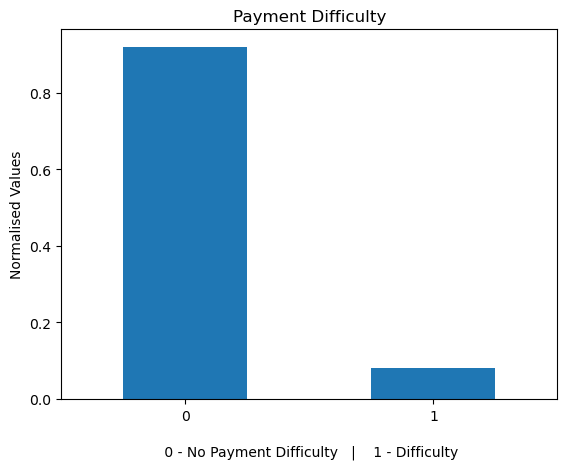

In [866]:
app_df.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |    1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [867]:
#checking exact Target 0 to Target 1 ratio
app_df[app_df.TARGET==0].shape[0]/app_df[app_df.TARGET==1].shape[0]

11.387150050352467

Inference :
1 in every 11 applicant has payment difficulty.

DATA IMBALANCE DETECTED

In [872]:
#checking all columns with object type data

app_df.columns[app_df.dtypes=="object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


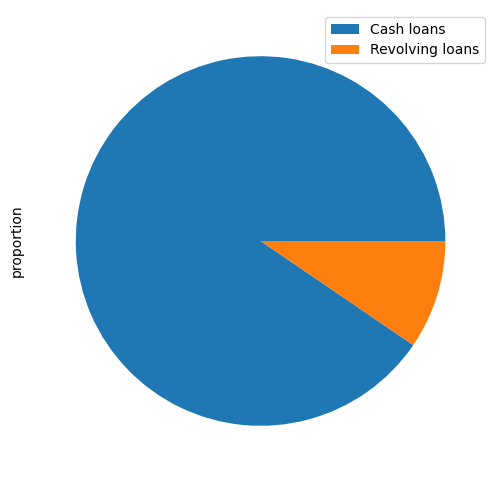

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


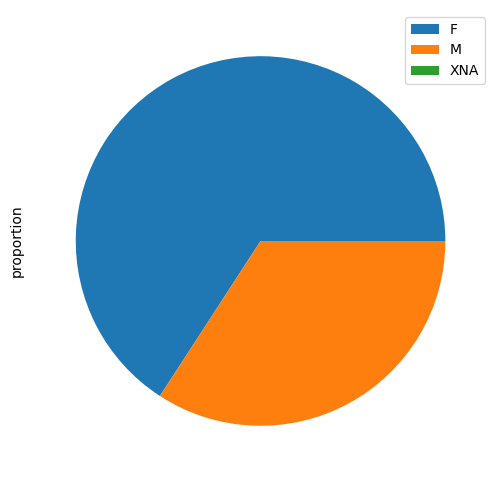

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


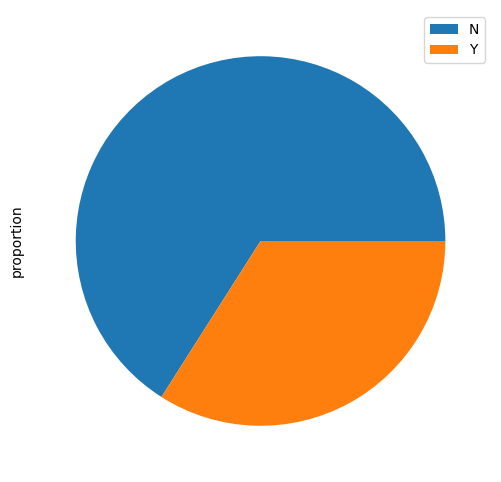

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


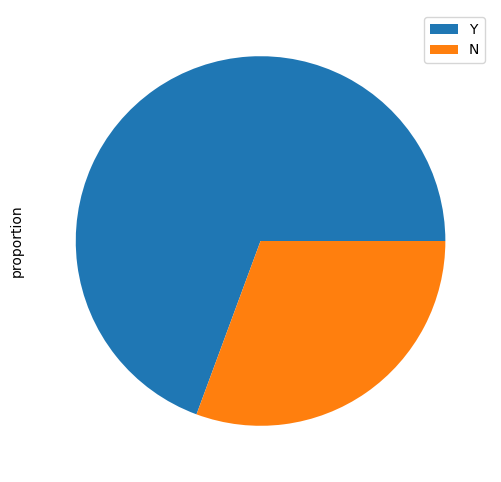

NAME_TYPE_SUITE
Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


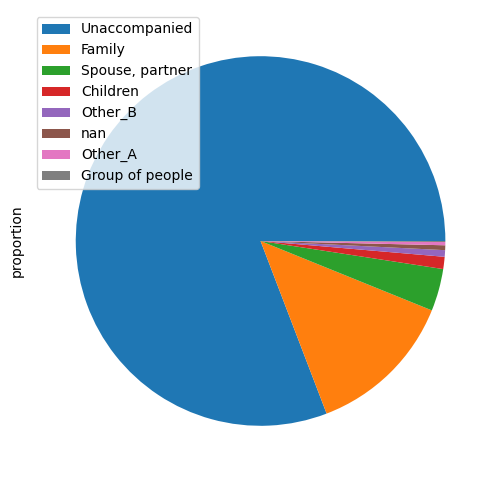

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


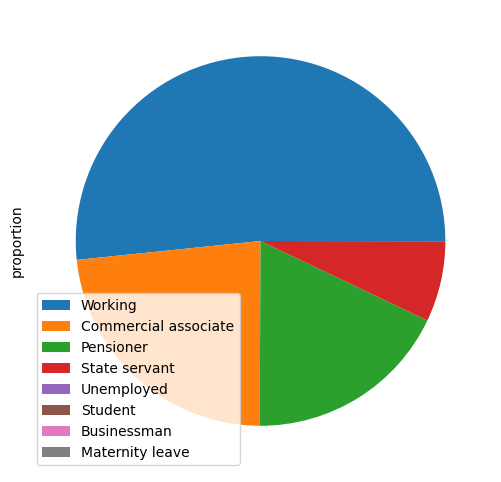

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


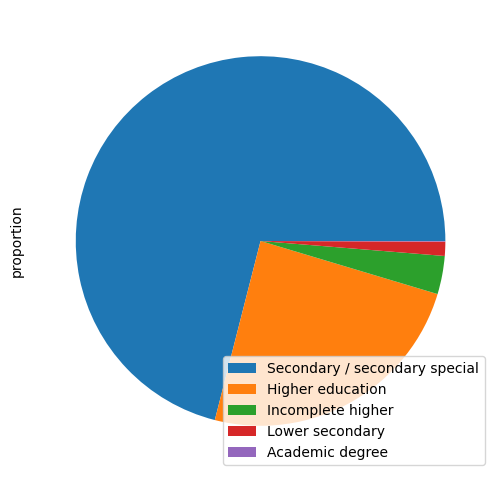

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


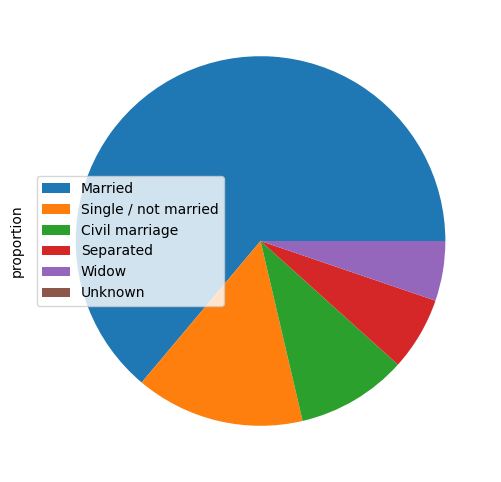

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


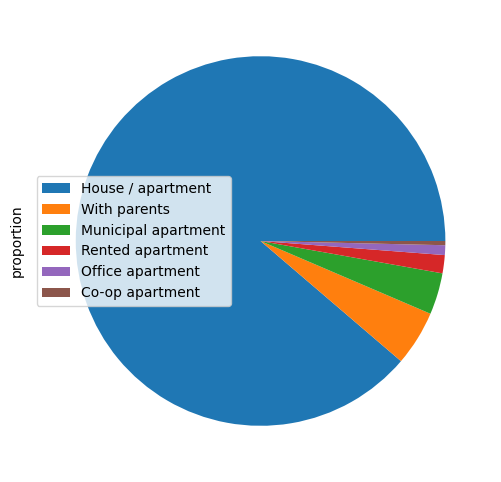

OCCUPATION_TYPE
NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


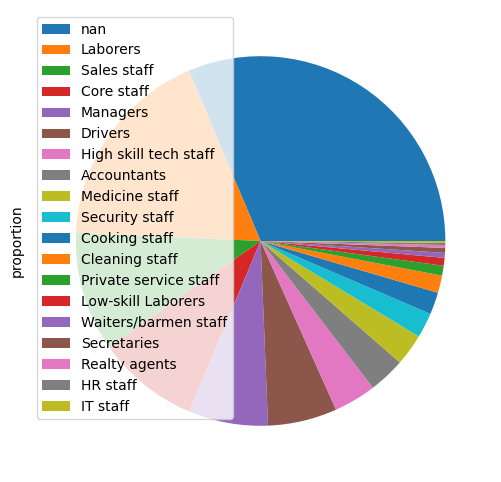

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


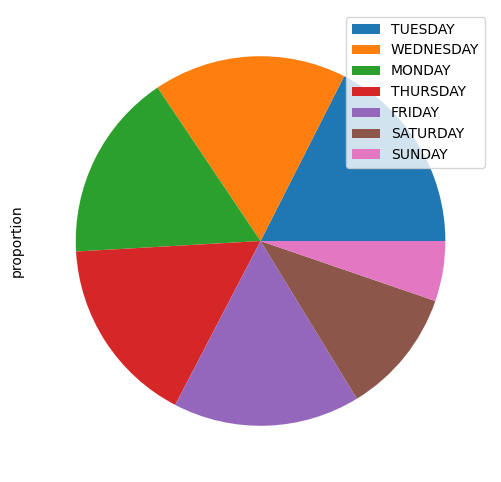

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

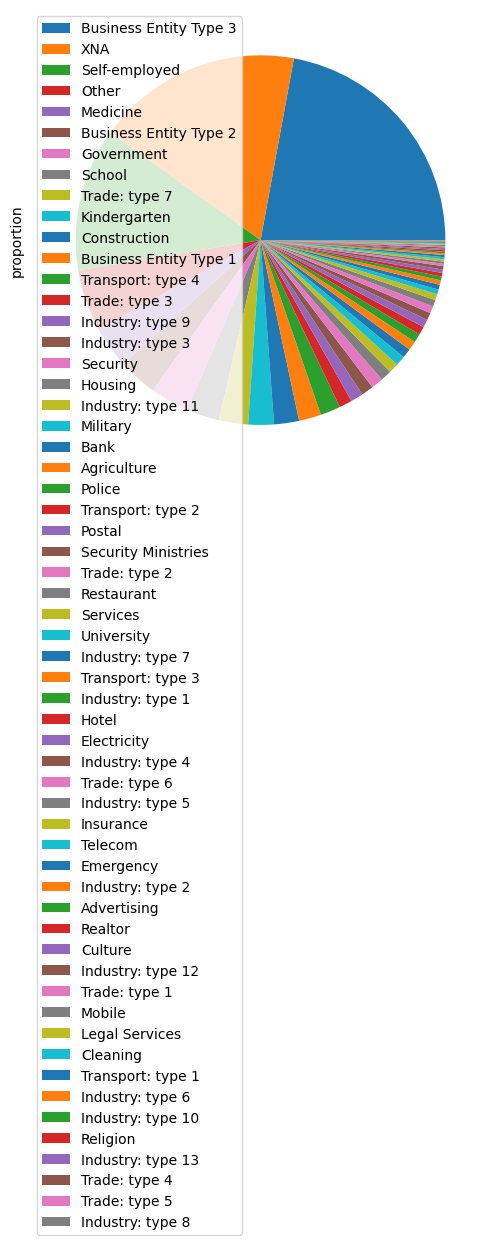

In [874]:
#checking all object types variables and their values

for i in app_df.columns:
    if app_df[i].dtypes=="object":
        print(app_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        app_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        

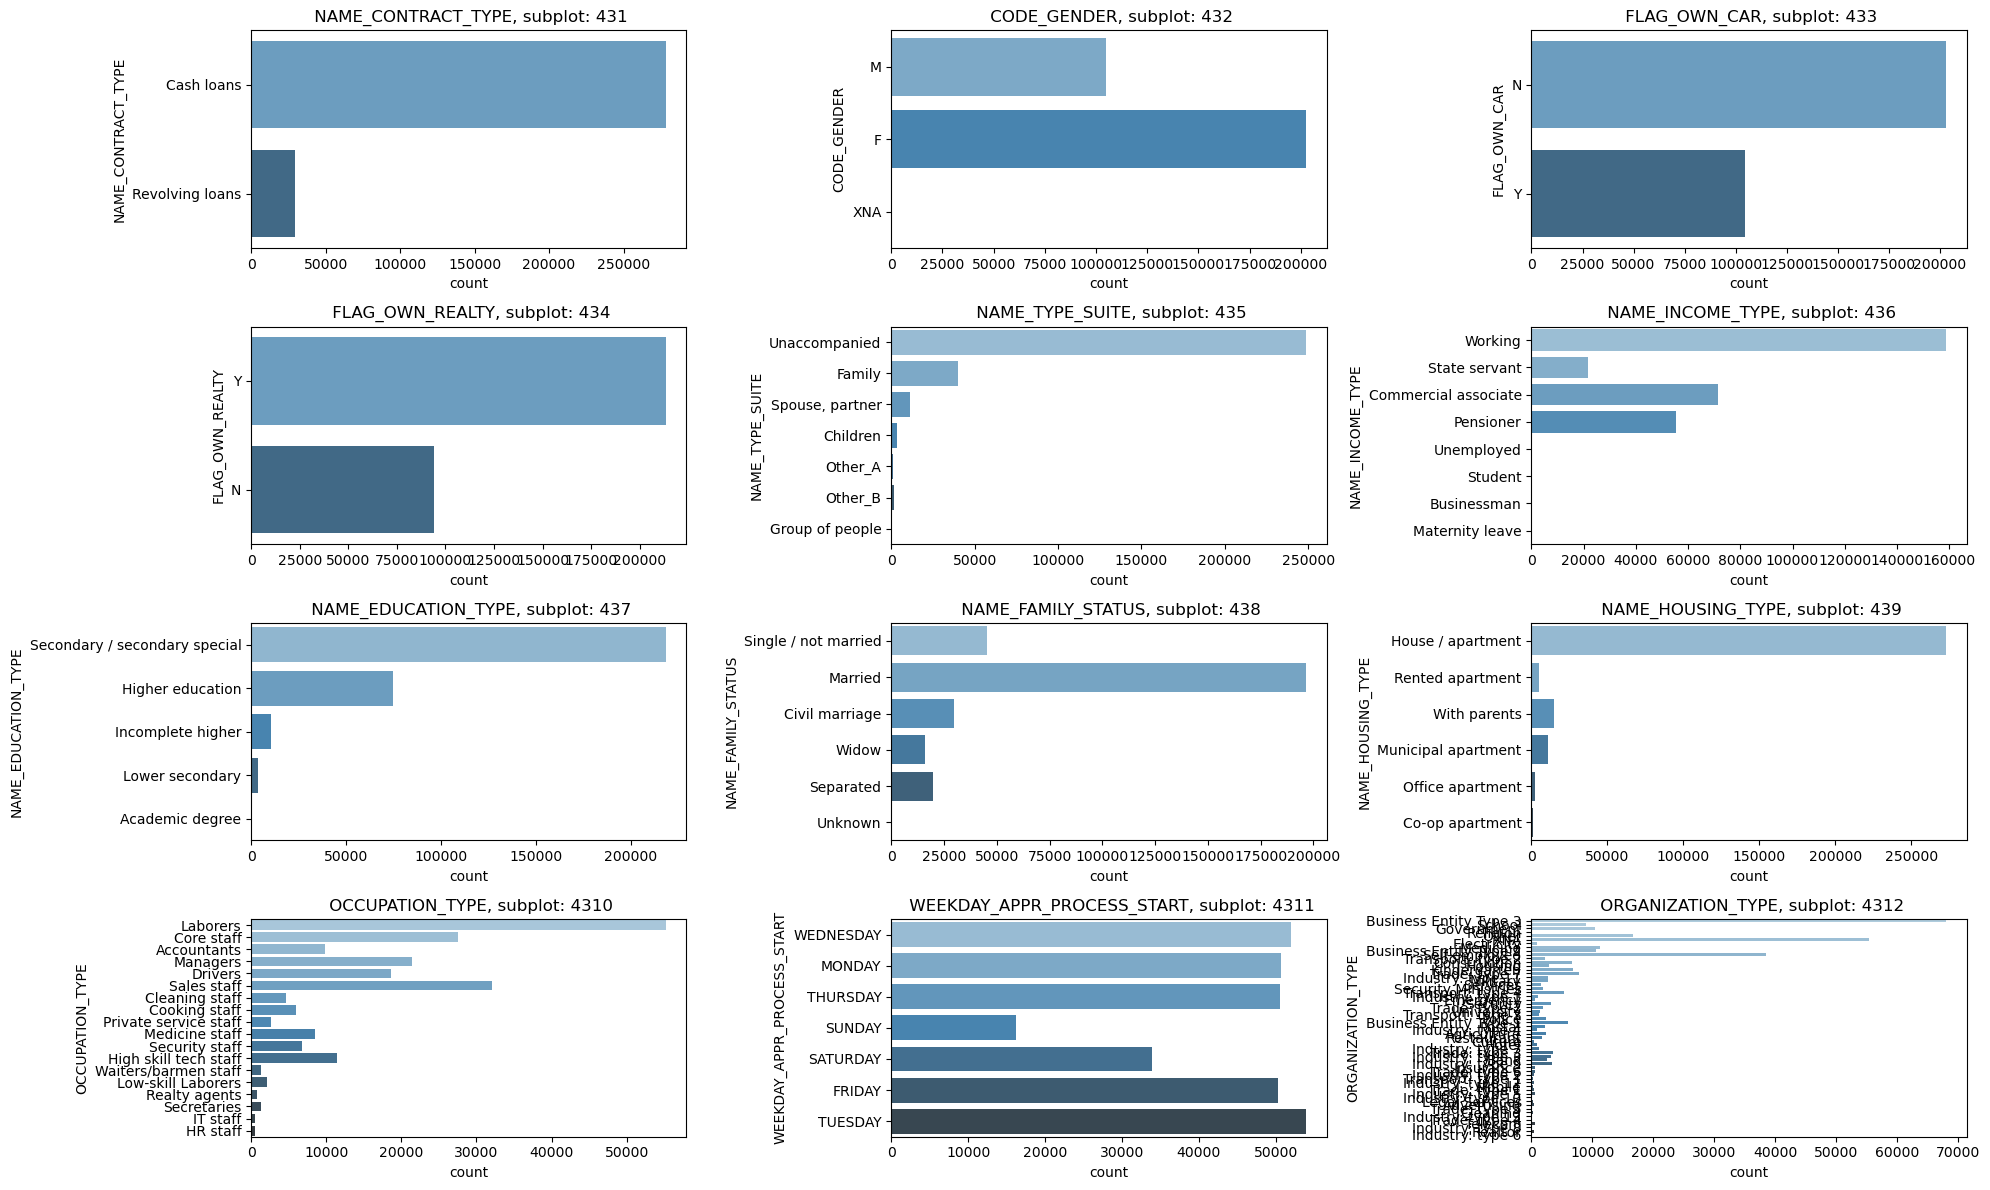

In [875]:
# Object Data
a = 4 # number of rows
b = 3 # number of columns
c = 1 # initialize plot counter

fig = plt.figure(figsize=(20,12))

for i in app_df.columns:
    if app_df[i].dtypes=="object":

        plt.subplot(a, b, c)
        plt.title( ' {}, subplot: {}{}{}'.format(i, a, b, c))
        plt.ylabel(i)
        sns.countplot(app_df[i],palette="Blues_d")
        c = c + 1

fig.tight_layout()
plt.show()

### Few notable points

1. Cash loans offered are more than revolving loans, at 90%
2. 65% Females have taken loans in comparison to 34% male. This is very interesting
   and needs to be studied further
3. 65% applicants dont own cars
4. 69% applicants own living quaters
5. 81% applicants came accompanied for loan application
6. While most applicants are working class, 18% are pensioners
7. 71% have secondary education
8. 63% are married
9. 31% have not mentioned their occupation type


In [877]:
app_df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [878]:
#'FLAG_OWN_CAR' & 'FLAG_OWN_REALITY' needs to be changed to Binary from yes/no

app_df['OWN_CAR_flag']=np.where(app_df.FLAG_OWN_CAR == "Y",1,0)
app_df['OWN_REALTY_flag']=np.where(app_df.FLAG_OWN_REALTY == "Y",1,0)
app_df['OWN_CAR_flag'].value_counts()

OWN_CAR_flag
0    202924
1    104587
Name: count, dtype: int64

In [879]:
app_df.OWN_REALTY_flag.dtype

dtype('int32')

### Numerical Variable

In [881]:
app_df.columns[app_df.dtypes== "int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [882]:
##Deleting all the Flag columns

for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)

app_df.shape

(307511, 47)

### Standardising

DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH cannot be -Ve numbers.
Converting to absolute values

In [885]:
#Converting DAYS_BIRTH to +ve and converting days to years. Column renamed to AGE_IN_YEARS
app_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
app_df.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

### Binning

In [887]:
# Binning AGE and Creating new column "AGE_GROUP"

app_df['AGE_GROUP']= pd.cut(app_df.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])

app_df['AGE_GROUP'].value_counts(normalize=True)

AGE_GROUP
(35, 45]    0.274010
(25, 35]    0.235533
(45, 55]    0.228252
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: proportion, dtype: float64

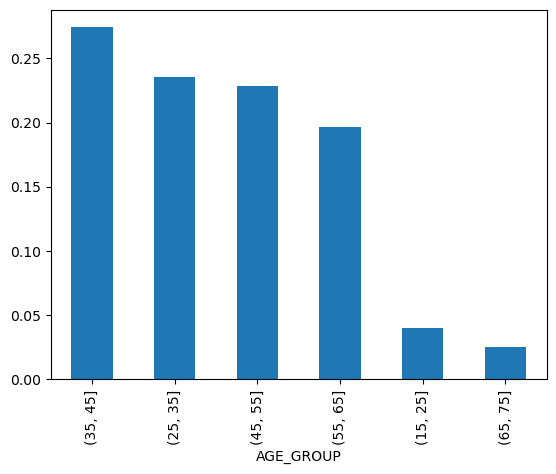

In [889]:
app_df['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

Inference - 35-45 Age group is the largest Group of Age applying for loans. 
This may be attributed to consumerism aspect at the age.

In [891]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

app_df['INCOME_GROUP']= pd.qcut(app_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

app_df['INCOME_GROUP'].value_counts(normalize=True)

INCOME_GROUP
Medium      0.274143
High        0.245562
Low         0.218486
VeryHigh    0.153224
VeryLow     0.108585
Name: proportion, dtype: float64

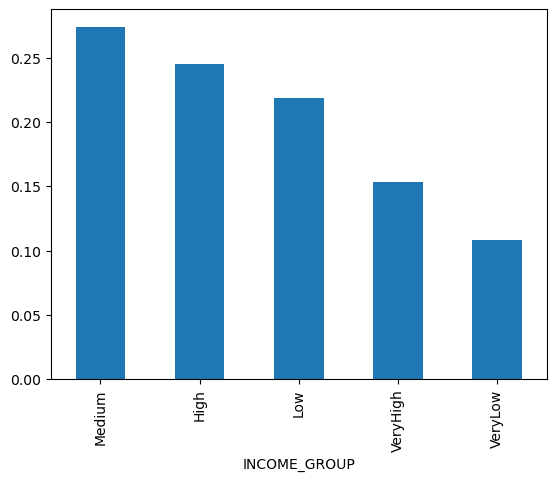

In [892]:
app_df['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

Inference - Medium Income group is largest Group applying for loans.

### Data Correction and Standaradization

In [895]:
#DAYS_REGTRATION, DAYS_ID_PUBLISH TO +ve numbers and change to years. Columns Renamed

app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
app_df.rename({'DAYS_REGISTRATION' : 'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH' : 'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [896]:
# DAYS_LAST_PHONE_CHANGE to +ve
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [897]:
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
app_df.rename({'DAYS_EMPLOYED' : 'YEARS_EMPLOYED'}, axis=1, inplace=True)

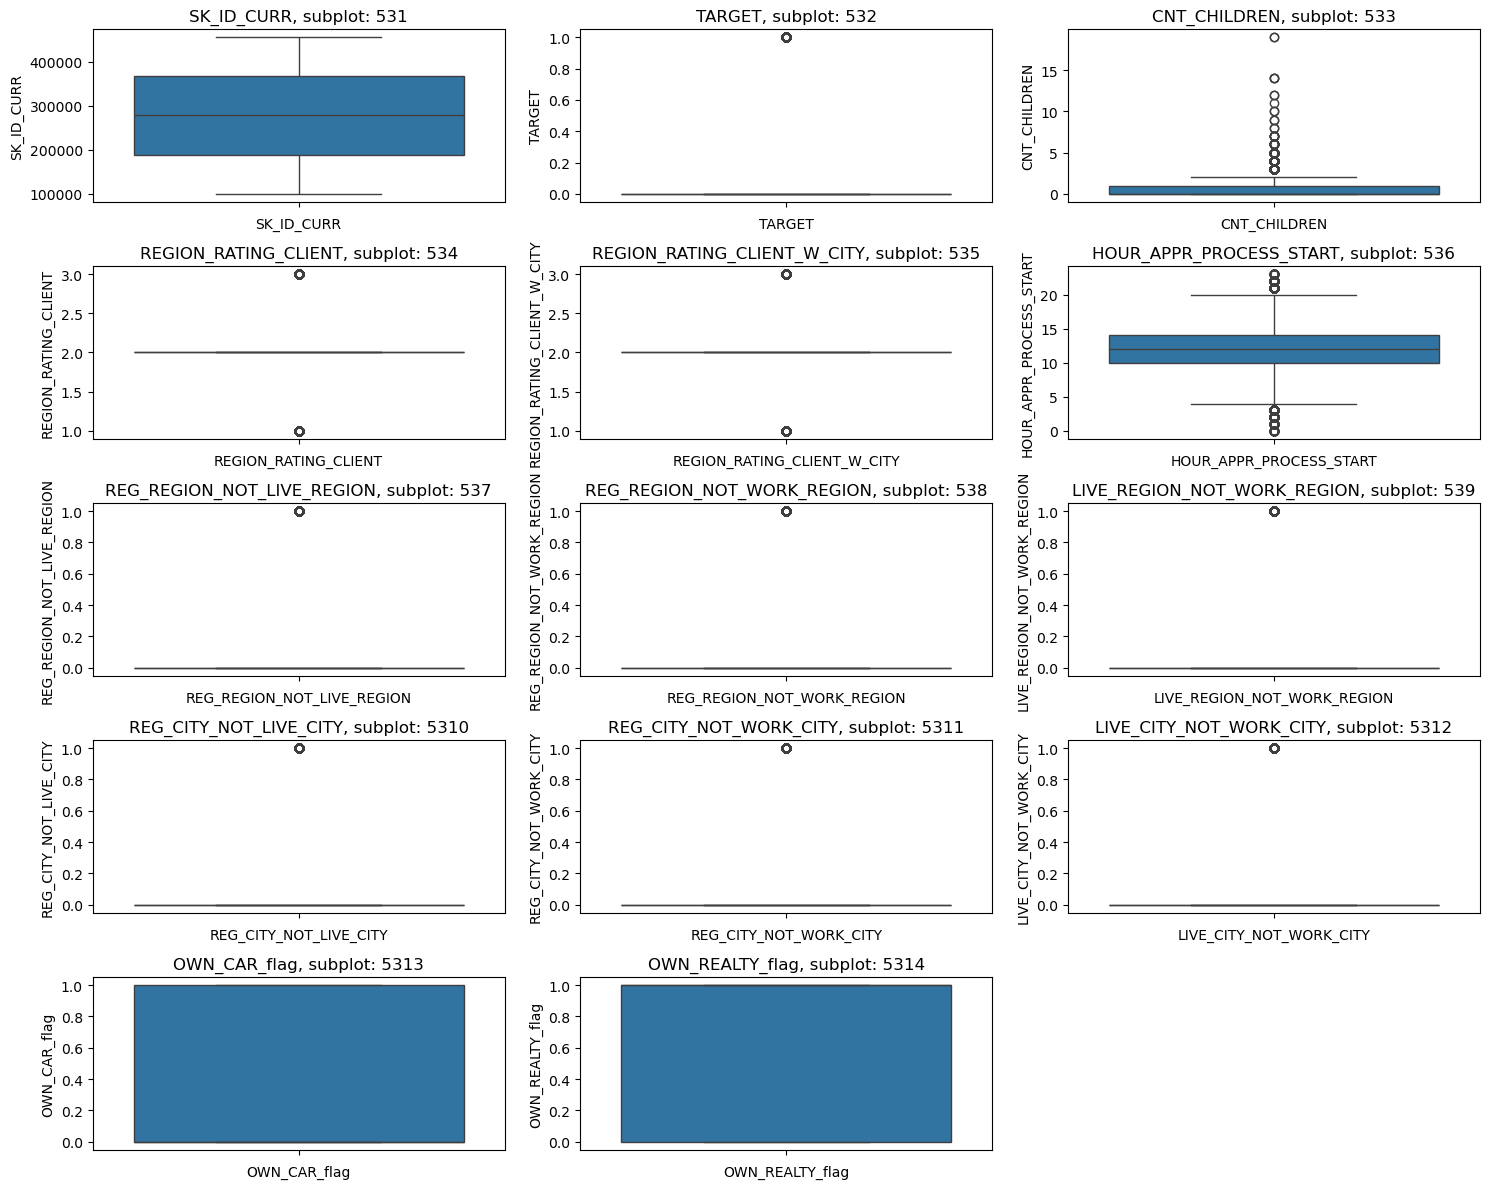

In [898]:
# INT Data- Analysis by plotting Box plots
a = 5 # number of rows
b = 3 # number of columns
c = 1 # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in app_df.columns:
    if app_df[i].dtypes=="int64" or app_df[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}' .format(i, a, b ,c))
        plt.xlabel(i)
        sns.boxplot(app_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

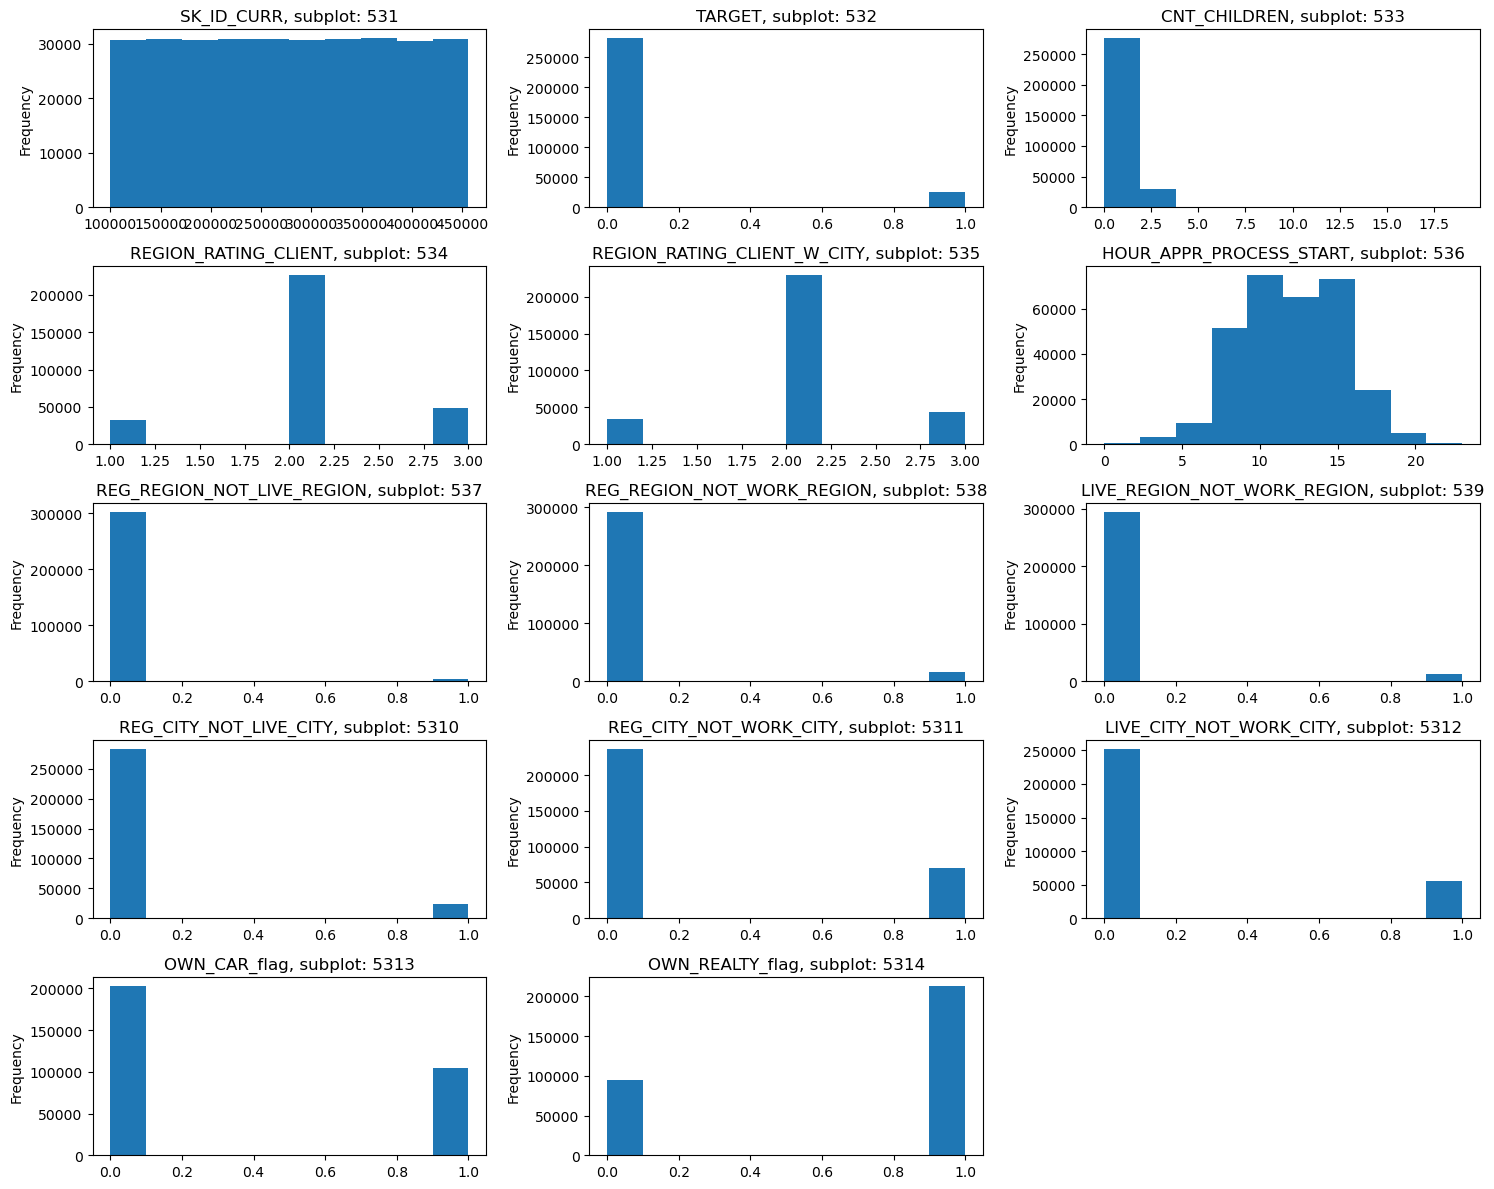

In [899]:
# INT Data - Histogram - Analysis by plotting Histograms

a = 5 # number of rows
b = 3 # number of columns
c = 1 # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in app_df.columns:
    if app_df[i].dtypes=="int64" or app_df[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}' .format(i, a, b, c))
        plt.xlabel(i)
        app_df[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()

### Few notable points

1. Many columns with int data type are Flag columns. For purpose of calculations
   we will keep them as int.

   Eg: TARGET,REG_CITY_NOT_LIVE_CITY etc..

2. CNT_CHILDRENneeds to further analysed as it has outliers

In [902]:
app_df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [903]:
app_df['CNT_CHILDREN'].value_counts()


CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

14 rows have CNT_CHILDREN>7. These could be a possibility. Leaving the column as it is 

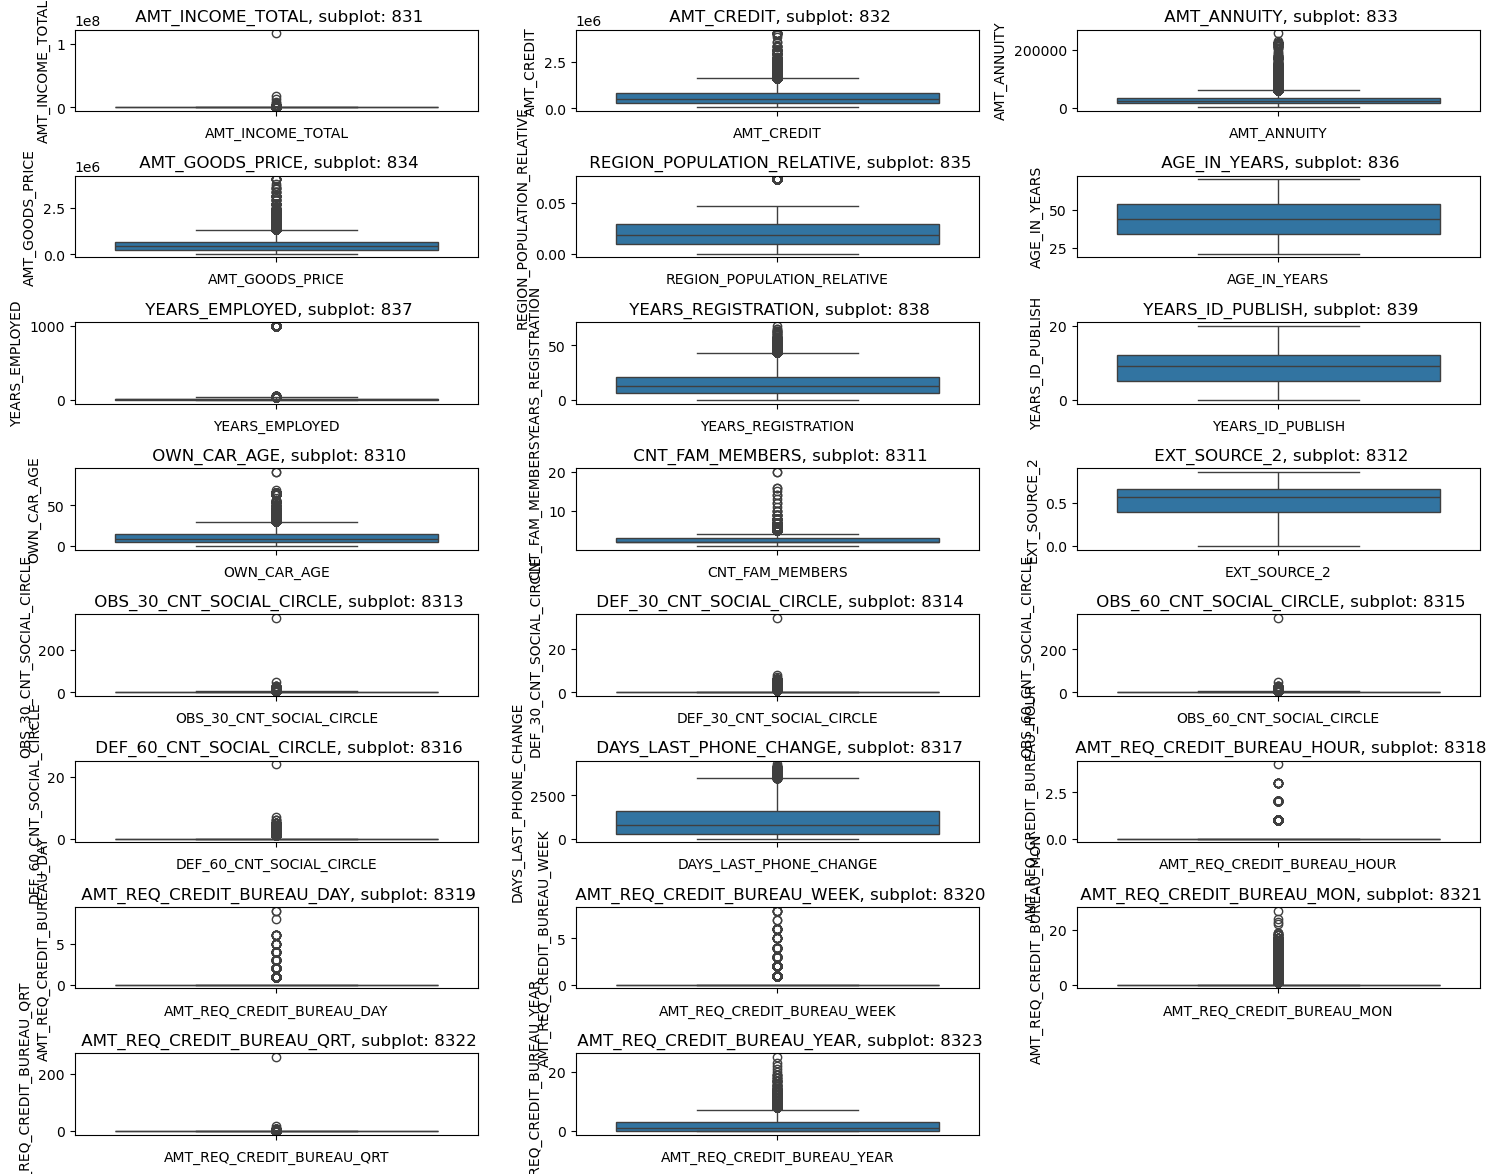

In [905]:
# Float Data
a = 8 # number of rows
b = 3 # number of columns
c = 1 # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in app_df.columns:
    if app_df[i].dtypes=="float64" or app_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title(' {}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(app_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

### Outlier & Possible Treatment

Outliers observed in 

'AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED',
'YEARS_REGISTRATION','OWN_CAR_AGE',DAYS_LAST_PHONE_CHANGE

In [908]:
#Checking value counts of columns with outliers
outlier_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE']

for i in outlier_col:
    print("\n")

    print(app_df[i].describe())
    print("\n")

    print(app_df[i].value_counts( dropna=False, normalize=True))
    print("\n")





count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


AMT_INCOME_TOTAL
135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
117324.0    0.000003
64584.0     0.000003
142897.5    0.000003
109170.0    0.000003
113062.5    0.000003
Name: proportion, Length: 2548, dtype: float64




count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


AMT_CREDIT
450000.0     0.031573
675000.0     0.028867
225000.0     0.026542
180000.0     0.023876
270000.0     0.023547
               ...   
487318.5     0.000003
630400.5     0.000003
1875276.0    0.000003
1395895.5    0.000003
1391130.0    0.000003
Name: proportion, 

In [909]:
#using zscore to find out Outliers (>97%)

for i in outlier_col:
    print(i, ":", end=" ")
    print(app_df.iloc[np.where(np.abs(ss.zscore(app_df[i])>2))].shape)



AMT_INCOME_TOTAL : (1438, 49)
AMT_CREDIT : (12999, 49)
AMT_ANNUITY : (0, 49)
AMT_GOODS_PRICE : (0, 49)
YEARS_EMPLOYED : (55374, 49)
YEARS_REGISTRATION : (11203, 49)
OWN_CAR_AGE : (0, 49)
DAYS_LAST_PHONE_CHANGE : (0, 49)


We can Substitute all above columns, expect DAYS_LAST_PHONE_CHANGE with
median values. However, not performing Outlier Treatment as instructed

In [911]:
# Creating list with names of categorical nominal, numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
objvarList=[]
numvarList=[]
for i in app_df.columns:
    if app_df[i].dtypes=="object":
        objvarList.append(i)

    else:
        numvarList.append(i)

catvarList=[]
for i in numvarList:
   if len(app_df[i].unique())<4:
       app_df[i].astype("category")
       catvarList.append(i)



In [912]:
for i in catvarList:
    numvarList.remove(i)

print ("Numberical Columns :", numvarList)
print("\n")

print("obj Columns :", objvarList)
print("\n")

print("cat Columns :",catvarList)


Numberical Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'INCOME_GROUP']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_

In [913]:
# Removing income group and age group as these have binnned data. Code_gender and Target are ordinal and hence move to different list
numvarList.remove('INCOME_GROUP')
numvarList.remove('AGE_GROUP')
numvarList.remove('SK_ID_CURR')
objvarList.remove('CODE_GENDER')

catvarList.append('CODE_GENDER')

catvarList.remove('TARGET')

print("Numerical Columns :", numvarList)
print("\n")

print("obj Columns :", objvarList)
print("\n")

print("cat Columns :", catvarList)


Numerical Columns : ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


obj Columns : ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_C

## Dataframe divided into TWO for Target 1 and Target 0

Target variable 1 - client with payment difficulties: he/she had late payment more than
X days on at least one of the first Y installments of the loan in our sample

Target variable 0 - all other cases, ie no payment difficulties

In [916]:
df_cat_0=app_df[app_df['TARGET']==0]
df_cat_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1          46.0             4.0                 4.0               1.0   
2          53.0             1.0                12.0               7.0   
3          53.0             9.0                27.0               7.0   
4          55.0             9.0                12.0              10.0   
5          47.0             5.0                14.0               2.0   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1          NaN      Core staff              2.0                     1   
2         26.0        Laborers              1.0                     2   
3          NaN        Laborers              2.0                     2   
4          NaN      Core staff              1.0                     2   
5          NaN        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   
5                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                     

In [917]:
df_cat_1=app_df[app_df['TARGET']==1]
df_cat_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
81   Unaccompanied             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0           26.0             2.0                10.0               6.0   
26          52.0             8.0                18.0               6.0   
40          48.0             4.0                 4.0               3.0   
42          37.0            10.0                 1.0              13.0   
81          68.0           999.0                15.0              12.0   

    OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           NaN        Laborers              1.0                     2   
26          NaN   Cooking staff              1.0                     3   
40          NaN        Laborers              2.0                     2   
42          NaN     Sales staff              2.0                     3   
81          NaN             NaN              2.0                     2   

    REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                             2                  WEDNESDAY   
26                            2                     MONDAY   
40                            2                    TUESDAY   
42                            3                   THURSDAY   
81                            2                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                  

## Univariate Analysis on Categorical Nominal to analyse both data frames

Graph for : NAME_CONTRACT_TYPE


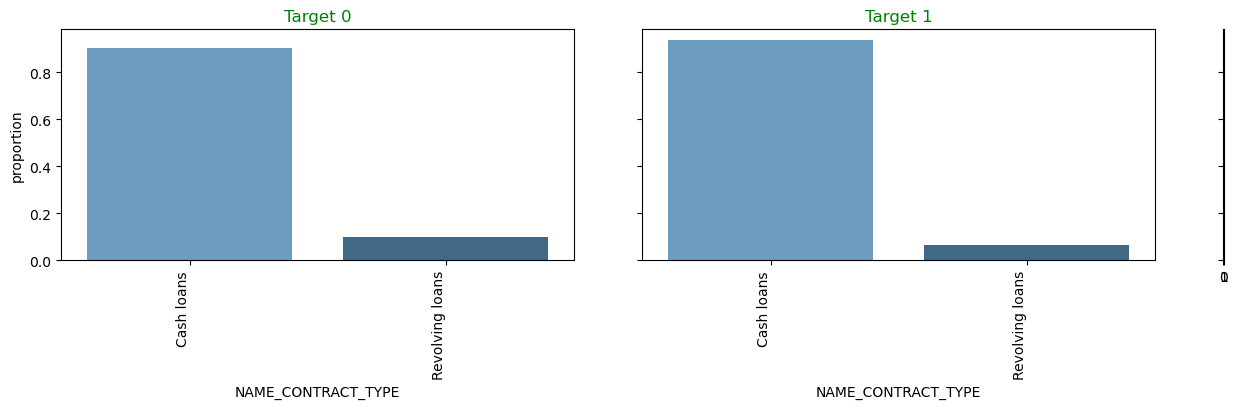

Graph for : NAME_TYPE_SUITE


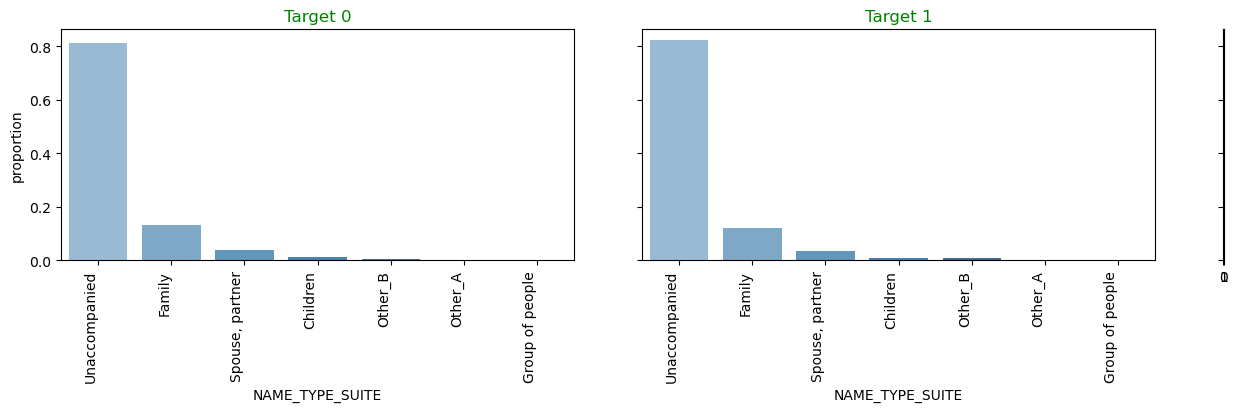

Graph for : NAME_INCOME_TYPE


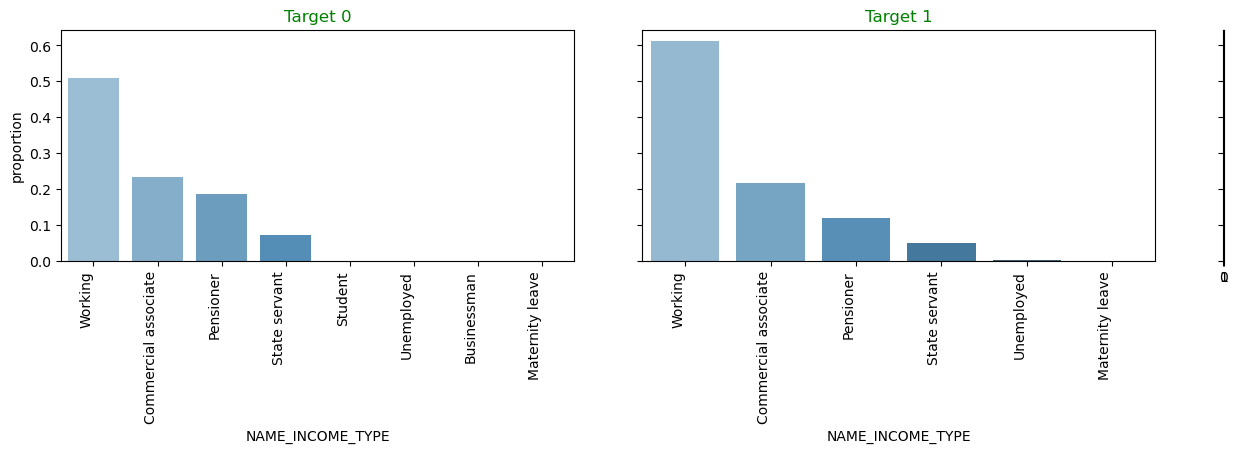

Graph for : NAME_EDUCATION_TYPE


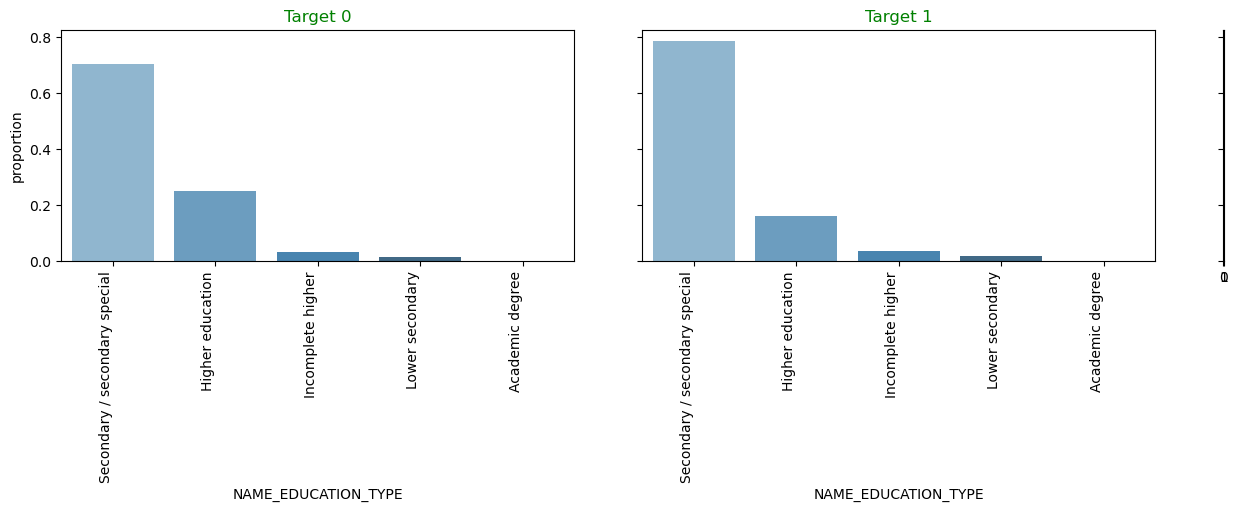

Graph for : NAME_FAMILY_STATUS


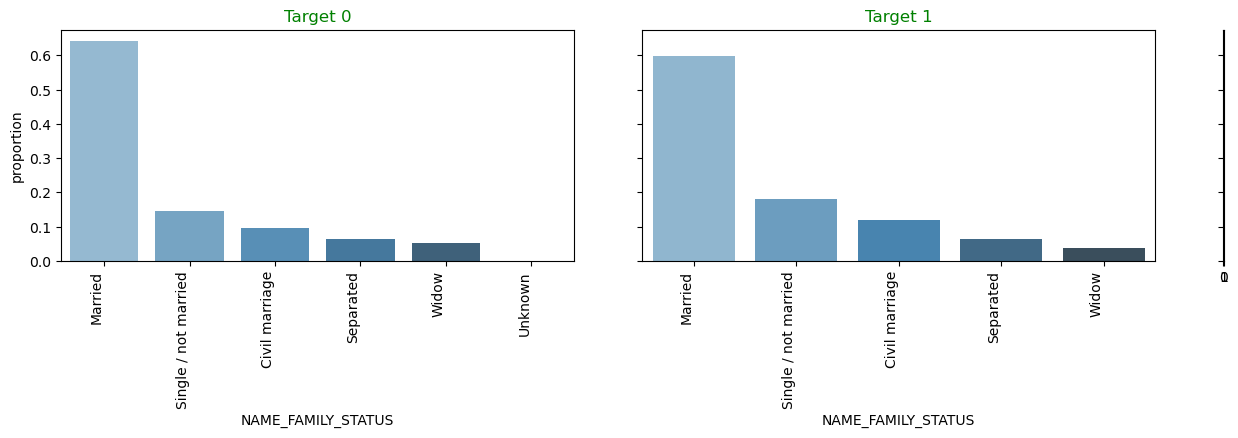

Graph for : NAME_HOUSING_TYPE


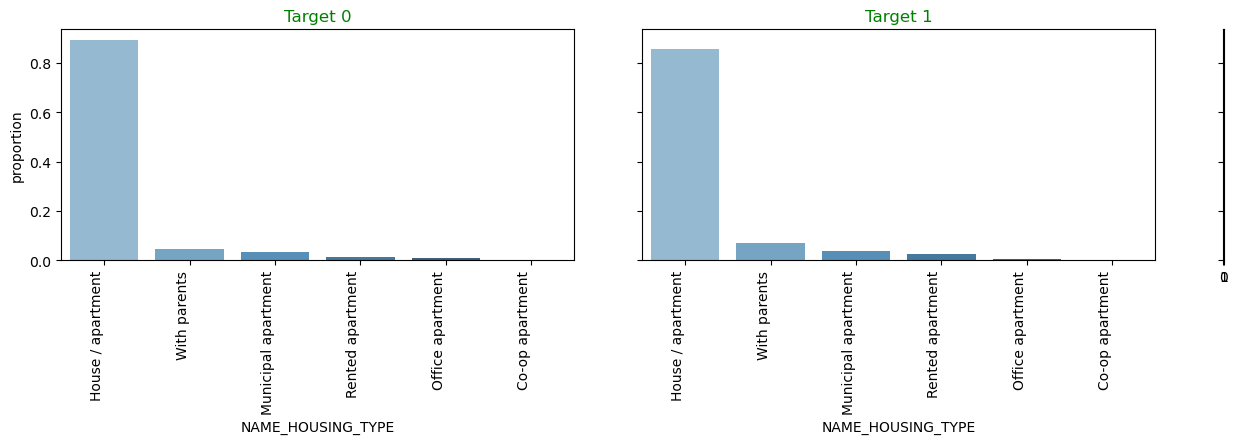

Graph for : OCCUPATION_TYPE


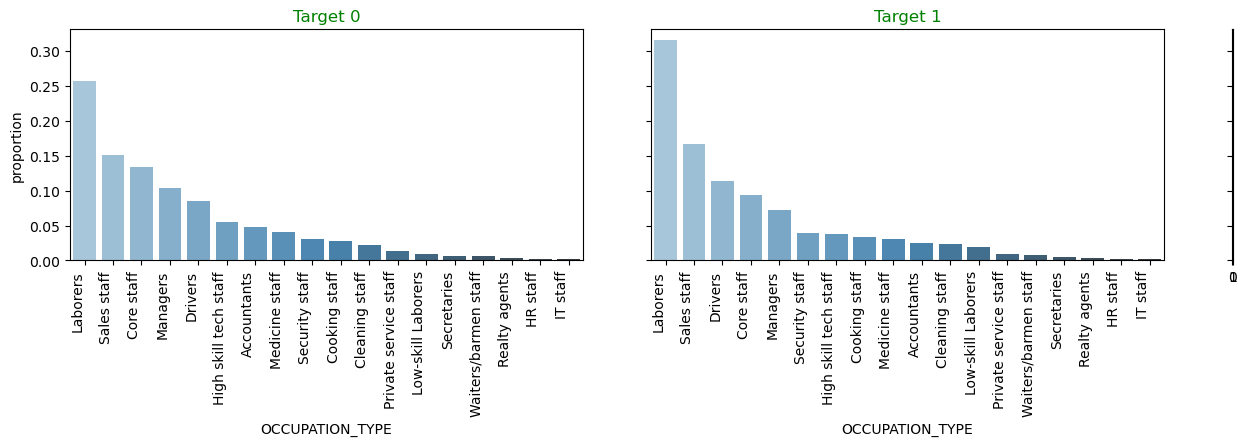

Graph for : WEEKDAY_APPR_PROCESS_START


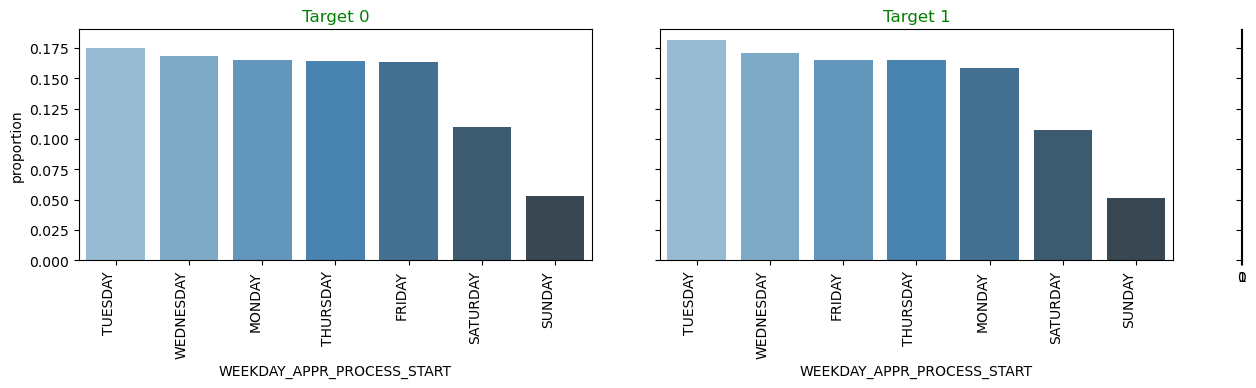

Graph for : ORGANIZATION_TYPE


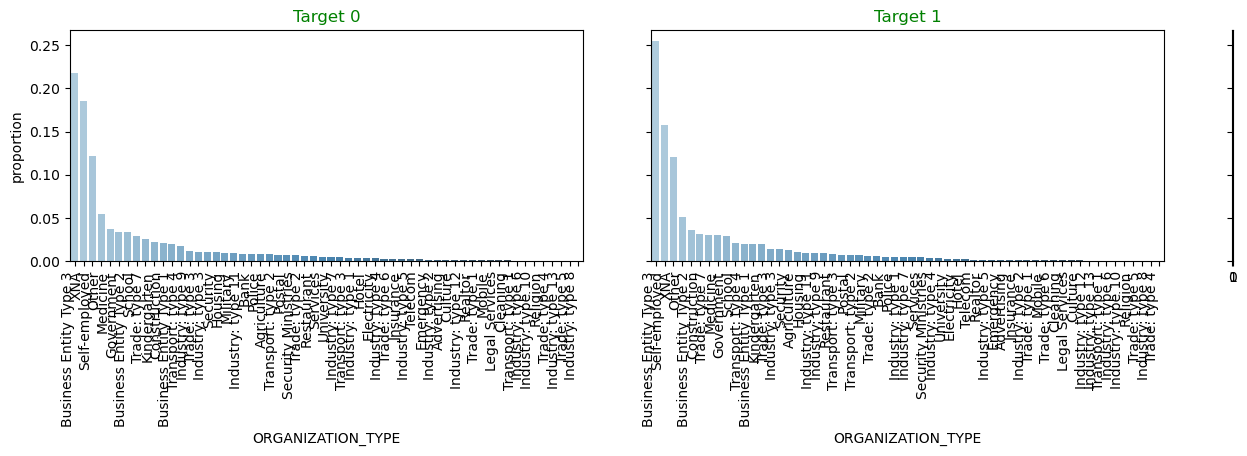

In [919]:
#Running loop and creating plots to analyse all Categorical Nominal variables

for i in objvarList:

    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios' :[1,1, 0.001]},figsize=(15,3))
    print("Graph for :",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment= 'right')
    chart1.axes.set_title('Target 0', fontsize=12, fontweight= 7, color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1, ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1', fontsize= 12, fontweight= 7,color= 'Green')
    plt.show()
    

### Few notable points

1. NAME_CONTRACT TYPE - Cash Loans are large part of the company's portfolio. For Target 0    - 85% and almost 95% for Target-1
2. NAME_TYPE_SUIT - 80%-90% IN Target 0 and Target 1 are applying for loan Unaccompanied.     Indicating,this is not a parameter that can influence payment default.
3. NAME_INCOME_TYPE - 50% working in case of Target 0 and 60% in case of Target 1 are         working income types.
4. NAME_EDUCATION_TYPE - In both Target 0 and 1, applicants with Secondary Education has      applied for loans more than others. 90% of defaulting payments are from applicants with    secondary income. Needs further analysis
5. NAME_FAMILY_STATUS - Married applicants - almost 60% have defaulted on payments
6. NAME_HOUSING_TYPE - 85%-90% IN Target 0 and Target 1 applicants are staying in             "House/apartment". Indicating, this is not a parameter that caninfluence payment           default.
7. OCCUPATIO_TYPE - Labourers, sales staff, core staff, drivers constituteof 50% of           defaulters. Labourers is the highest percentage of applicants too.
8. ORGANIZATION_TYPE - Business ENTITY TYPE 3 AND SELF EMPLOYED add upto 40% defaulters.      The highest % of loan takers are also this category.


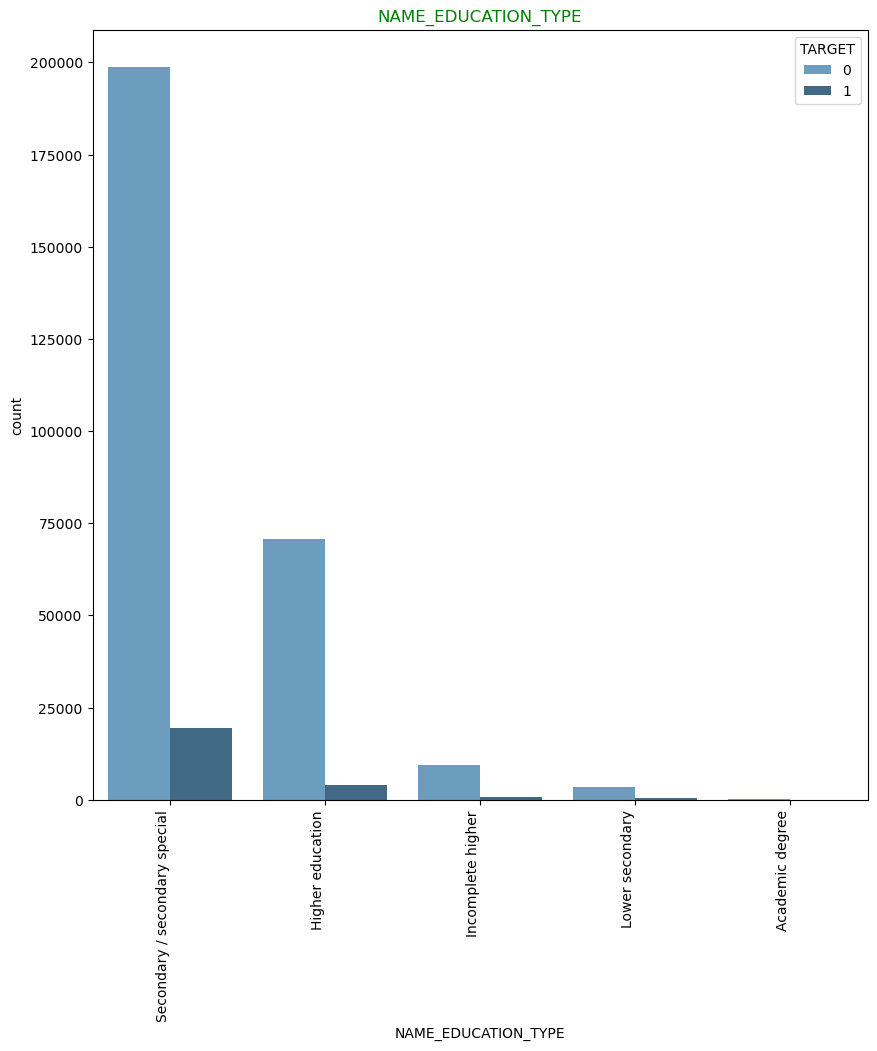

In [922]:
plt.figure(figsize=(10,10))

chart=sns.countplot(x='NAME_EDUCATION_TYPE', data=app_df, hue= "TARGET", palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME_EDUCATION_TYPE', fontsize= 12, fontweight = 7, color='Green')
plt.show()

Inference - as the data is not balanced, the above plot cannot be inferred correctly

### Univariate Analysis on Categorical Ordered

Graph for: REGION_RATING_CLIENT


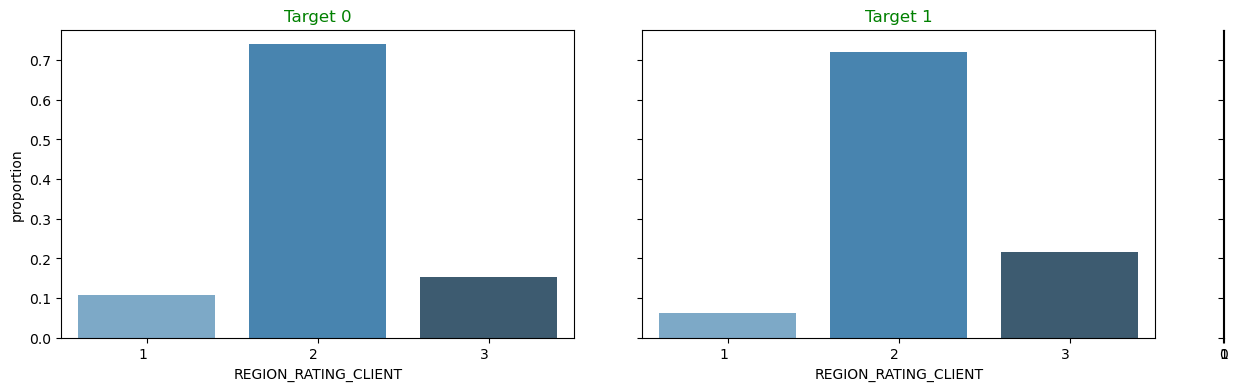

Graph for: REGION_RATING_CLIENT_W_CITY


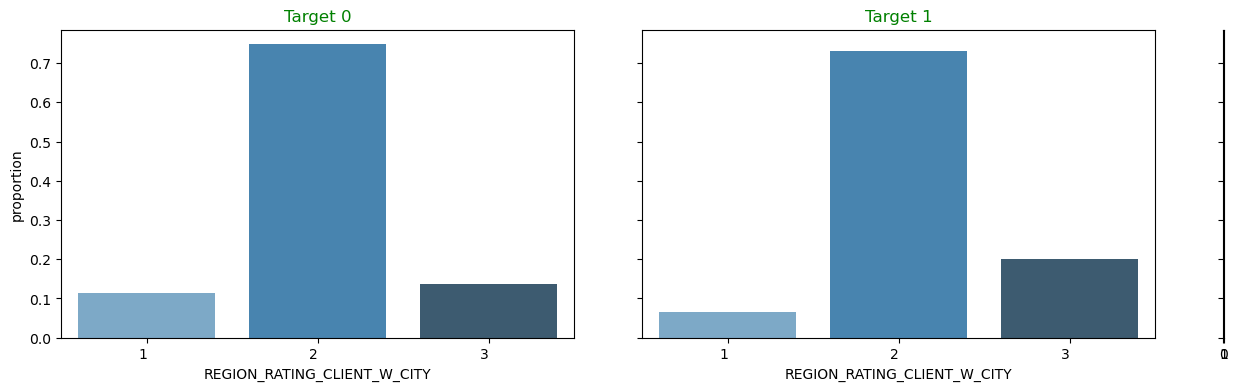

Graph for: REG_REGION_NOT_LIVE_REGION


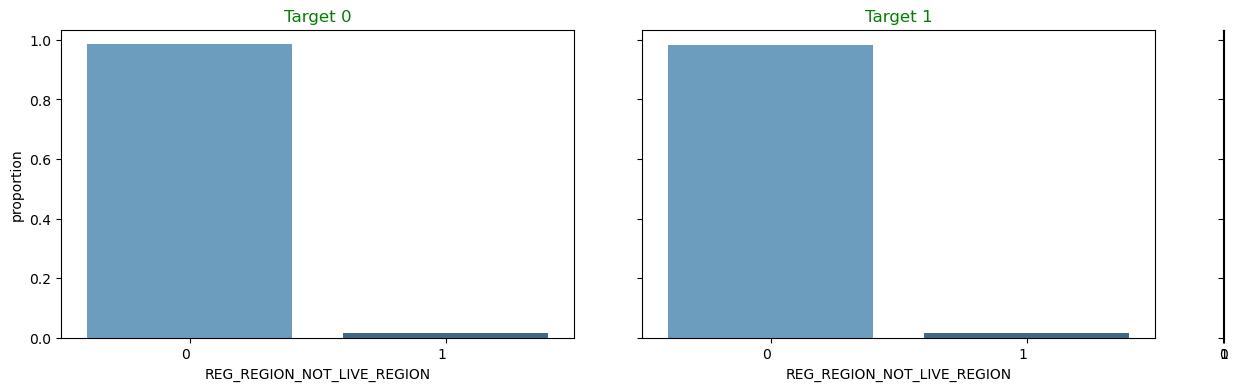

Graph for: REG_REGION_NOT_WORK_REGION


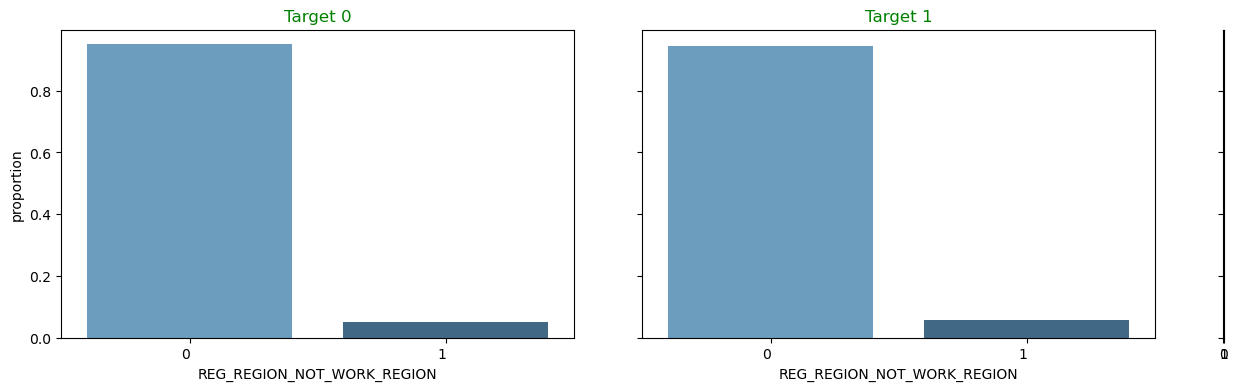

Graph for: LIVE_REGION_NOT_WORK_REGION


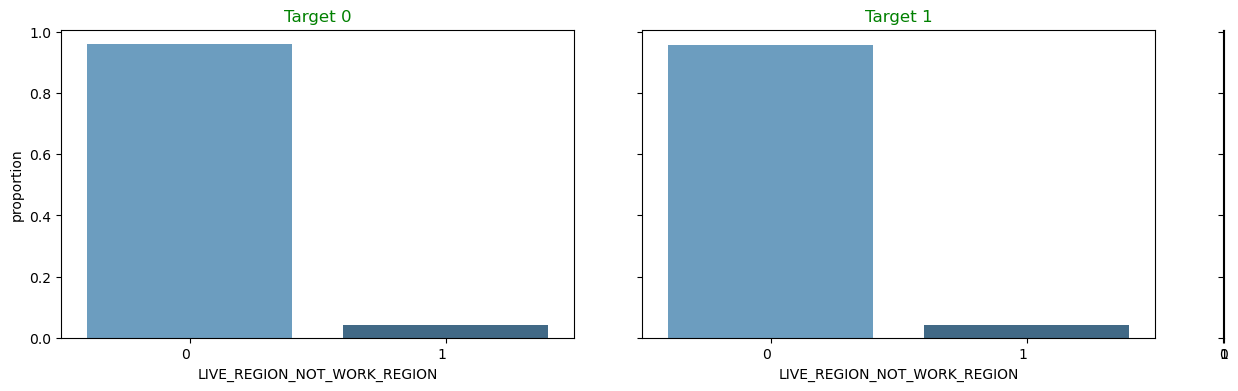

Graph for: REG_CITY_NOT_LIVE_CITY


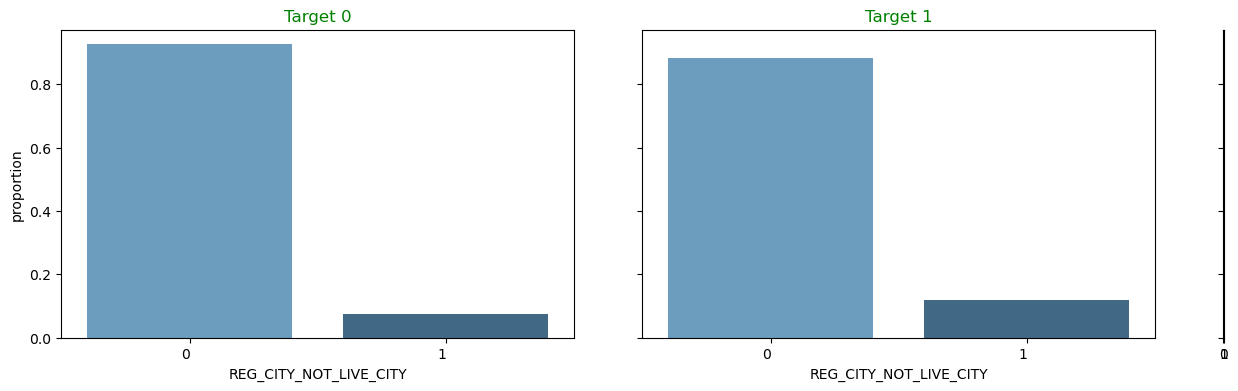

Graph for: REG_CITY_NOT_WORK_CITY


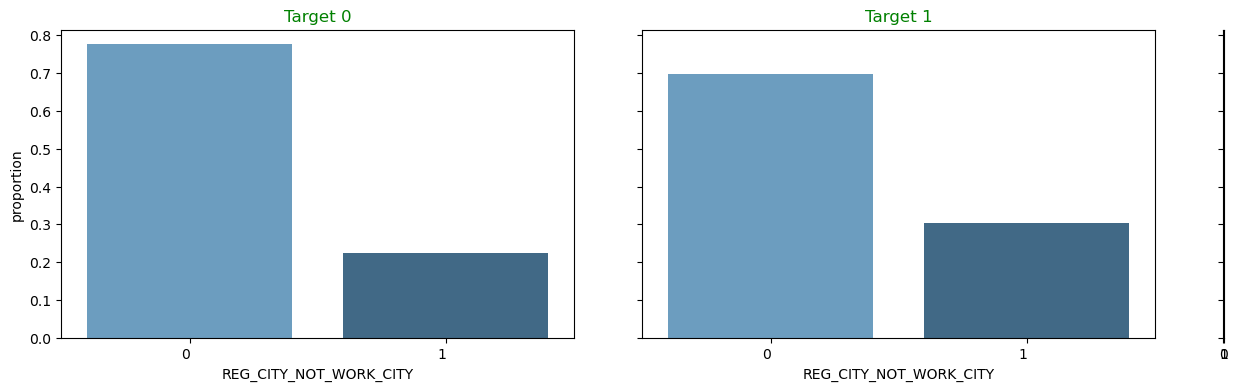

Graph for: LIVE_CITY_NOT_WORK_CITY


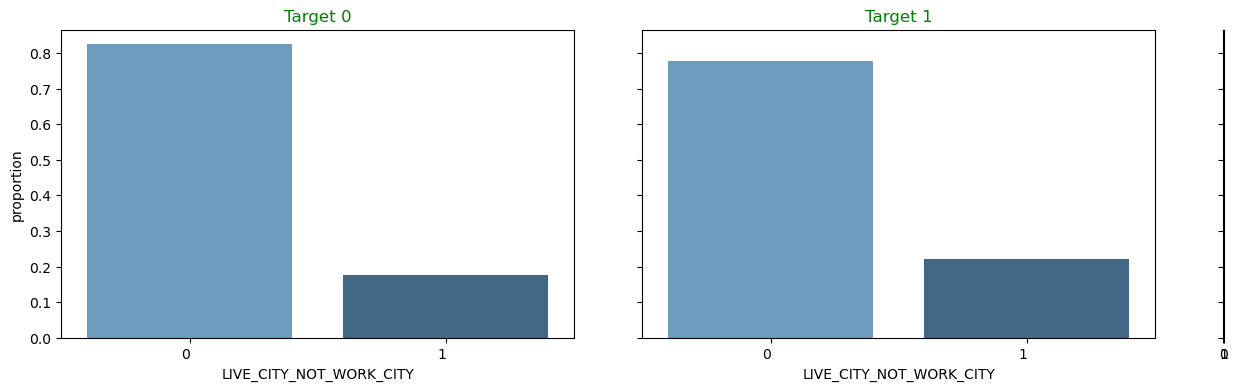

Graph for: OWN_CAR_flag


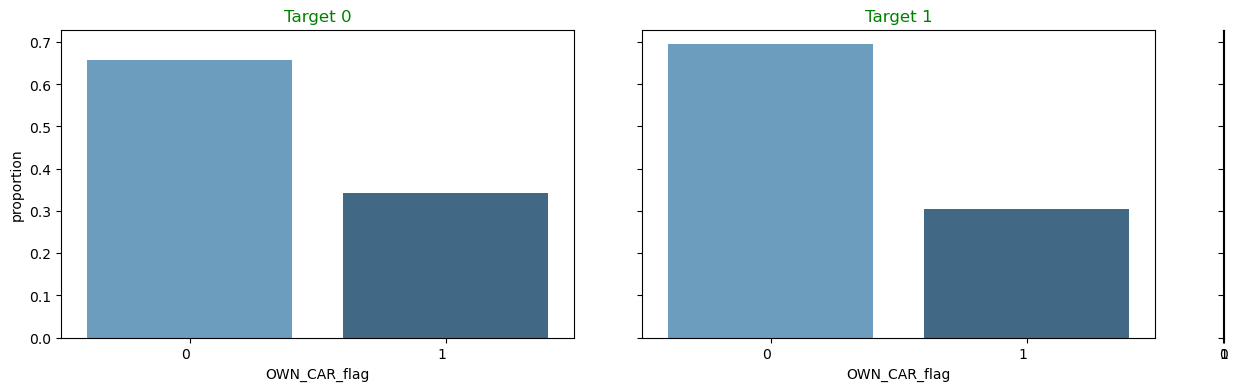

Graph for: OWN_REALTY_flag


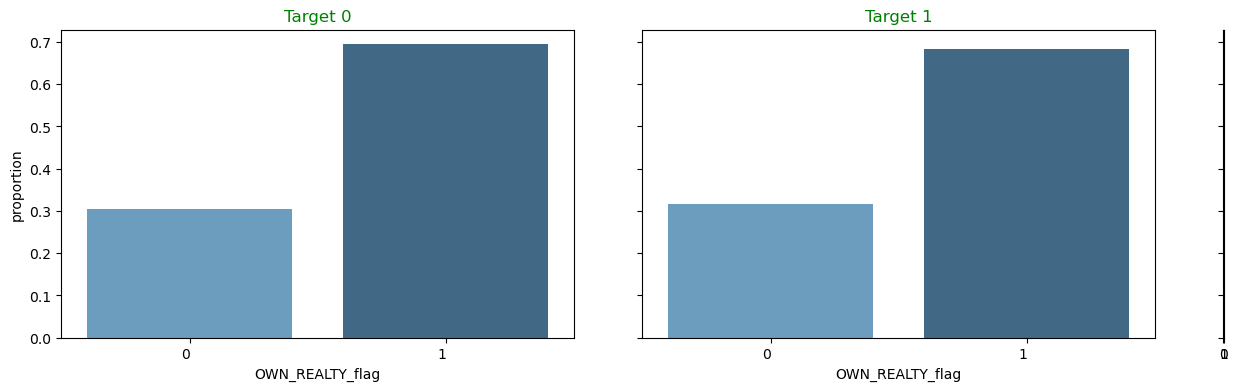

Graph for: CODE_GENDER


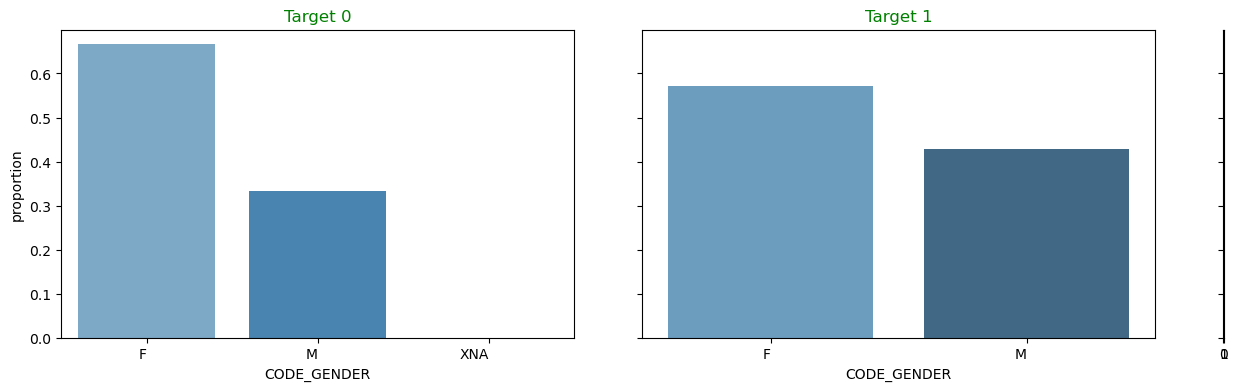

In [925]:

for i in catvarList:
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for:", i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment= 'right')
    chart1.axes.set_title('Target 0',fontsize= 12, fontweight= 7, color= 'Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1, ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12, fontweight= 7, color= 'Green')
    plt.show()


### Few notable points

1. 'REGION_RATING_CLIENT' & 'REGION_RATING_CLIENT_W_CITY' - Region 2 has the highest %        applicants both in TARGET 0 and TARGET 1
2. REG_REGION_NOT_LIVE_REGION, REGION_NOT_WORK_REGION, VE_REGION_NOT_WORK_REGION - For        both Target 0 and Target 1 out of Region, ie 1 is very low and does not seem to affect     the default rate
3. REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY - Default ratio is higher for 1, ie         different from permanent address
4. 'CODE_GENDER' - Ratio of F to M in Target 0 is 2.3 and F to M in Target 0 - 1.3.           indicatign that MEN are defaulting more than Women

### Univariate Analysis on Continuous Variables

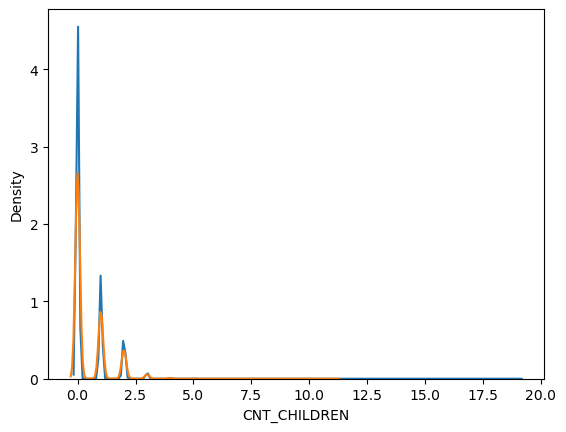

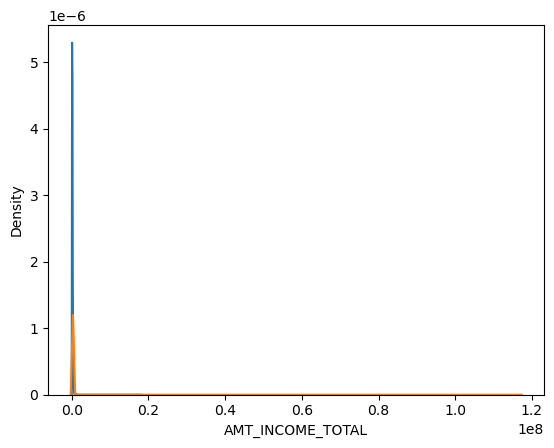

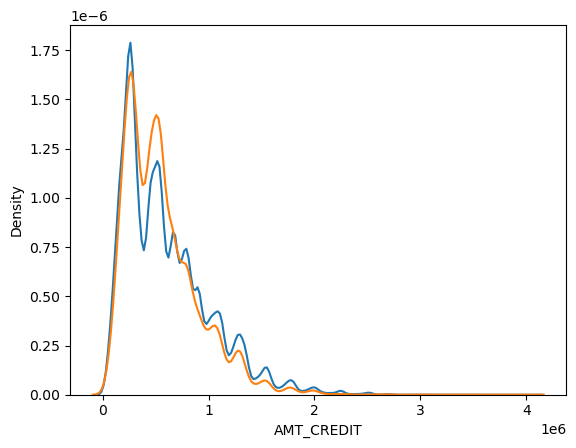

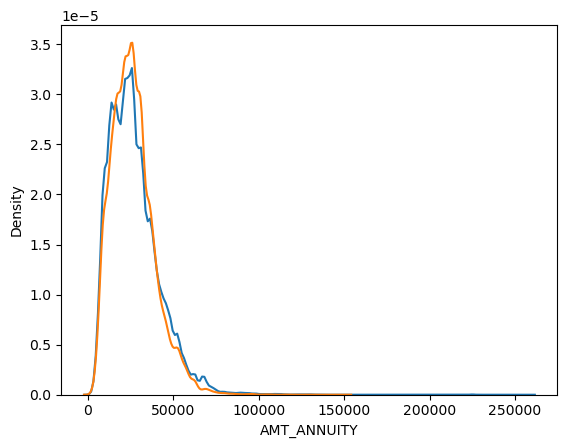

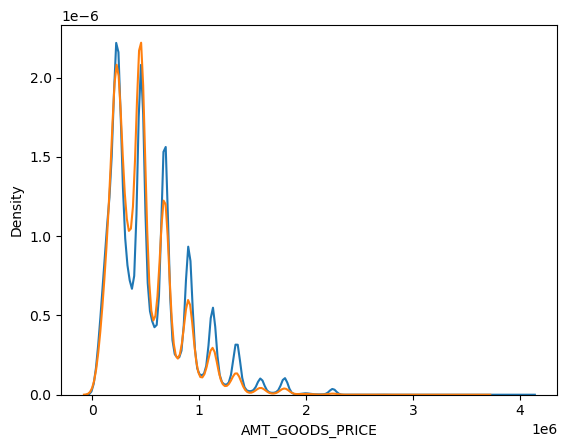

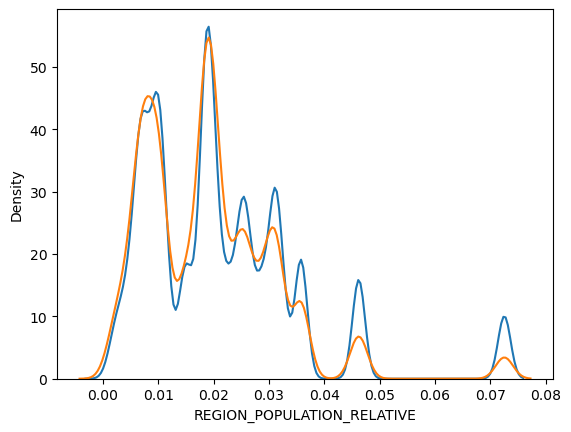

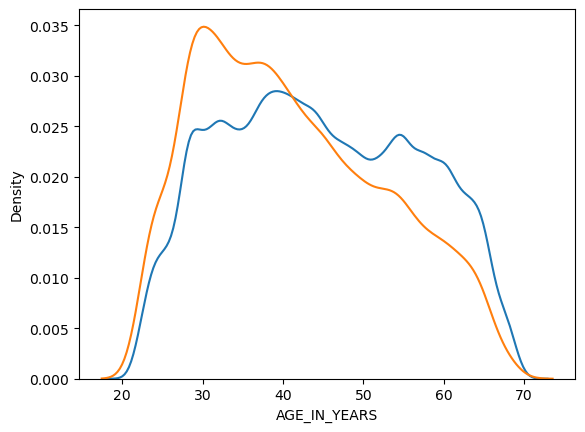

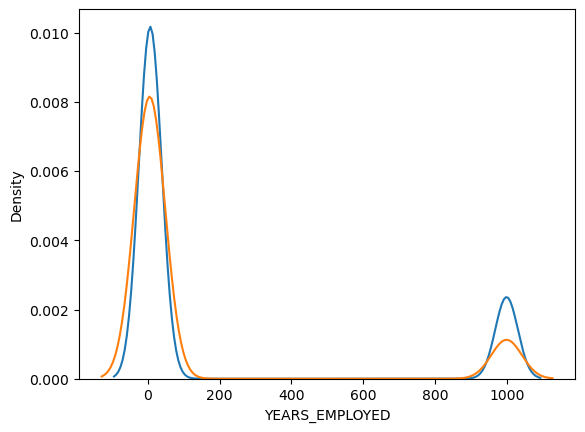

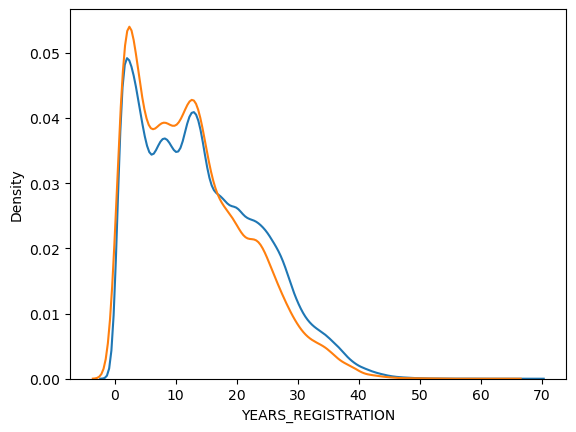

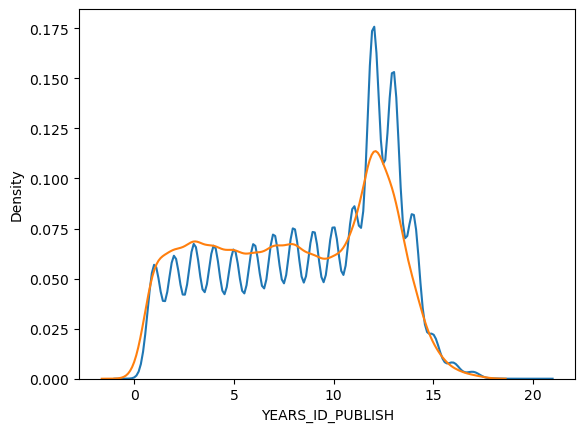

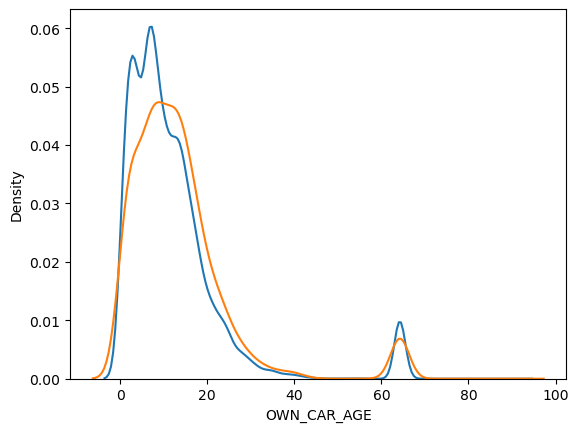

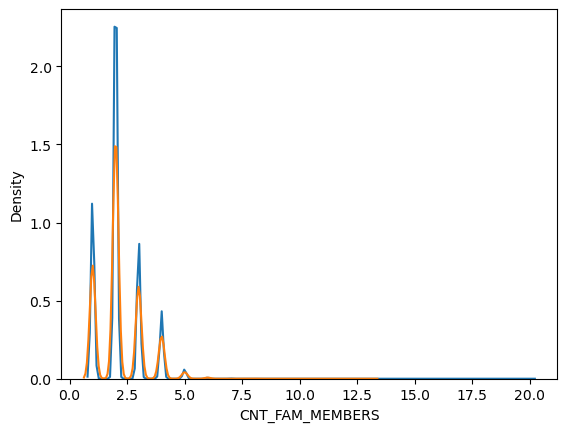

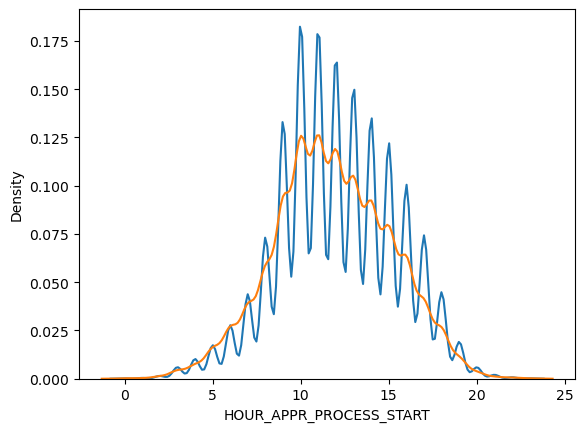

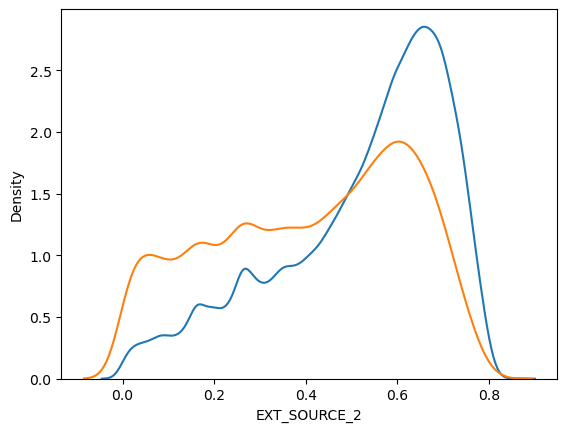

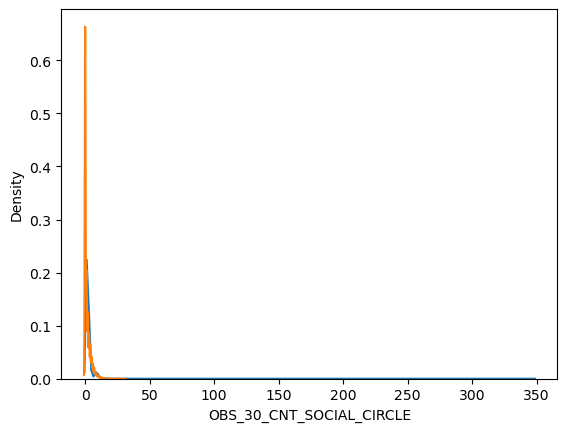

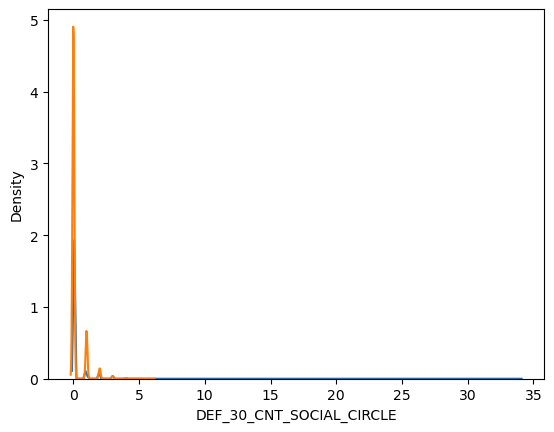

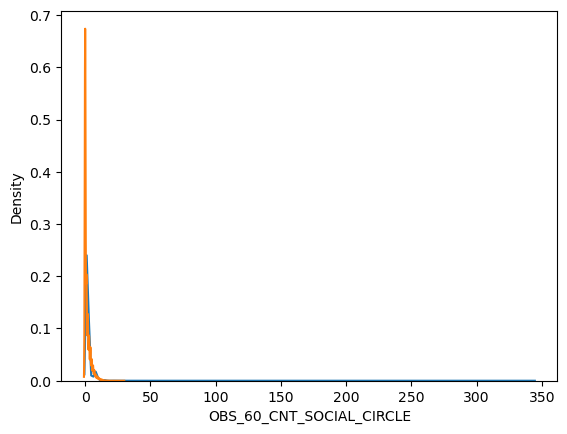

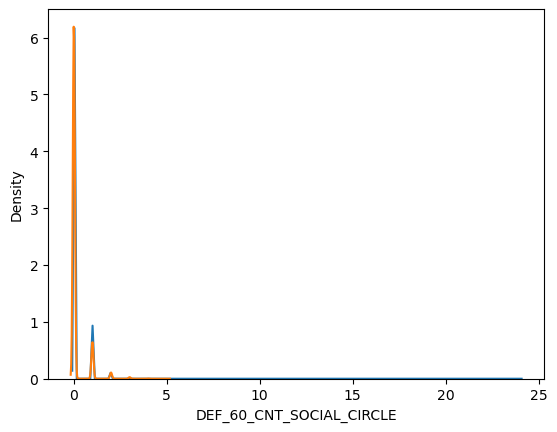

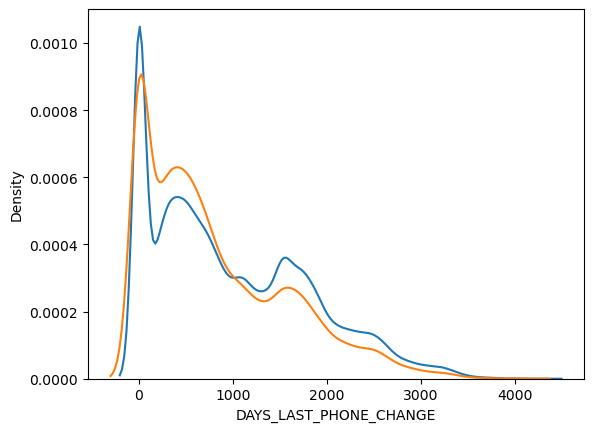

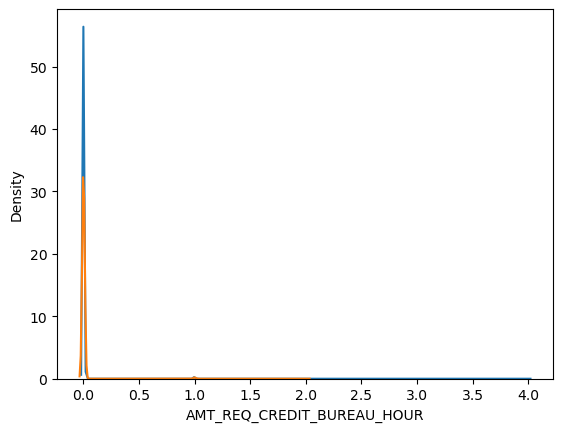

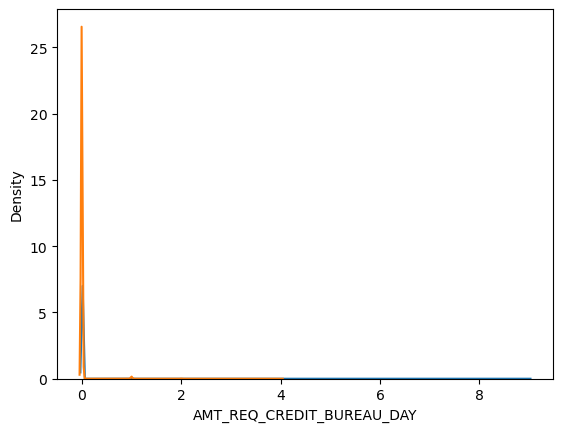

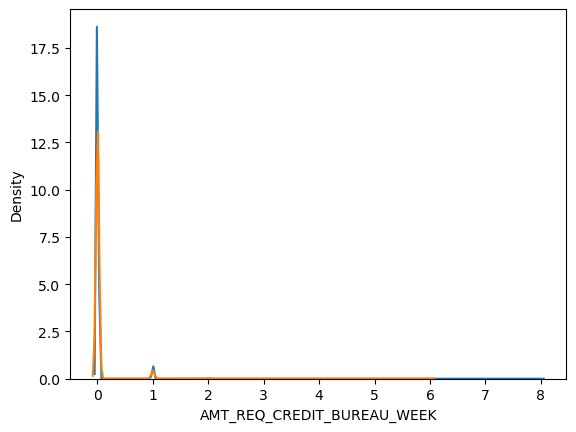

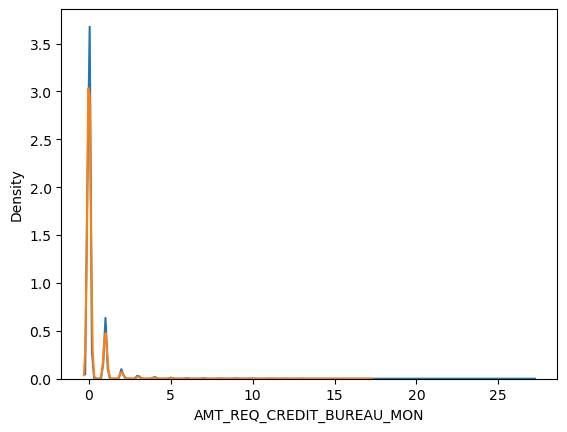

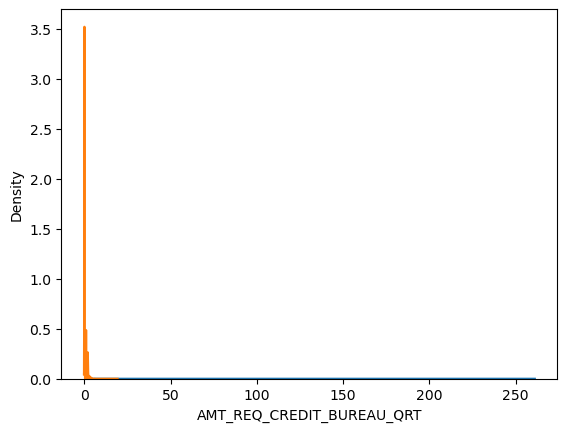

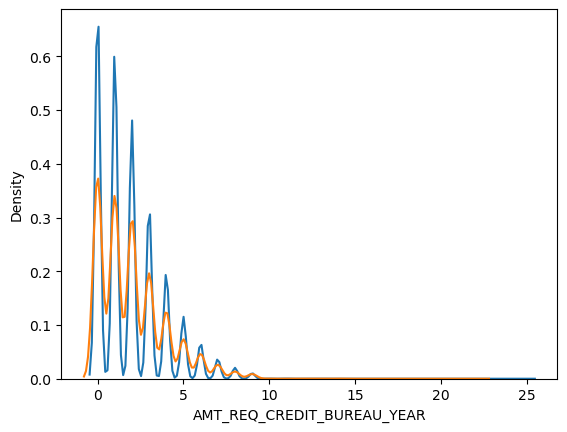

In [929]:
for i in numvarList:
    sns.distplot(df_cat_0[i], hist = False, label = 'No Default')
    sns.distplot(df_cat_1[i], hist = False, label = 'Payment difficulty')
    plt.show()

Graph for :  CNT_CHILDREN


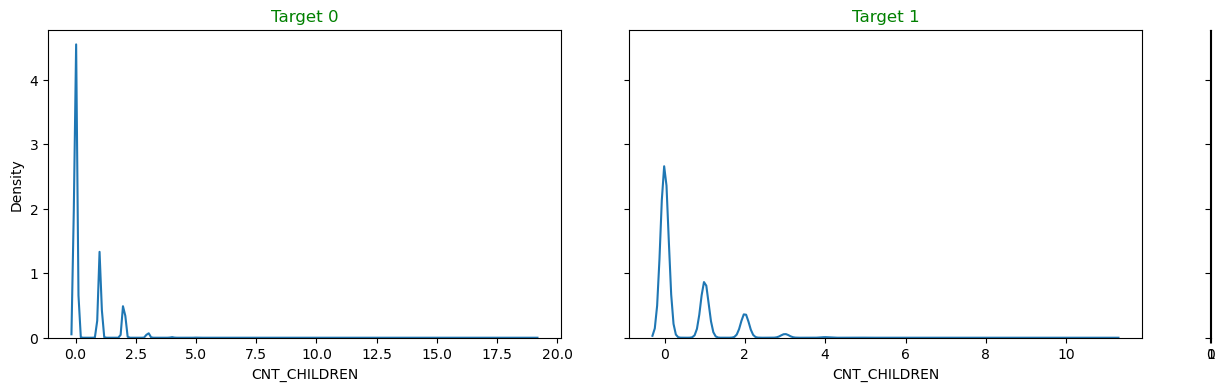

Graph for :  AMT_INCOME_TOTAL


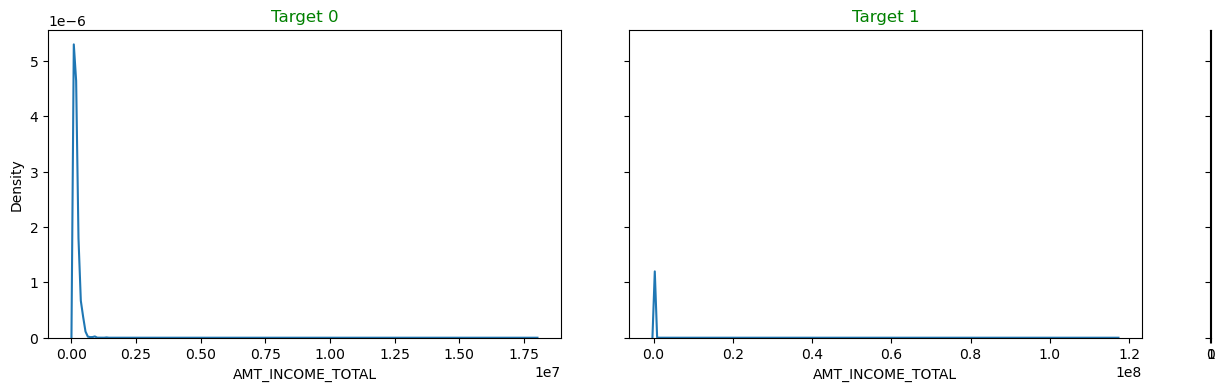

Graph for :  AMT_CREDIT


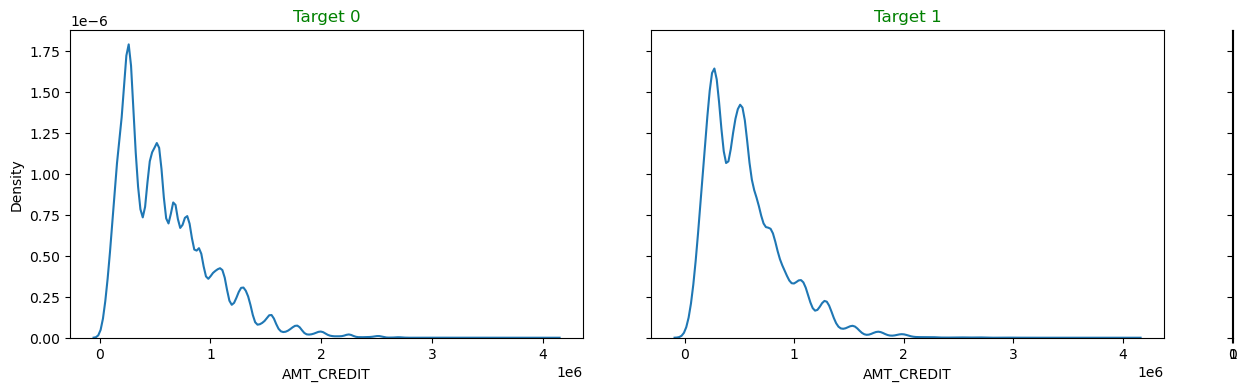

Graph for :  AMT_ANNUITY


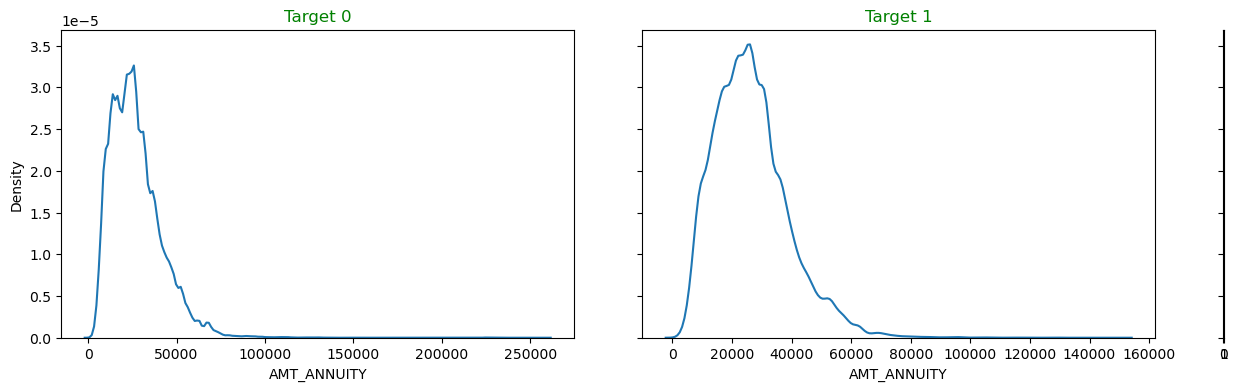

Graph for :  AMT_GOODS_PRICE


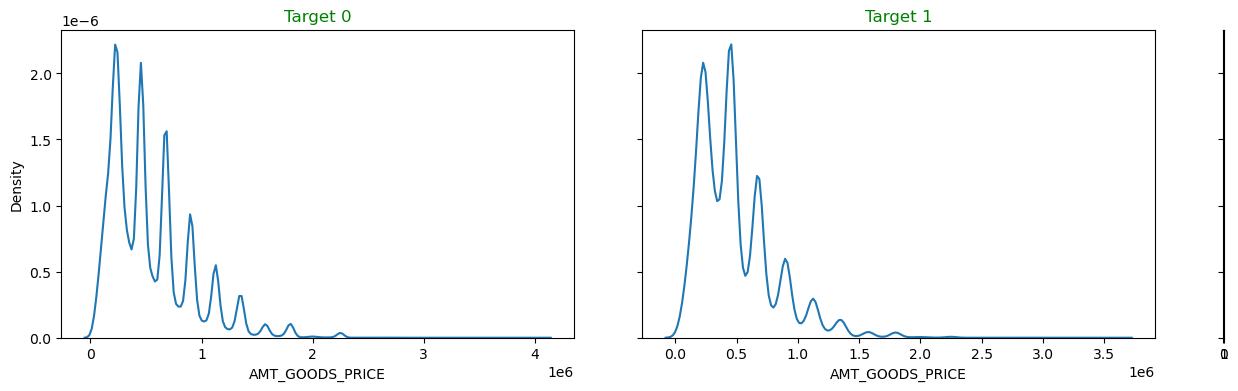

Graph for :  REGION_POPULATION_RELATIVE


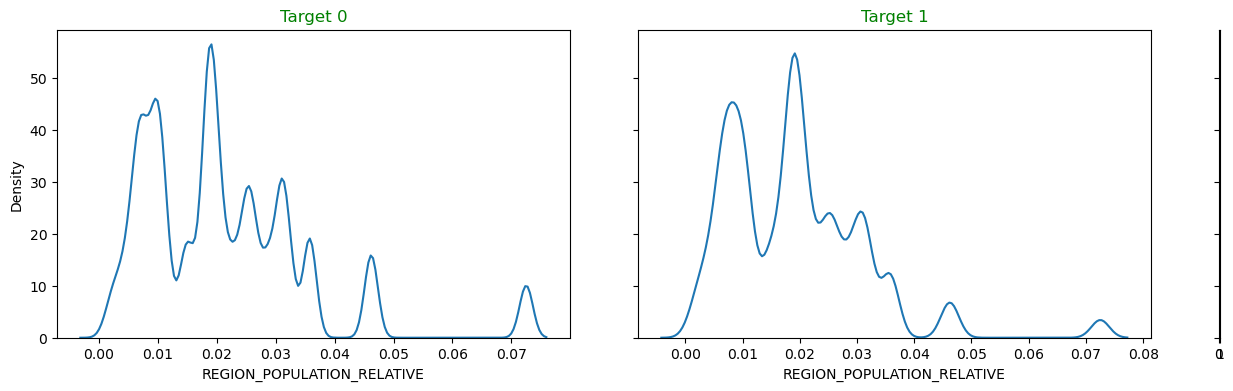

Graph for :  AGE_IN_YEARS


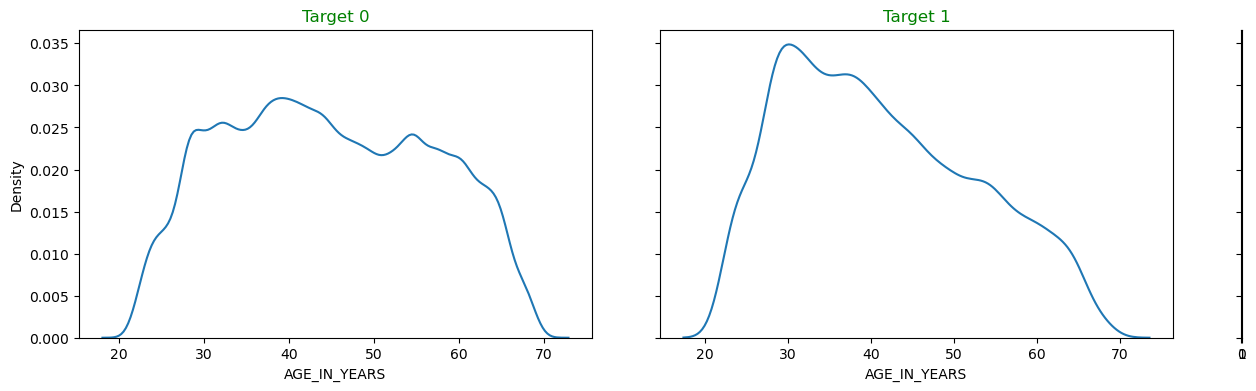

Graph for :  YEARS_EMPLOYED


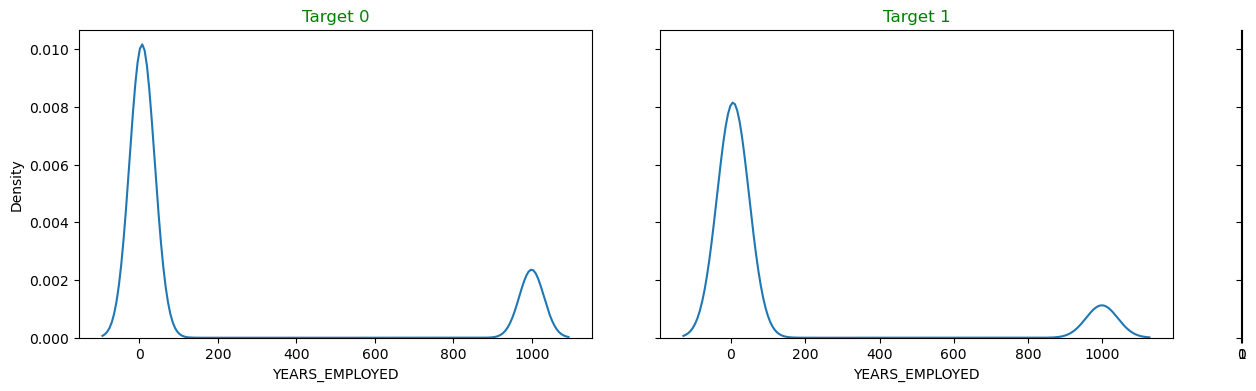

Graph for :  YEARS_REGISTRATION


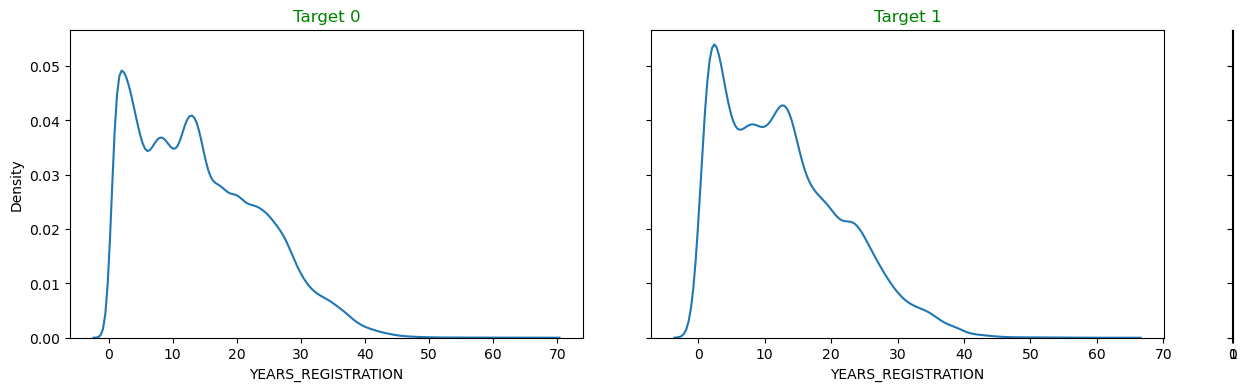

Graph for :  YEARS_ID_PUBLISH


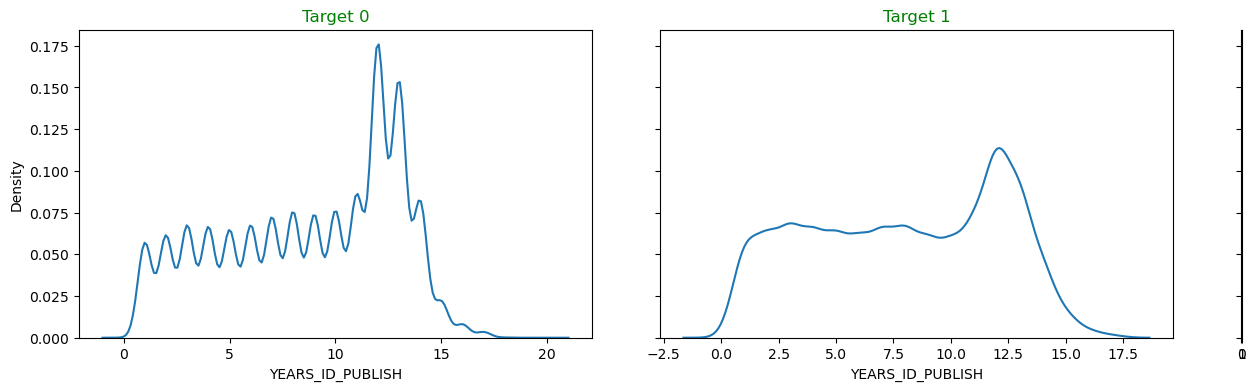

Graph for :  OWN_CAR_AGE


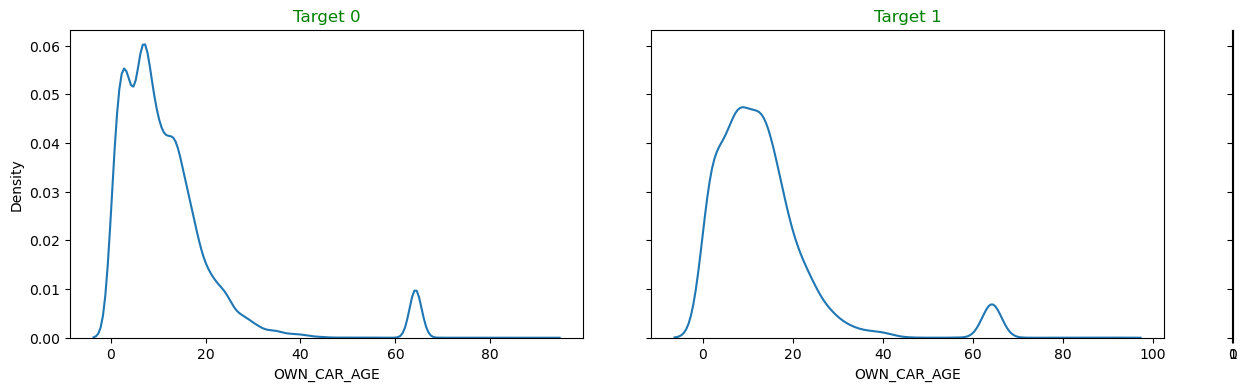

Graph for :  CNT_FAM_MEMBERS


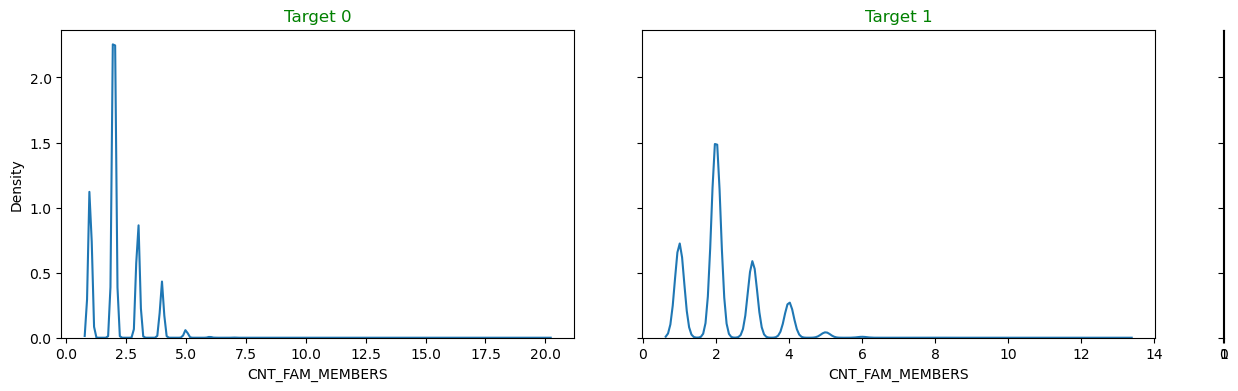

Graph for :  HOUR_APPR_PROCESS_START


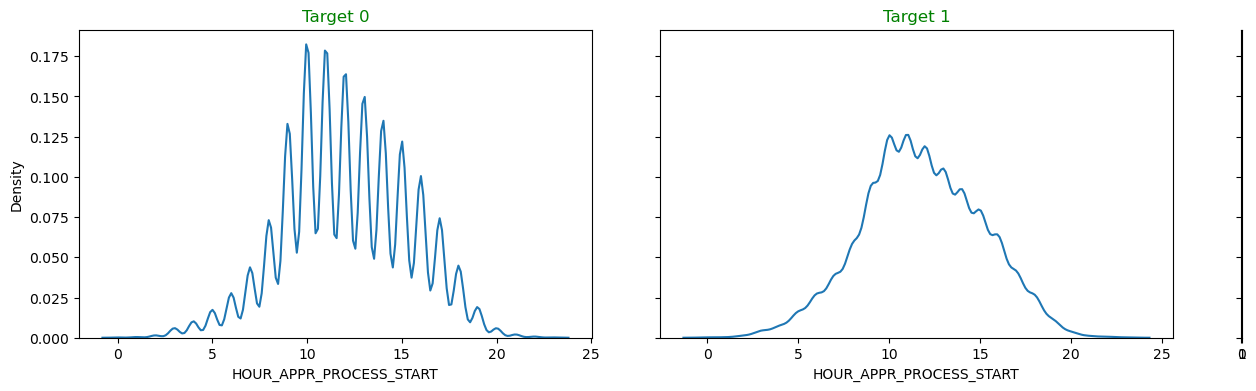

Graph for :  EXT_SOURCE_2


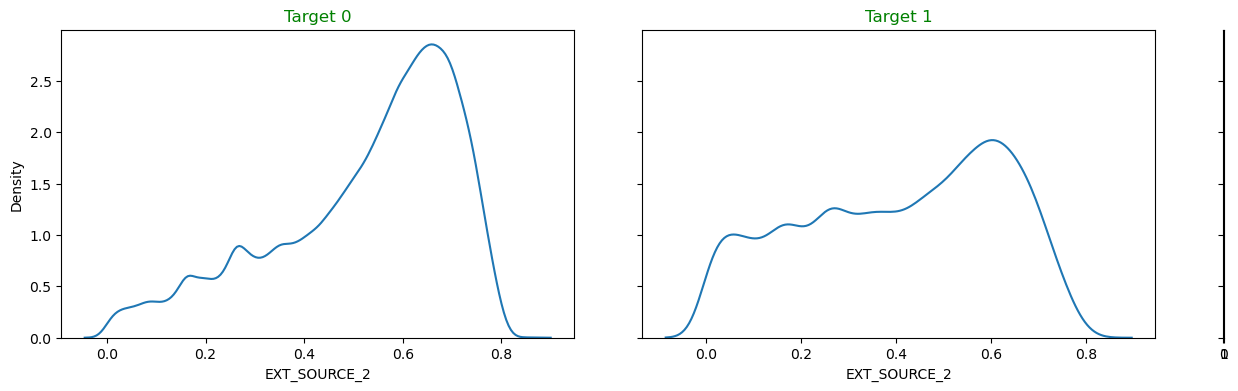

Graph for :  OBS_30_CNT_SOCIAL_CIRCLE


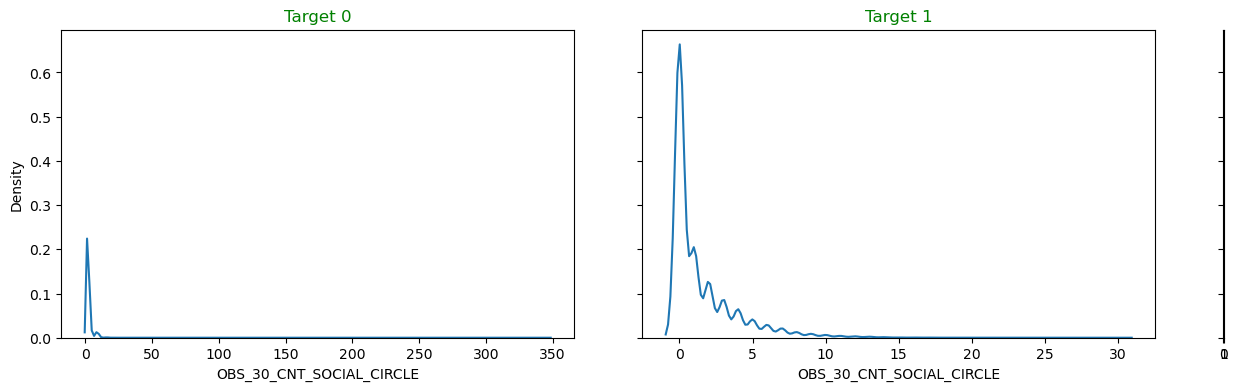

Graph for :  DEF_30_CNT_SOCIAL_CIRCLE


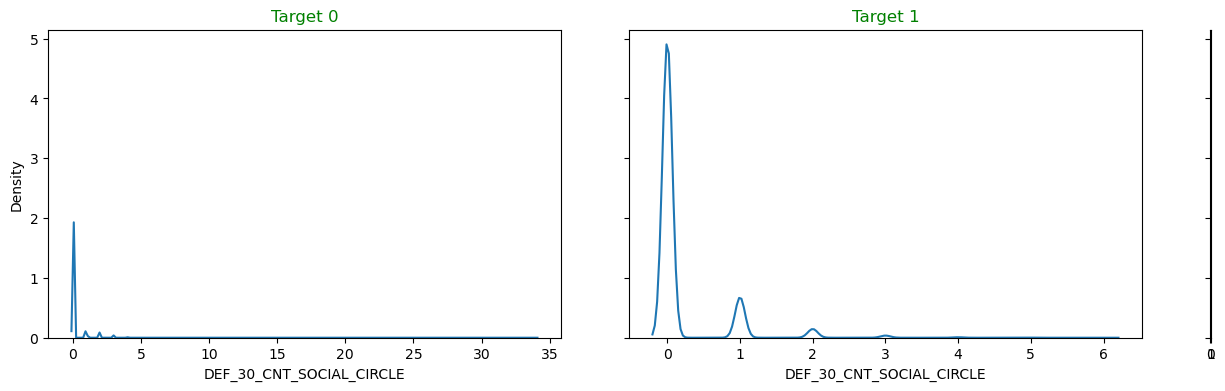

Graph for :  OBS_60_CNT_SOCIAL_CIRCLE


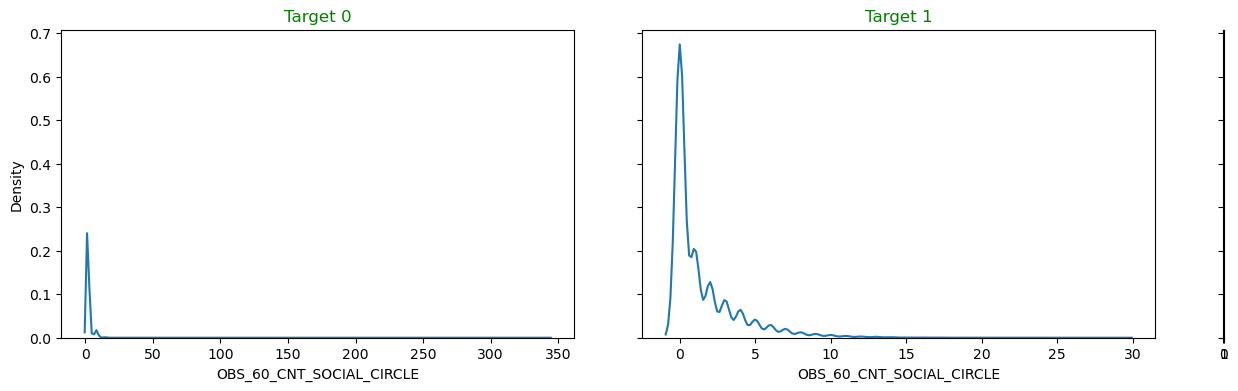

Graph for :  DEF_60_CNT_SOCIAL_CIRCLE


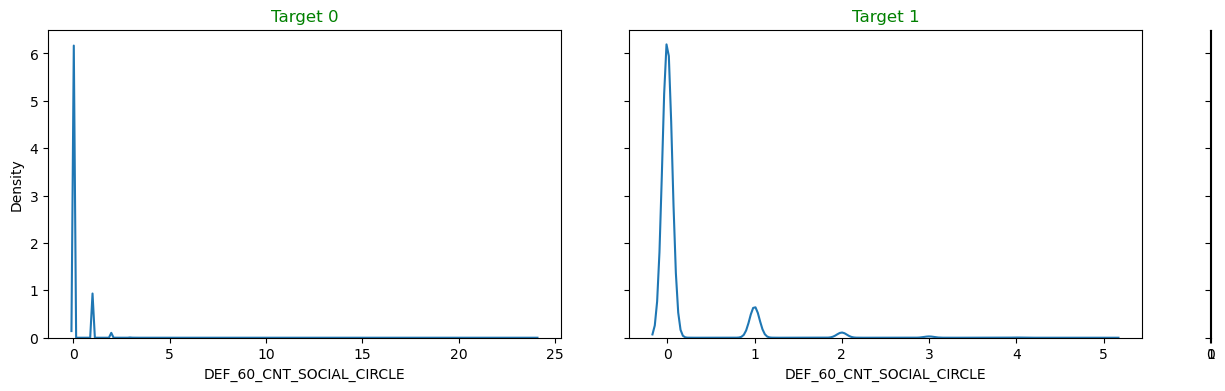

Graph for :  DAYS_LAST_PHONE_CHANGE


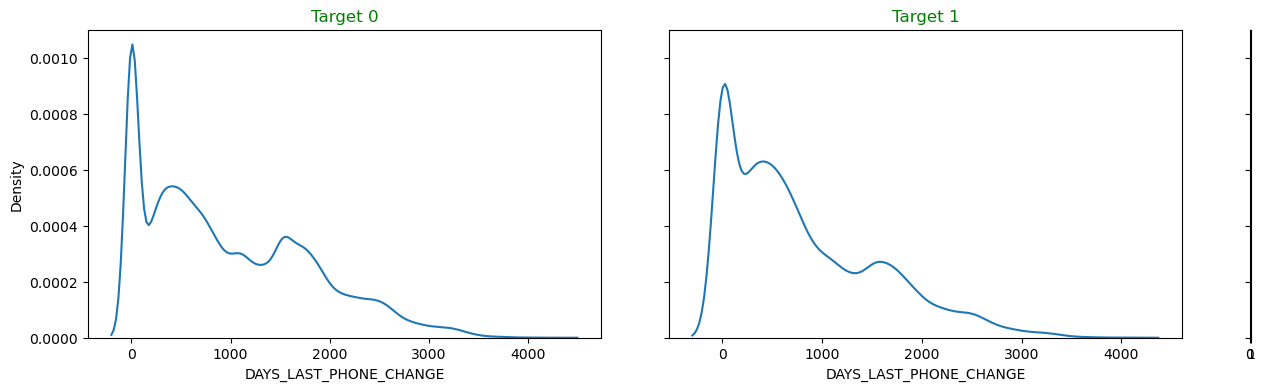

Graph for :  AMT_REQ_CREDIT_BUREAU_HOUR


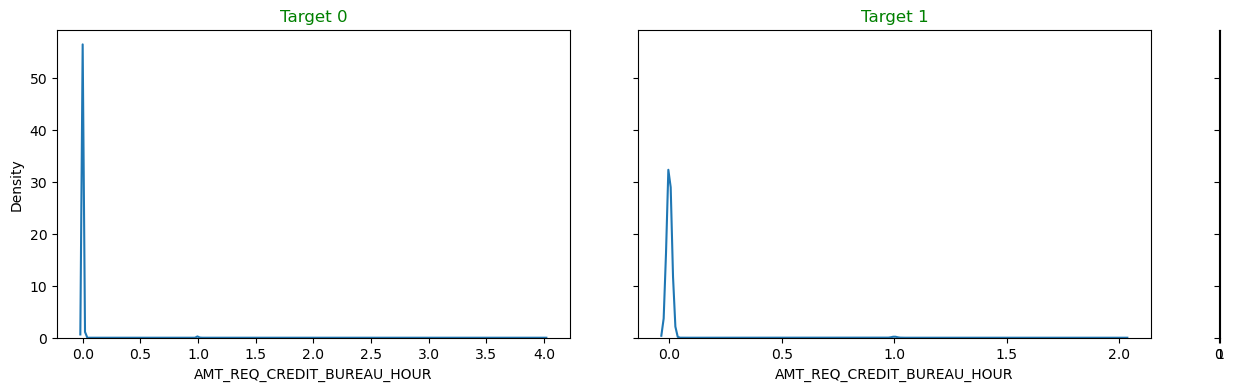

Graph for :  AMT_REQ_CREDIT_BUREAU_DAY


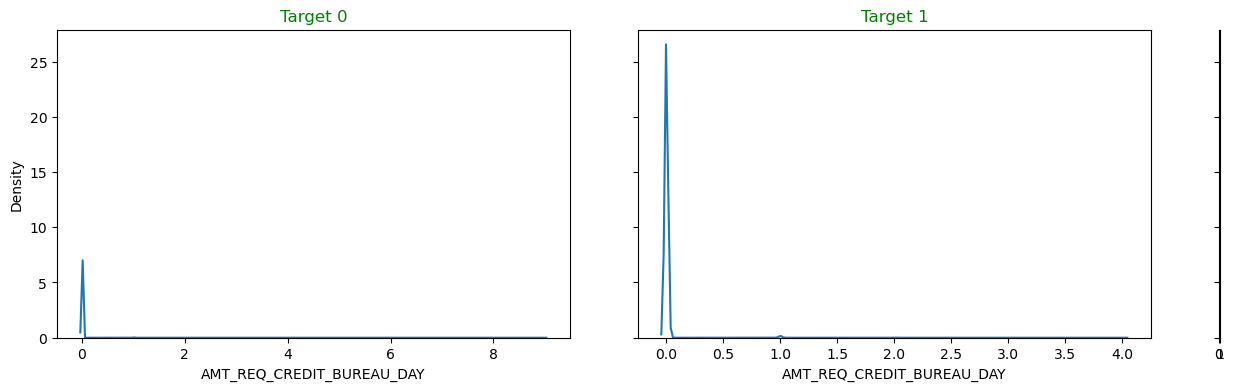

Graph for :  AMT_REQ_CREDIT_BUREAU_WEEK


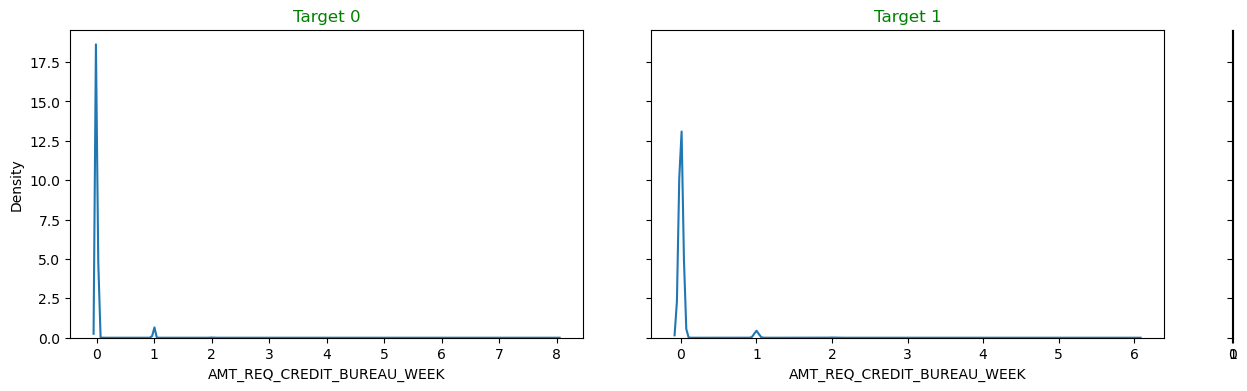

Graph for :  AMT_REQ_CREDIT_BUREAU_MON


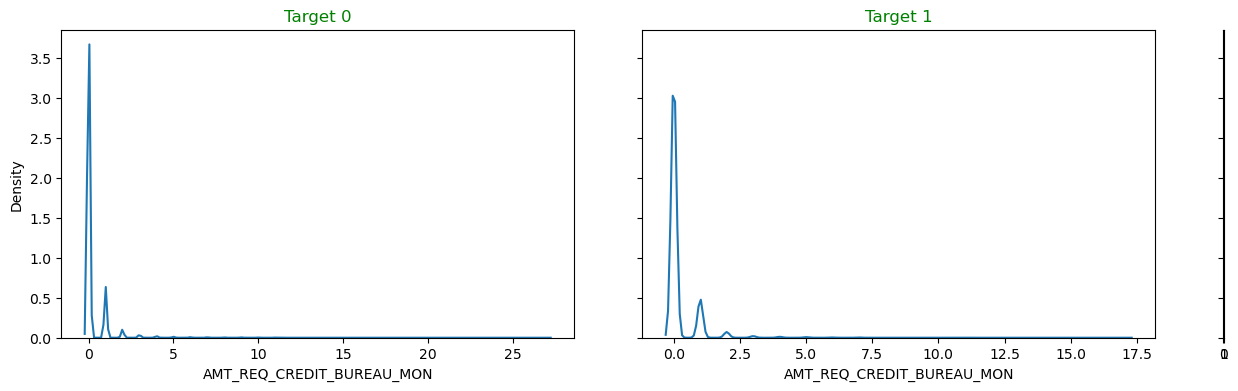

Graph for :  AMT_REQ_CREDIT_BUREAU_QRT


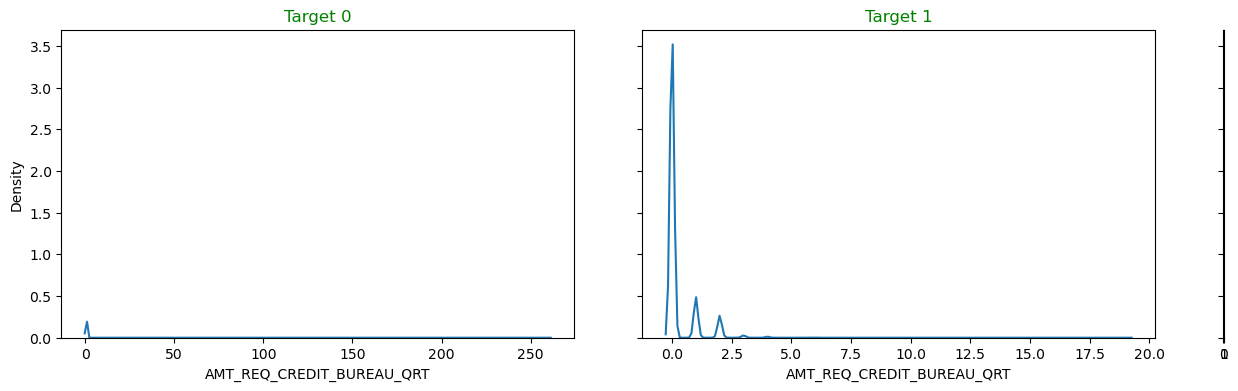

Graph for :  AMT_REQ_CREDIT_BUREAU_YEAR


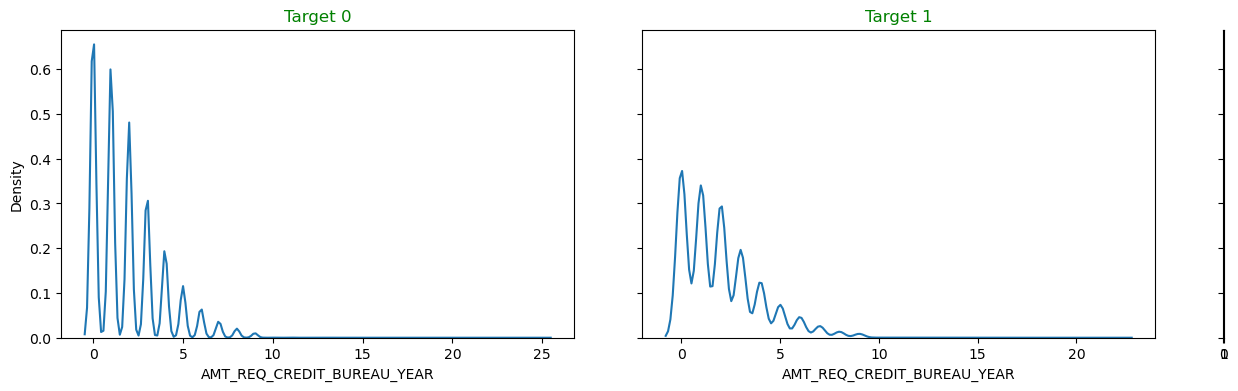

In [930]:
#plotting in seperate plots to get more CLARITY
for i in numvarList:
    cat_num_0=df_cat_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1,0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.distplot(df_cat_0[i], ax=ax1,hist = False)


    chart1.axes.set_title('Target 0',fontsize= 12, fontweight= 7, color= 'Green')
    cat_num_1=df_cat_1[i].value_counts()
    chart2=sns.distplot(a=df_cat_1[i],ax=ax2,hist = False)
    chart2.axes.set_title('Target 1',fontsize= 12, fontweight= 7, color= 'Green')
    plt.show()

### Few notable points

1. AMT_CREDIT - Appears lower for Target 1, which is a good sign as lesser default loss to    the company.
2. AGE_IN_YEARS Density of 30 years in Target 1 larger, indicating younger are defaulting     more.
3. YEARS_EMPLOYED has larger no of rows of incorrect data and hence the data                  representation is incorrect.
4. Lesser no of Target 1 OWN cars
5. EXT_SOURCE_2 is clearly showing that TARGET 0 has higher density of higher scores
6. OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE,              DEF_60_CNT_SOCIAL_CIRCLE - Very clearly visible that Target 1, 30 DPD and 60 DPD           observed in social surroundings is higher.
7. DAYS_LAST_PHONE_CHANGE - More people from Target 1 have changed their phone earlier        than Target 1. Indicating intention issues in repaying loan.
8. AMT_REQ_CREDIT_BUREAU_YEAR, month, week, hour - has lesser Target 1 at 0 hits. This        could indicate they are looking to get loans from various financial companies.

Graph for :  AGE_GROUP


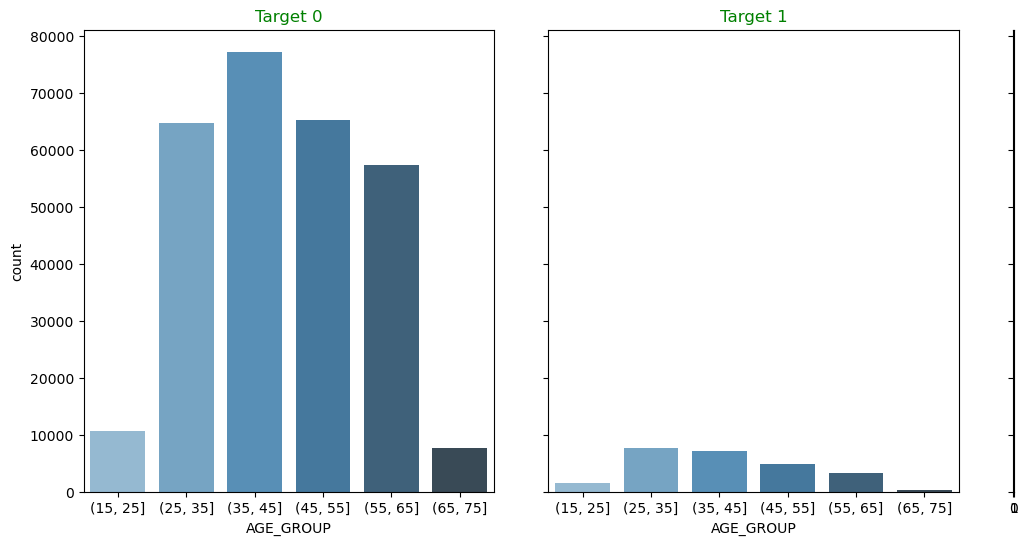

Graph for :  INCOME_GROUP


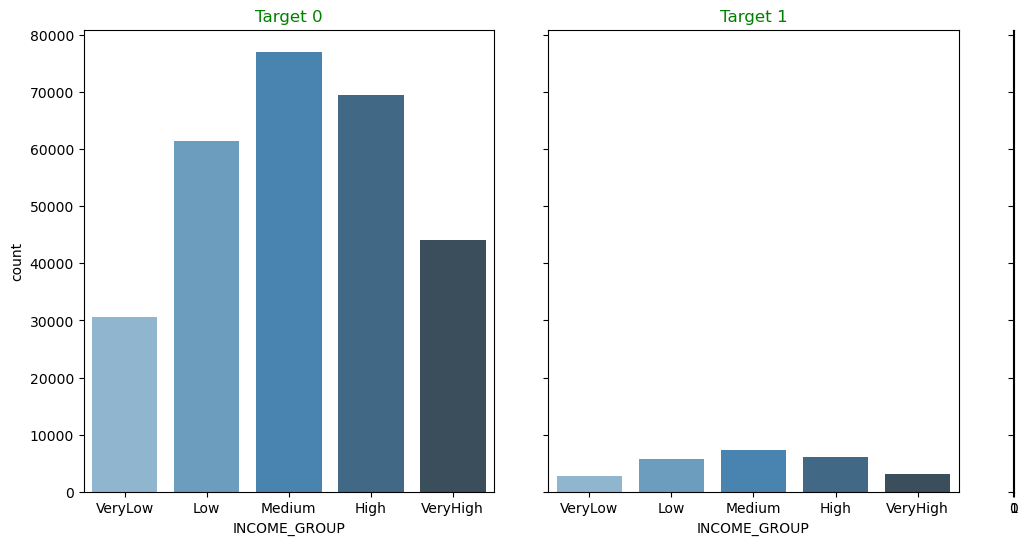

In [933]:
#plotting Age_Group and Income_Group

binList=["AGE_GROUP","INCOME_GROUP"]
for i in binList:

    cat_num_0=df_cat_0[i].value_counts()
    f,(ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ", i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(),horizontalalignment= 'center')
    chart1.axes.set_title('Target 0',fontsize= 12, fontweight= 7, color='Green')
    cat_num_1=df_cat_1[i].value_counts()
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(),horizontalalignment= 'center')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7, color='Green')
    plt.show()

### Few notable points

1. AGE_GROUPUP - 35-45 are more in TARGET 0. In Target 1 - 25-25 havehigher share. Age does seem like influencing default.
2. INCOME_GROUP - Medium income group have more count in Target 0 and Target 1

## Bivariate Analysis on Categorical and Continuous Variable 

### Categorical and Continuous Variable

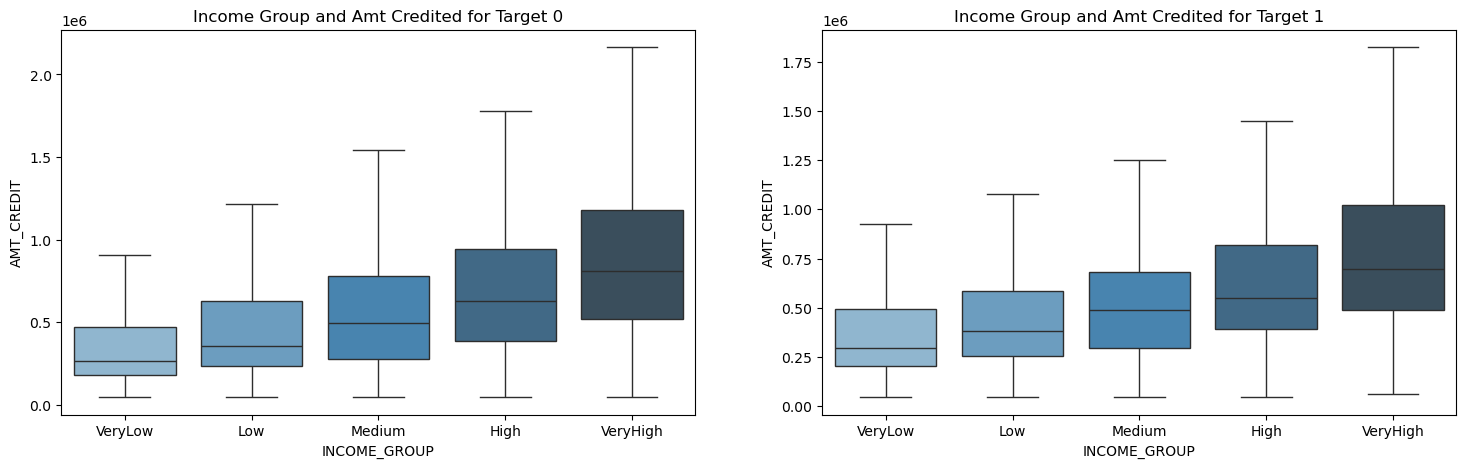

In [938]:
## checking INCOME_GROUP VS AMT_CREDIT for both data frames

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target 0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df_cat_0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target 1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df_cat_1, showfliers=False, palette="Blues_d")
plt.show()

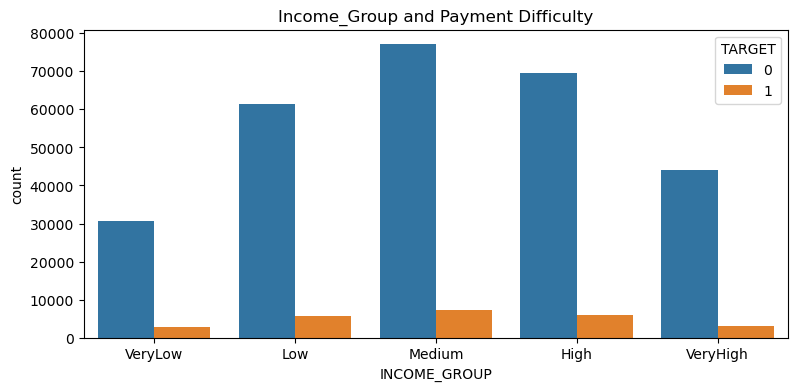

In [939]:
#checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income_Group and Payment Difficulty")
sns.countplot(x='INCOME_GROUP', hue = 'TARGET', data =app_df)
plt.show()

In [940]:
#Checking absolute values
res=pd.pivot_table(data=app_df, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc='mean')
round(res,2)

TARGET                0          1
INCOME_GROUP                      
VeryLow       347868.46  373460.40
Low           456525.23  451343.70
Medium        568861.72  542580.16
High          699628.82  643297.93
VeryHigh      890186.33  786021.83

### Few notable points

1. We can infer that though the maximum no of loans is given to Medium income group. Default value per loan is highest in High income group as the AMT_CREDIT is higher too. 
   The loan book of the finanacial institution can get affected due to higher amount not being paid back.
2. The company must devise a different set of rules and policies while approving higher income group loans.

### Categorical and Continuous Variable

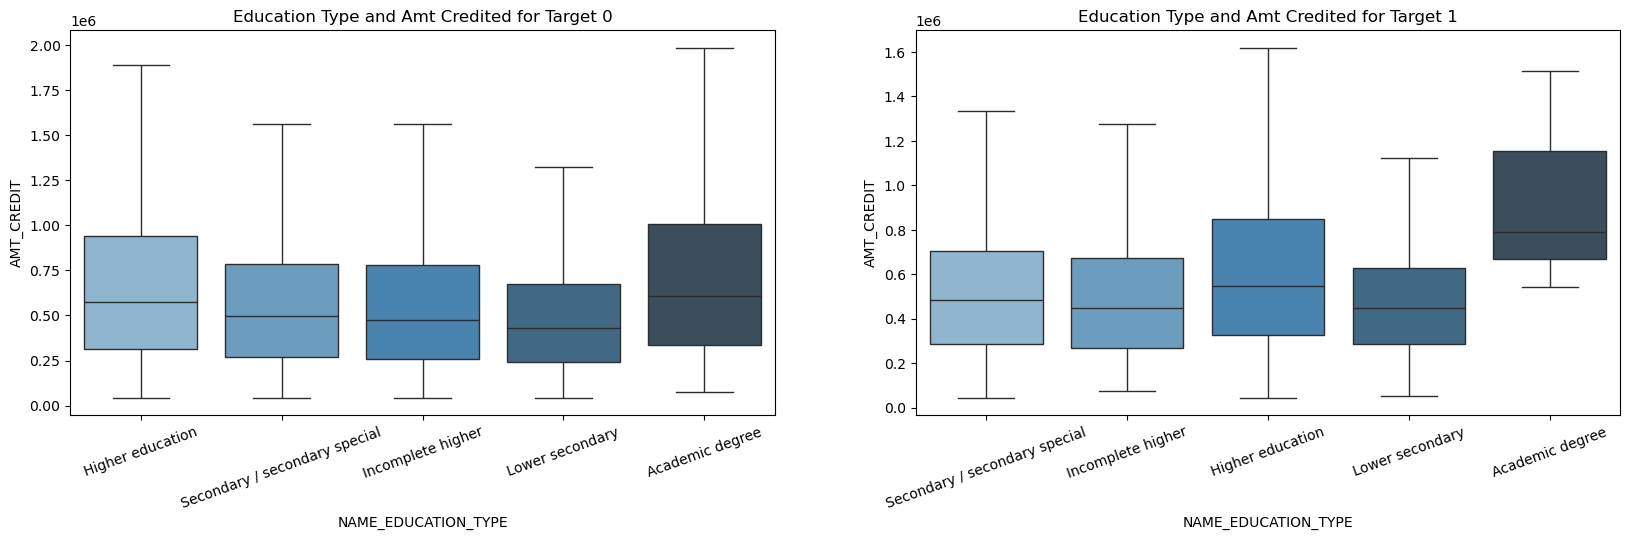

In [944]:
## Bivariate Categoric to Continuous

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df_cat_0,showfliers=False, palette="Blues_d")
plt.xticks(rotation= 20, fontsize= 10, fontweight =2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Target 1")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df_cat_1,showfliers=False, palette="Blues_d")
plt.xticks(rotation= 20, fontsize= 10, fontweight= 2)
plt.show()

### Few notable points

1. Median of Loanvalues defaulting for Applicants with Academic degree is higher. But as      we saw in a plot above, no of applicants with academic degree is miniscule
2. No inference can be drawn from this analysis.

In [947]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0

res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER                   F          M       XNA
NAME_INCOME_TYPE                                    
Businessman           1125000.0  1272857.0       NaN
Commercial associate   668844.0   685304.0  540000.0
Maternity leave        562500.0   765000.0       NaN
Pensioner              535162.0   571540.0       NaN
State servant          665132.0   695357.0       NaN
Student                372556.0   598753.0       NaN
Unemployed             787909.0  1045500.0       NaN
Working                577846.0   587183.0  352500.0

In [948]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 1

res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE", columns='CODE_GENDER', values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

Female on Maternity leave and unemployed, Females and males are defaulting larger loan values credited to them

### Categorical and Continuous Variable

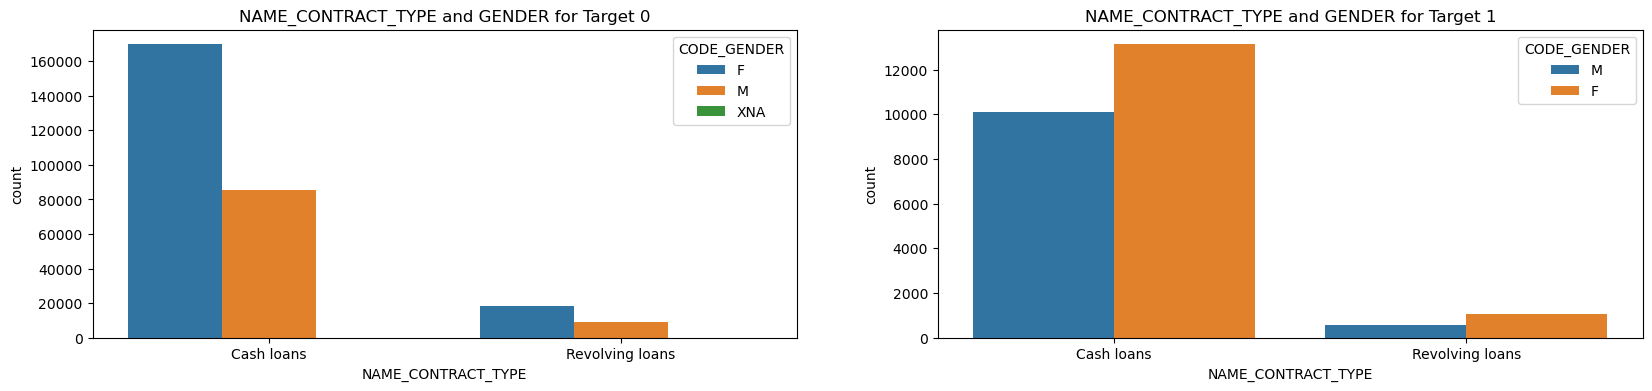

In [951]:
#Bivariate categorical and categorical 

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 0")

sns.countplot(x='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data= df_cat_0)

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 1")
sns.countplot(x='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data= df_cat_1)

plt.show()

### Few notable points


1. As noted above data has more females as loan applicant.
2. As seen in plot above, though male applicants are lower, ratio of male applicants defaulting is higher. Let us check this by another analysis. 

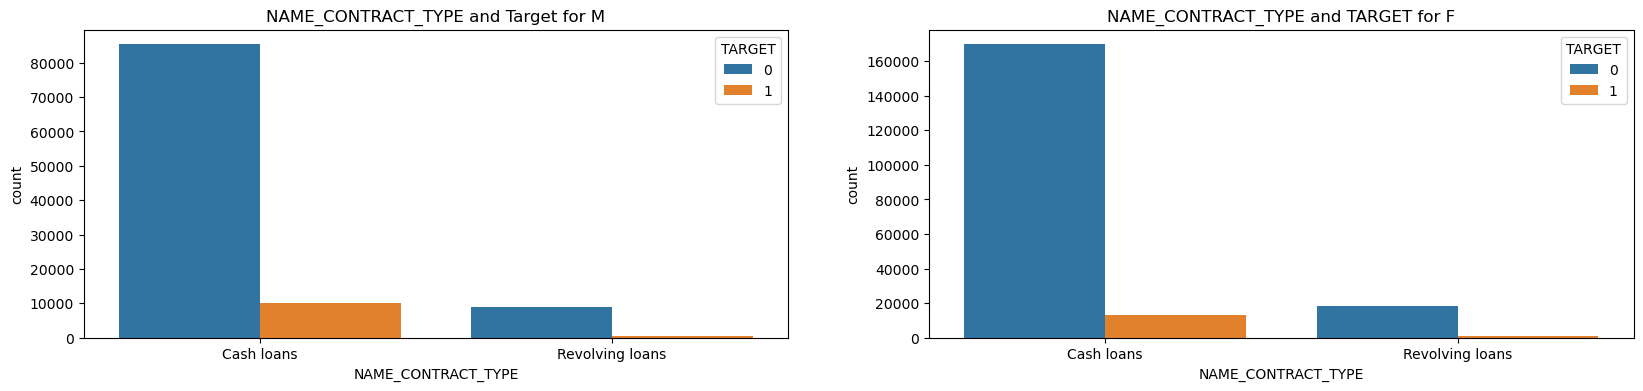

In [954]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and Target for M")

sns.countplot(x='NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot(x='NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="F")])

plt.show()

### Few notable points

1. Male applicants are defaulting more that female applicants

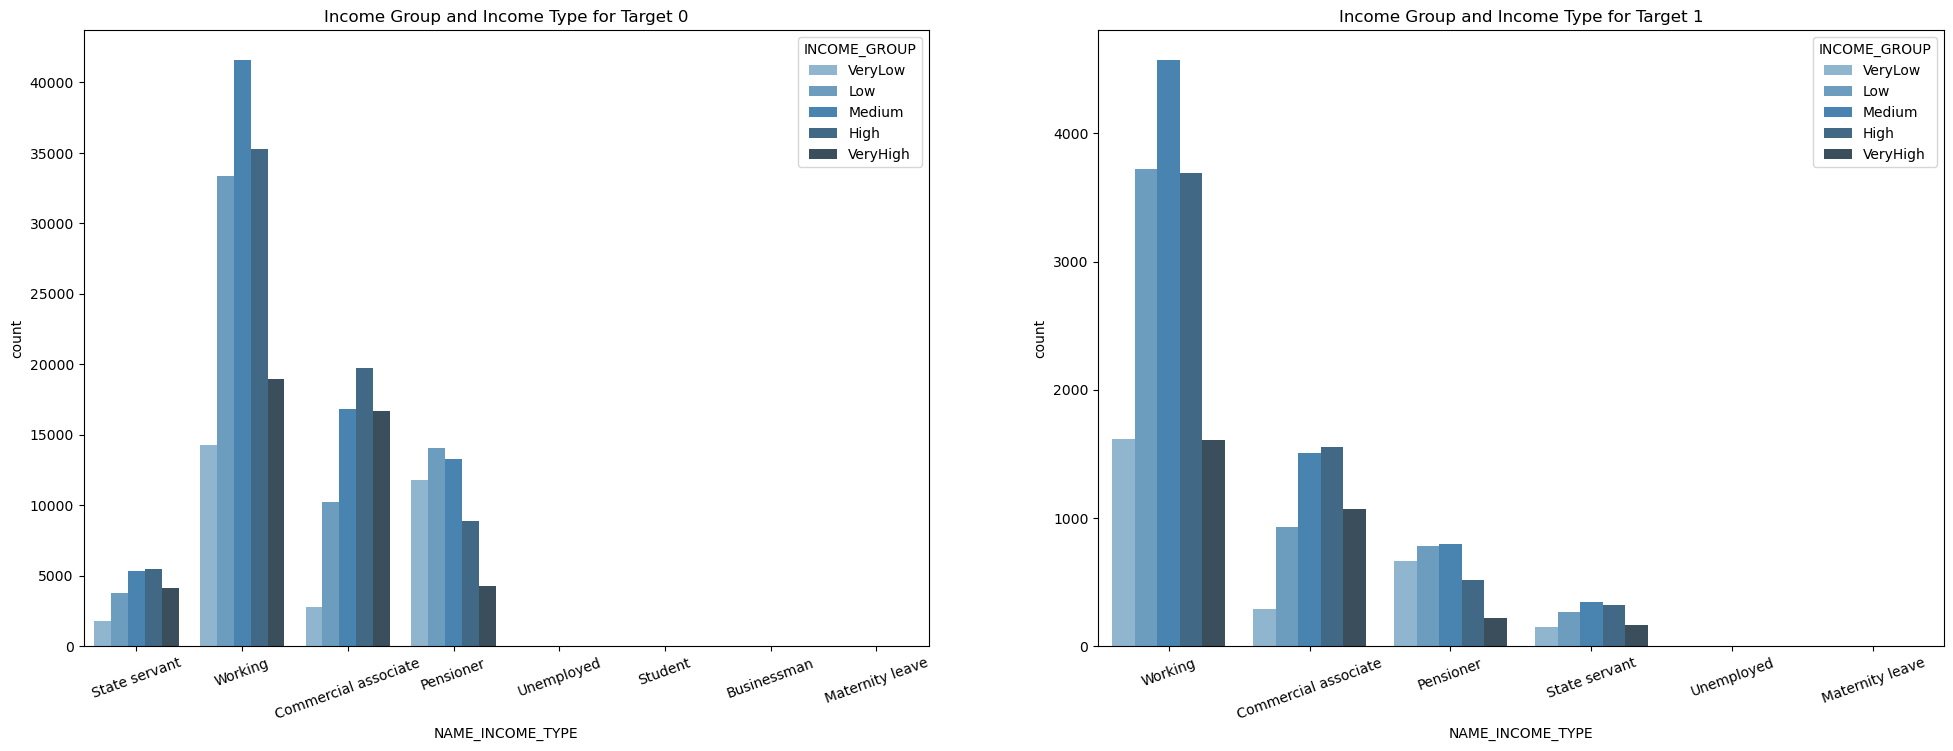

In [957]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Income Group and Income Type for Target 0")
sns.countplot(x='NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =df_cat_0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10, fontweight= 2)
plt.subplot(1,2,2)
plt.title("Income Group and Income Type for Target 1")
sns.countplot(x='NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =df_cat_1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10, fontweight= 2)

plt.show()

### Few notable points

Medium income group with income type has almost 1 in 12 defaults. Higher than the avg 1 in 11 defaults.

In [965]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0 

res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE", columns='CODE_GENDER', values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER                   F          M       XNA
NAME_INCOME_TYPE                                    
Businessman           1125000.0  1272857.0       NaN
Commercial associate   668844.0   685304.0  540000.0
Maternity leave        562500.0   765000.0       NaN
Pensioner              535162.0   571540.0       NaN
State servant          665132.0   695357.0       NaN
Student                372556.0   598753.0       NaN
Unemployed             787909.0  1045500.0       NaN
Working                577846.0   587183.0  352500.0

In [966]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0

res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE", columns='CODE_GENDER', values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

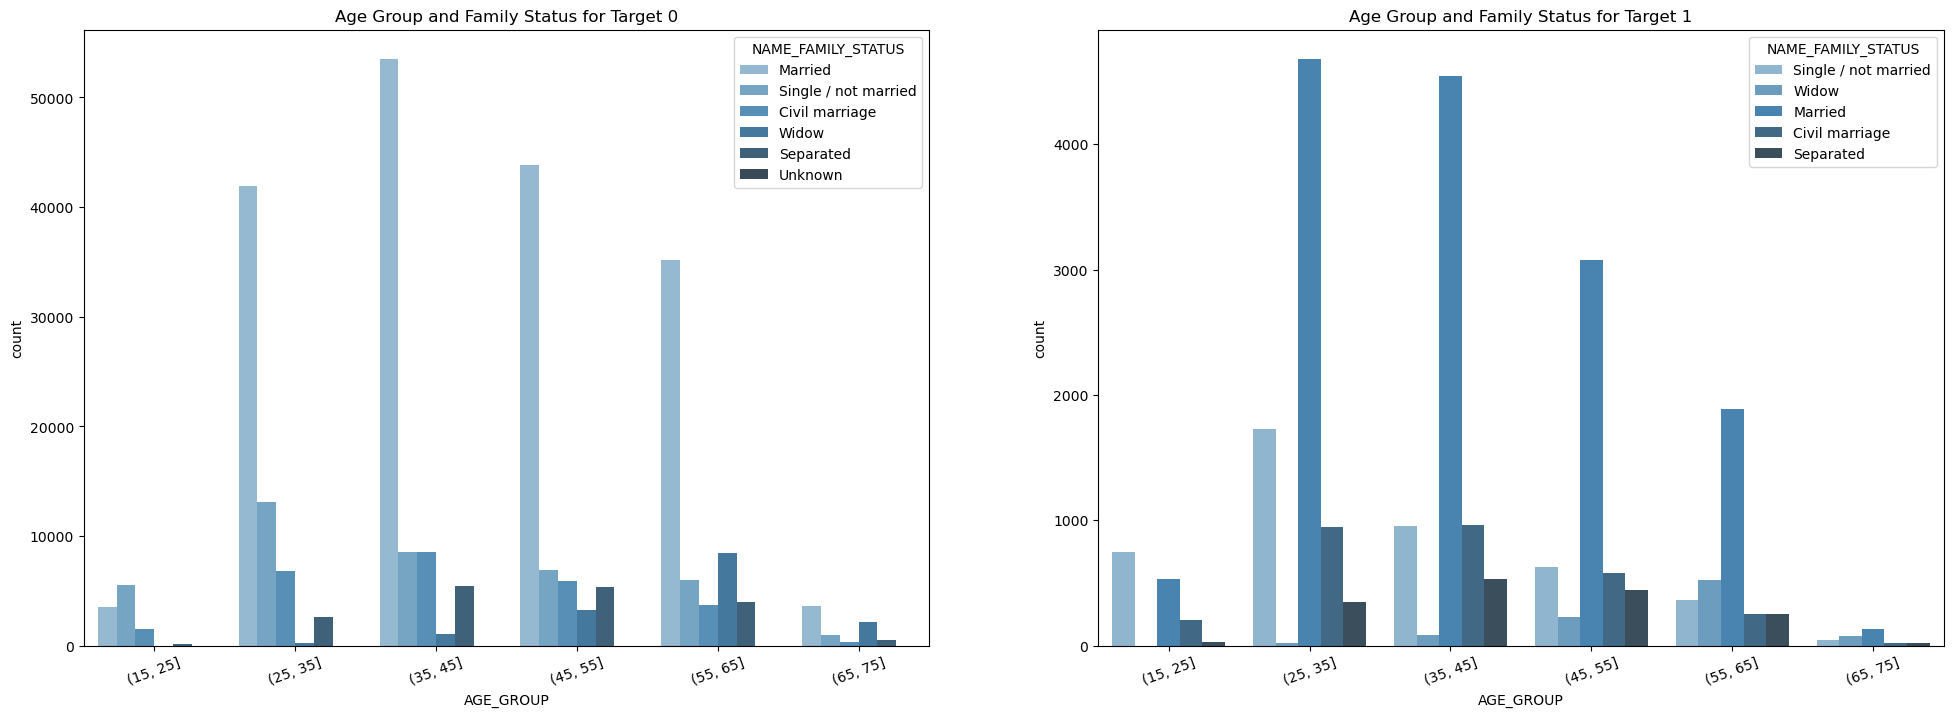

In [967]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot(x='AGE_GROUP', hue = 'NAME_FAMILY_STATUS', data =df_cat_0, palette="Blues_d")
plt.xticks(rotation =20, fontsize=10, fontweight=2)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot(x='AGE_GROUP', hue = 'NAME_FAMILY_STATUS', data =df_cat_1, palette="Blues_d")
plt.xticks(rotation =20, fontsize=10, fontweight=2)

plt.show()

### Few notable points

Married applicant in the age group 25-35 and 35-45 is the largest group of applicant with payment difficulties.

## Top Correlations

In [971]:
#correlation for Target 0
df_corr_0=df_cat_0.drop(catvarList, axis=1)
df_corr_0_numeric = df_corr_0.select_dtypes(include='number')
correlation_cat_0=df_corr_0_numeric.corr().abs()

In [972]:
corr_df = correlation_cat_0.where(np.triu(np.ones(correlation_cat_0.shape),k=1).astype(bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace=True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending = False)

corr_df.head(10)

Column1                   Column2  Correlation
502  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508
166           AMT_GOODS_PRICE                AMT_CREDIT     0.987250
353           CNT_FAM_MEMBERS              CNT_CHILDREN     0.878571
530  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859332
167           AMT_GOODS_PRICE               AMT_ANNUITY     0.776686
139               AMT_ANNUITY                AMT_CREDIT     0.771309
251            YEARS_EMPLOYED              AGE_IN_YEARS     0.626062
138               AMT_ANNUITY          AMT_INCOME_TOTAL     0.418953
165           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.349462
111                AMT_CREDIT          AMT_INCOME_TOTAL     0.342799

In [973]:
#correlation for Target 1
df_corr_1=df_cat_1.drop(catvarList, axis=1)
df_corr_1_numeric = df_corr_1.select_dtypes(include='number')
correlation_cat_1 = df_corr_1_numeric.corr().abs()
corr_df1 = correlation_cat_1.where(np.triu(np.ones(correlation_cat_1.shape),k=1).astype(bool)).unstack().reset_index()
corr_df1.columns=['Column1','Column2','Correlation']
corr_df1.dropna(subset = ['Correlation'], inplace = True)
corr_df1 = corr_df.sort_values(by=['Correlation'],ascending=False)

corr_df1.head(10)

Column1                   Column2  Correlation
502  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508
166           AMT_GOODS_PRICE                AMT_CREDIT     0.987250
353           CNT_FAM_MEMBERS              CNT_CHILDREN     0.878571
530  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859332
167           AMT_GOODS_PRICE               AMT_ANNUITY     0.776686
139               AMT_ANNUITY                AMT_CREDIT     0.771309
251            YEARS_EMPLOYED              AGE_IN_YEARS     0.626062
138               AMT_ANNUITY          AMT_INCOME_TOTAL     0.418953
165           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.349462
111                AMT_CREDIT          AMT_INCOME_TOTAL     0.342799

We observe that the TOP 10 correlation columns are same for Target 0 and Target 1 dataframes
We will futher analyse each of these on a scatter plot to get better inferences


## Analysis on Continuous Variables

In [977]:
bivVar1=corr_df.head(10)['Column1'].tolist()
bivVar1

['OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'YEARS_EMPLOYED',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT']

In [980]:
bivVar2=corr_df.head(10)['Column2'].tolist()
bivVar2

['OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AGE_IN_YEARS',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL']

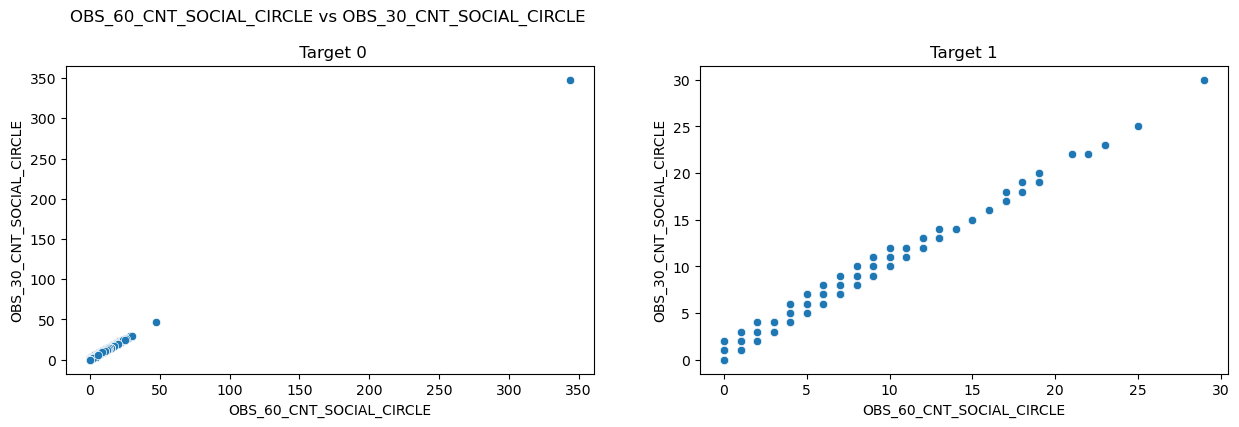

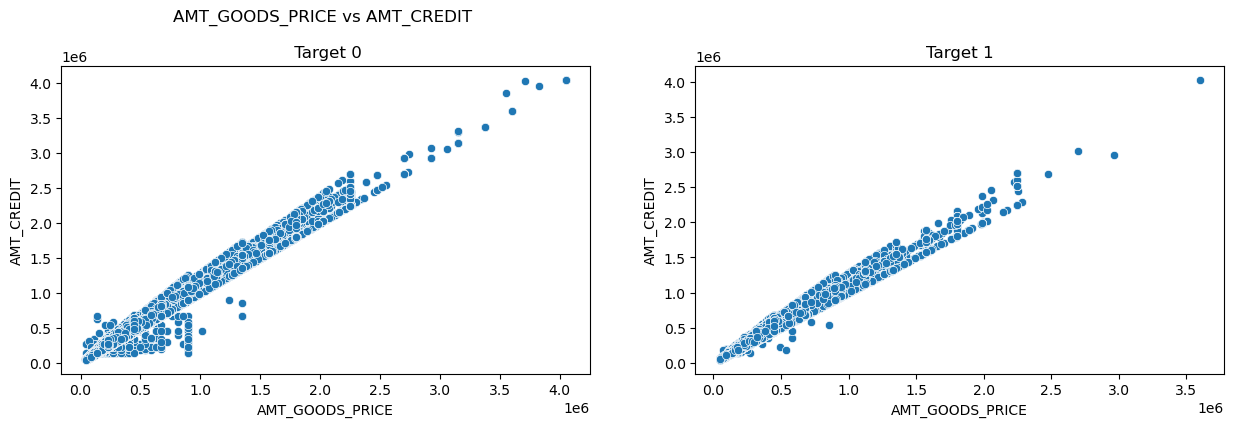

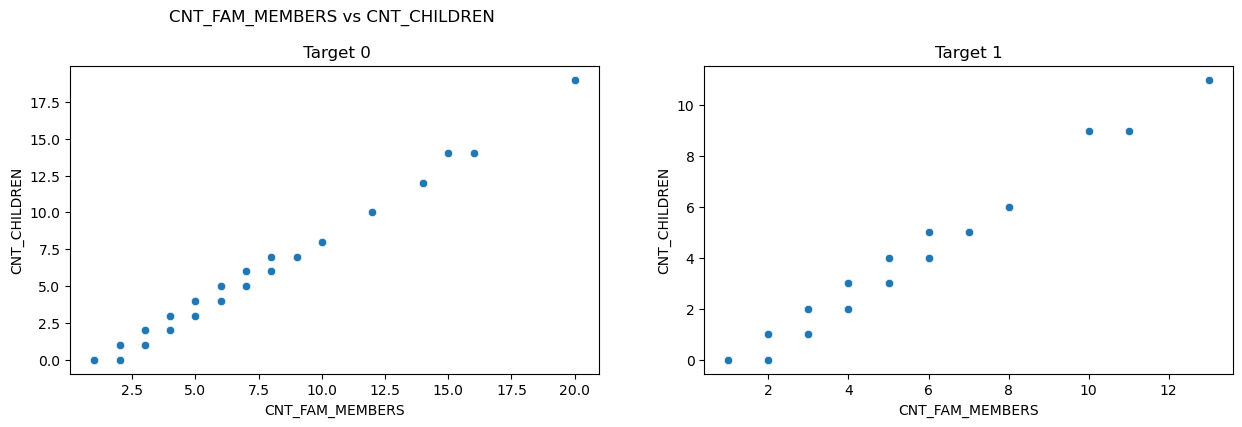

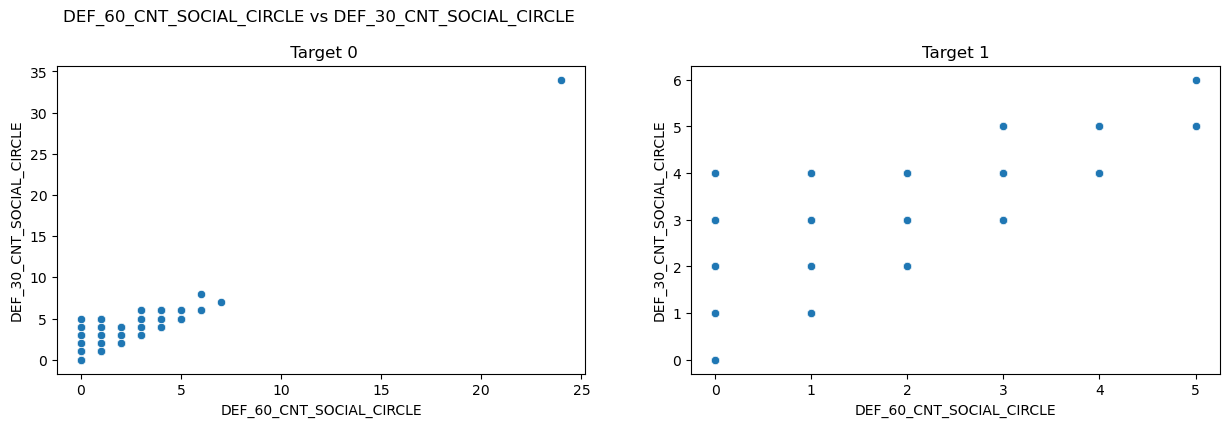

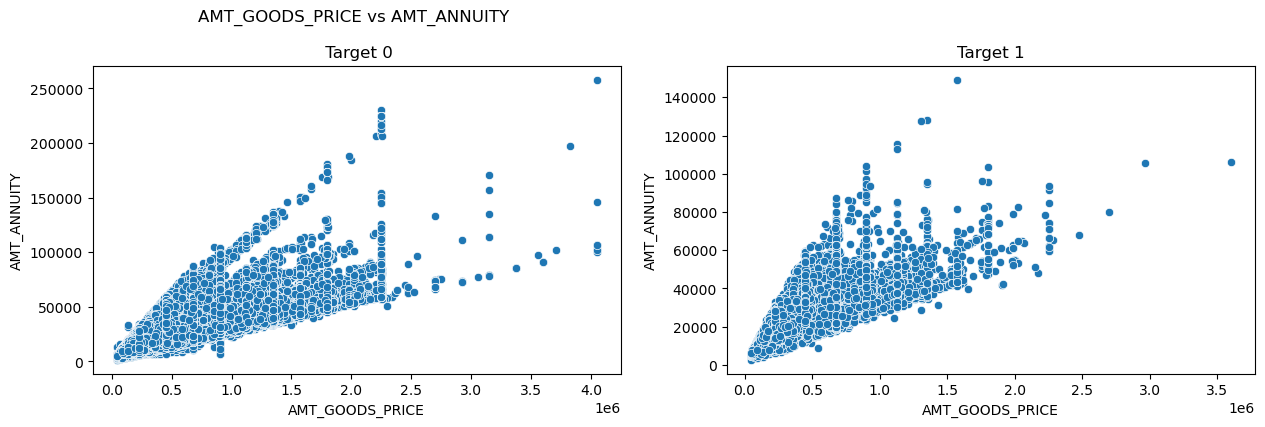

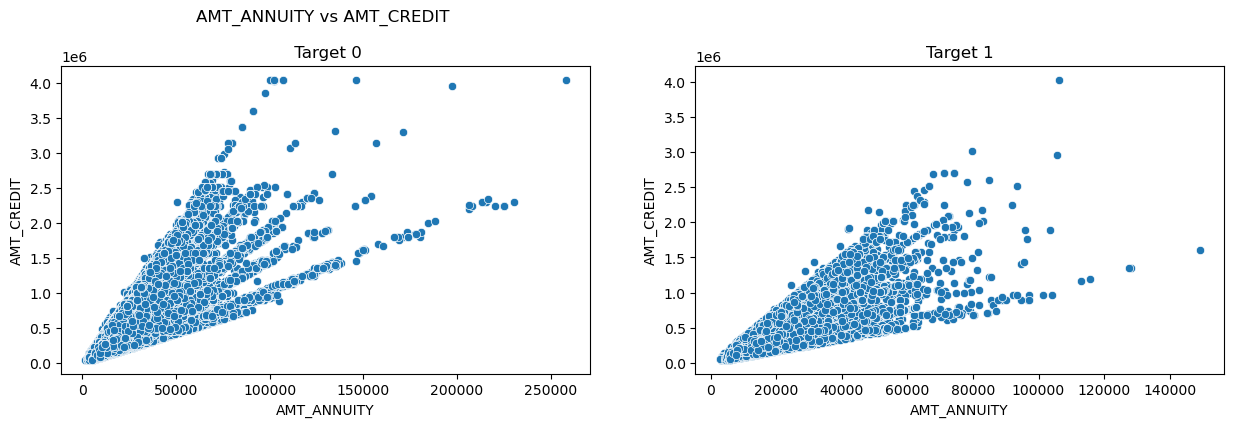

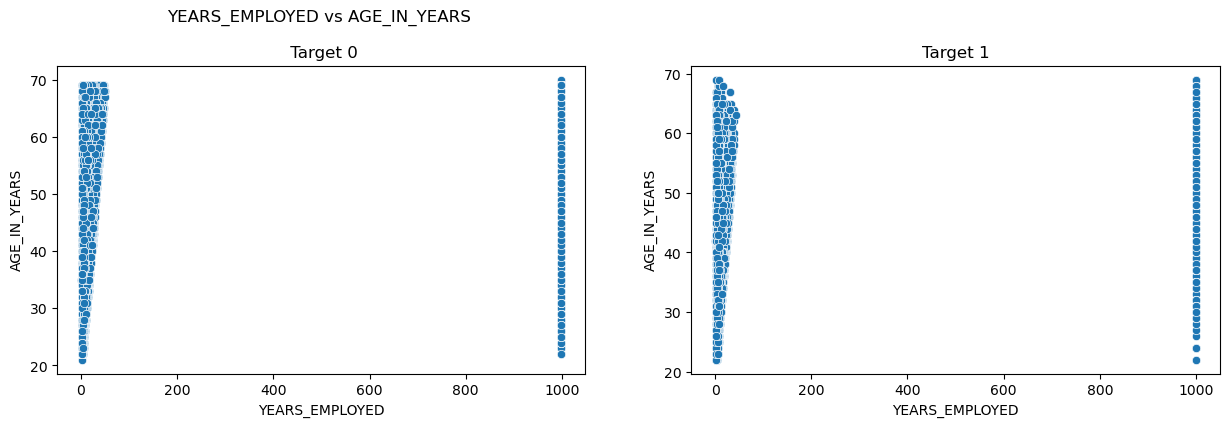

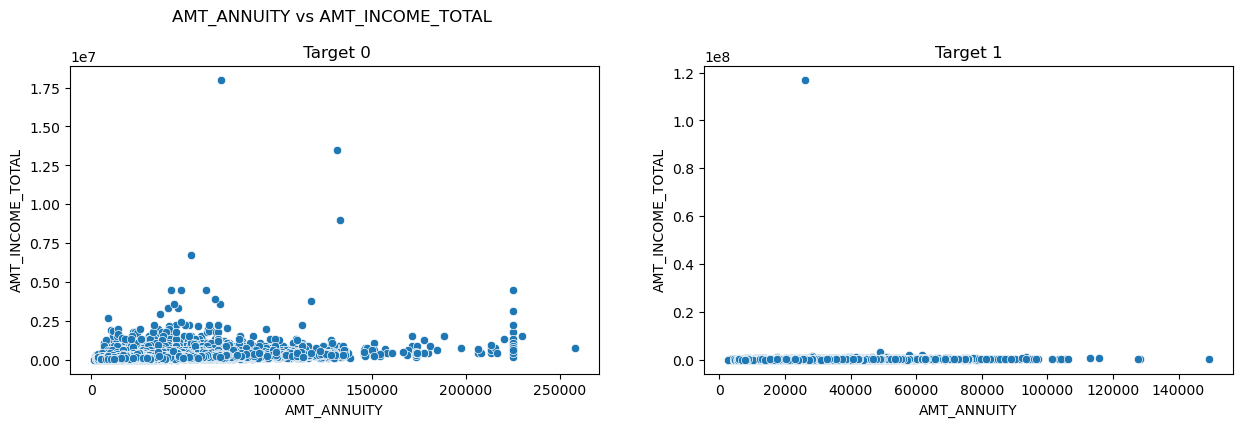

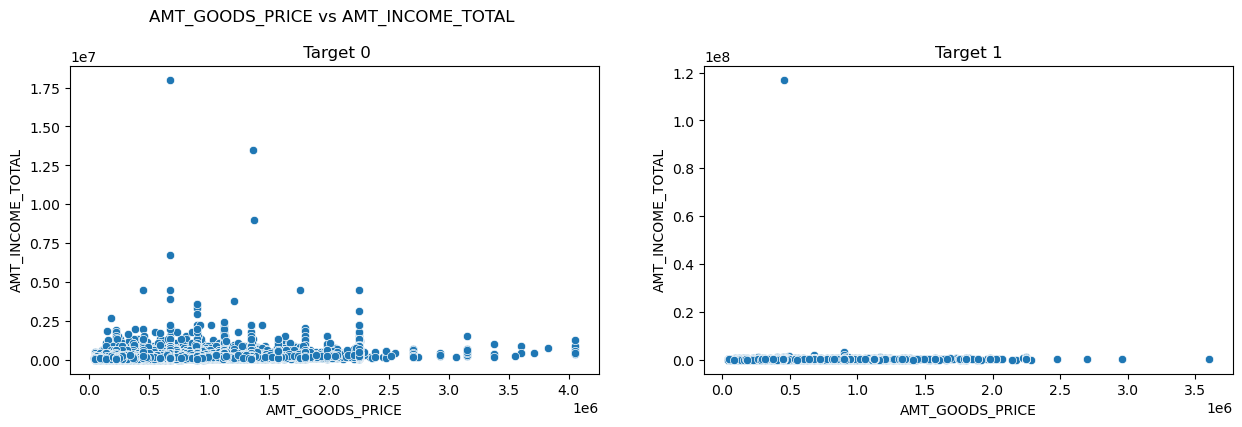

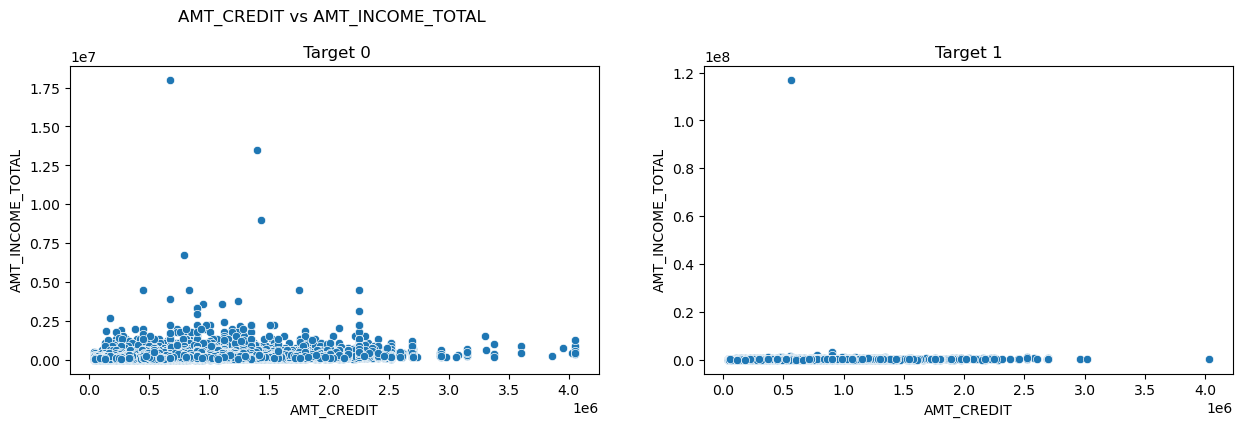

In [981]:
i=0
for i in range(10):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(x=bivVar1[i], y=bivVar2[i], data=df_cat_0, ax=ax1,)
    ax1.set_xlabel(bivVar1[i])
    ax1.set_ylabel(bivVar2[i])
    ax1.set_title(f'{bivVar1[i]} vs {bivVar2[i]} \n\n Target 0',fontsize=12)

    sns.scatterplot(x=bivVar1[i], y=bivVar2[i], data=df_cat_1, ax=ax2)
    ax2.set_xlabel(bivVar1[i])
    ax2.set_ylabel(bivVar2[i])
    ax2.set_title(f'Target 1', fontsize=12)

    plt.show()
    i=i+1



## Few notable points

1. 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' - denote the clients social surroundings with observable 30/60 DPD.
    These are definetly correlated. We can also see that its higher and steeper for Target 1, signifying thatin approval process this parameter must be strongly looked into.
2. DEF_30_CNT_SOCIAL_CIRCLE - Trend is going up. But Target 1 has lesser data and hence graph is not dence.
3. Years employed has an outlier value of 999 and this is skewing the graph
4. AMT_CREDIT and AMT_GOOD_PRICE dont seem to be increasing proportionately with AMT_INCOME for TARGET 1, thus possibly leading to default

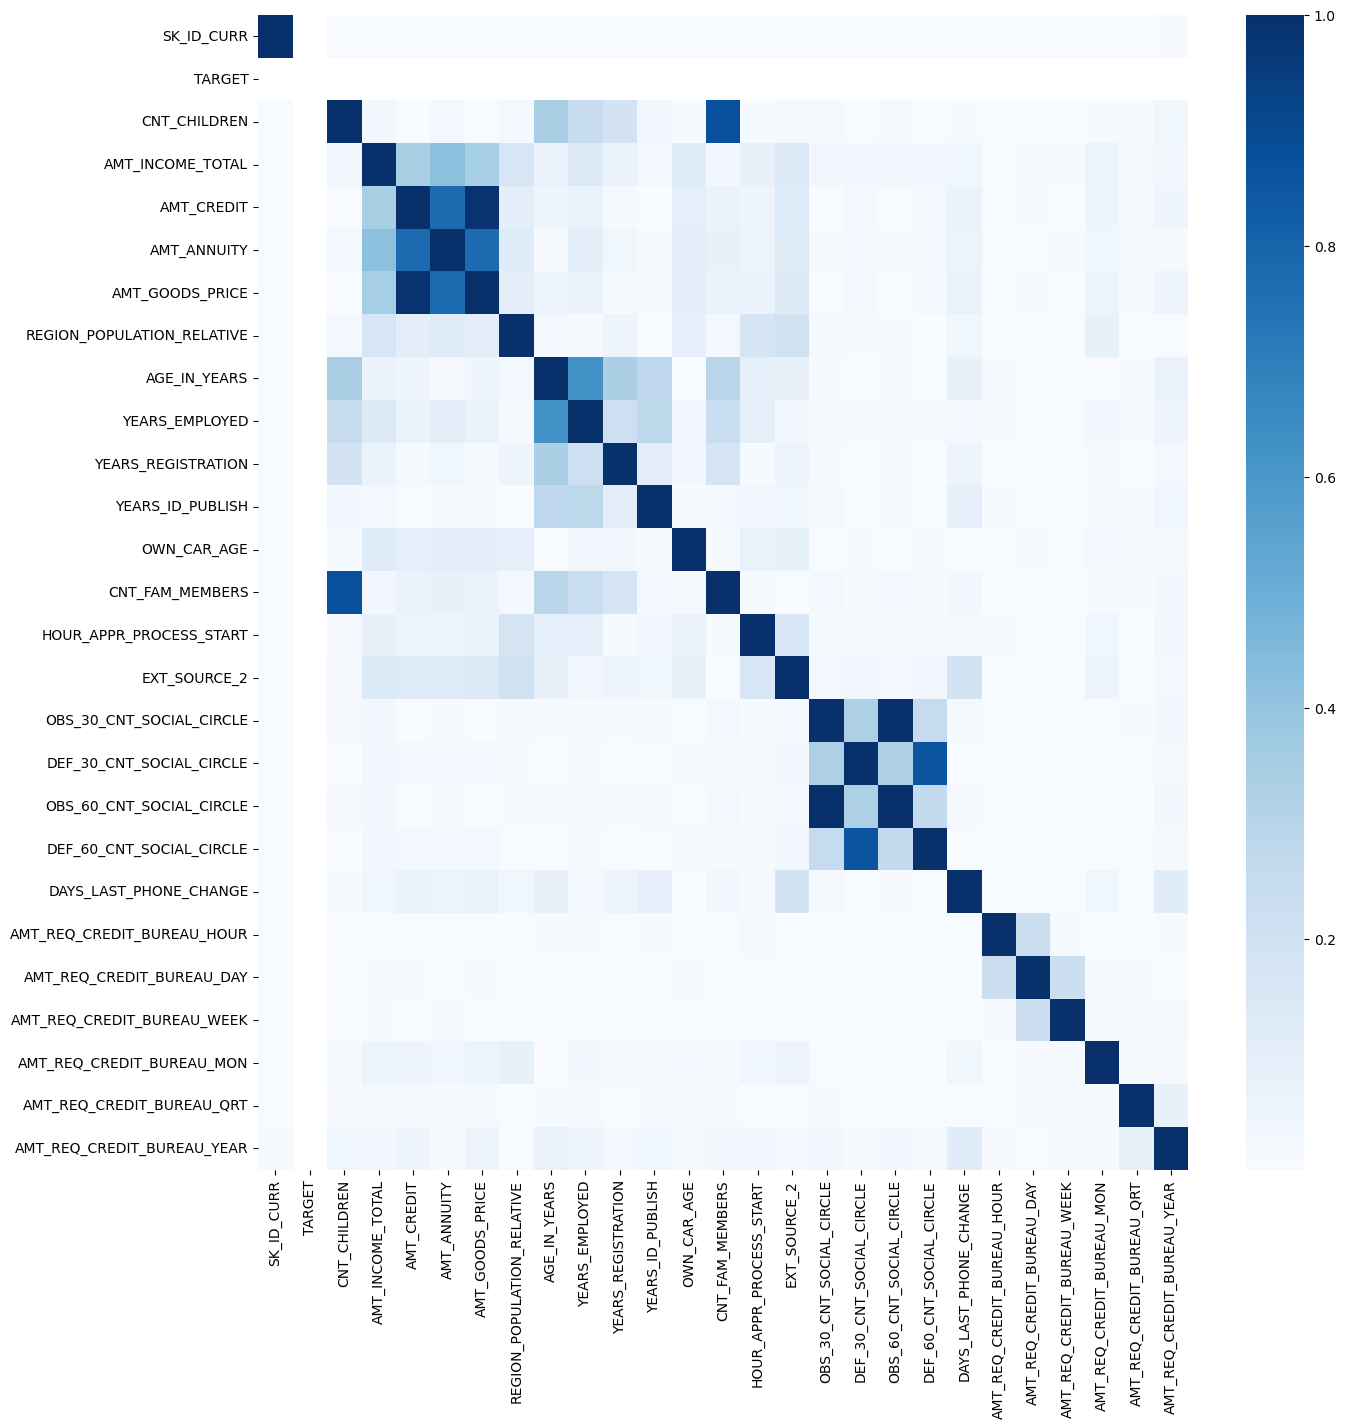

In [987]:
#checking above analysis via heatmap

#df_num_0=df_cat_0[['TARGET']==0][numvarList]
plt.figure(figsize=(15,15))
sns.heatmap(correlation_cat_0, cmap='Blues')
plt.show()

HeatMap says the same story of correlation in pictoral manner

<Figure size 1200x1000 with 0 Axes>

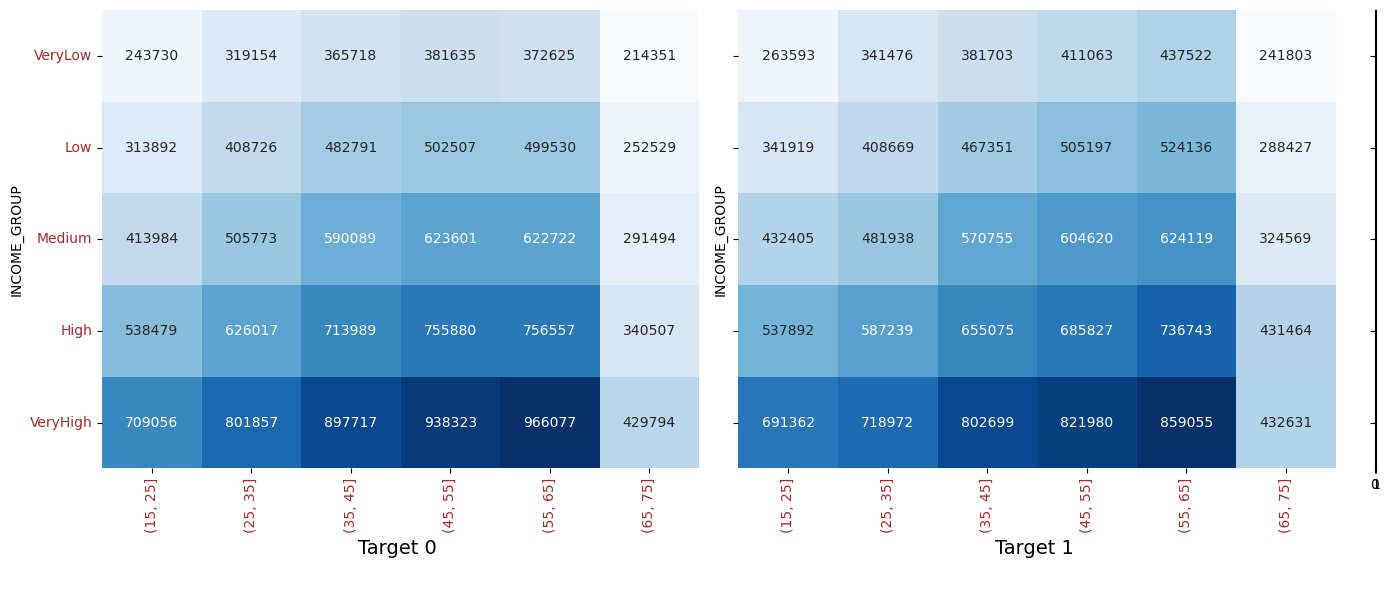

In [992]:
#Analysing relationship of AMT_CREDIT with AGE GROUP AND income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

res=pd.pivot_table(data=df_cat_0, index="INCOME_GROUP",columns="AGE_GROUP",values="AMT_CREDIT", aggfunc="mean")

c=sns.heatmap(res, annot=True,cmap='Blues', fmt='g', ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14, fontweight=7)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

res1=pd.pivot_table(data=df_cat_1, index="INCOME_GROUP",columns="AGE_GROUP",values="AMT_CREDIT", aggfunc="mean")

c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt='g', ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14, fontweight=7)
c1.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10, color="Brown")

plt.tight_layout()
plt.show()

Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book.

### Summary on Application dataframe 

## Previous Application 

### Data Loading and Inspection

In [999]:
# Reading the csv file 'previous_application.csv' using 'read_csv'
prev_df=pd.read_csv('previous_application.csv')

prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [1000]:
prev_df.shape

(1670214, 37)

In [1001]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning

### Missing Values

In [1004]:
#checking columns with missing values

prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [1005]:
#checking % of missing values

prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Handling missing values

In [1007]:
#As the DF is massive, deleting rows with Null values for AMT_ANNUITY, AMT_GOODS_PRICE. We need these columns for analysis as seen in application data frame and hence not deleting the columns.

prev_df = prev_df.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_df = prev_df.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [1008]:
#checking columns with >20% Null values

print(prev_df.columns[(prev_df.isnull().sum() * 100/prev_df.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [1009]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [1010]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']=="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

NFLAG_INSURED_ON_APPROVAL
0.0    624021
1.0    331064
Name: count, dtype: int64

In [1011]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DRAWING'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [1012]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DUE'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [1013]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE_1ST_VERSION'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [1014]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [1015]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_TERMINATION'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [1016]:
prev_df[prev_df['NAME_CONTRACT_STATUS']!="Approved"].shape

(252382, 37)

In [1017]:
prev_df[prev_df['DAYS_LAST_DUE'].isna()].shape

(291235, 37)

All columns mentioned above are Nan for non approved case which is correct representation. Without a loan, applicant can not draw and applicant will not have Insurance too. However, we will drop all rows as we will not do any analysis with these. 

In [1019]:
#Dropping all >20 null value columns

dropcol=prev_df.columns[(prev_df.isnull().sum()*100/prev_df.shape[0]) > 20]
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1246320, 26)

In [1020]:
#checking columns with null values

prev_df.columns[(prev_df.isnull().sum()>0)]

Index([], dtype='object')

In [1021]:
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.246320e+06     1.246320e+06             1.246320e+06   
mean   2.492727e+05     2.326240e+05             1.258250e+01   
std    3.465843e+05     3.186729e+05             3.326113e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.157450e+04     5.220000e+04             1.000000e+01   
50%    1.161675e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.246320e+06   1.246320e+06      1.246320e+06  1.246320e+06  
mean             9.978914e-01  -1.021855e+03      4.056201e+02  1.671954e+01  
std              4.587116e-02   7.864511e+02      8.246103e+03  1.448712e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.534000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -7.660000e+02      2.700000e+01  1.200000e+01  
75%              1.000000e+00  -3.850000e+02      1.460000e+02  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [1022]:
#deleting some additional numerical var columns as we do not intend to use them for analysis and they dont seem relevant too

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1246320, 22)

In [1023]:
#Analysing values of object variable
for i in prev_df.columns:
    if prev_df[i].dtypes=="object":
        print(prev_df[i].value_counts(normalize=True, dropna=False))
        print('\n\n')

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64



WEEKDAY_APPR_PROCESS_START
SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: proportion, dtype: float64



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64



NAME_CASH_LOAN_PURPOSE
XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                           

### Deleting columns not needed for analysis

WEEKDAY_APPR_PROCESS_START - Not relevant, 
NAME_PRODUCT_TYPE - 55% XNA values, 
NAME_CASH_LOAN_PURPOSE - 90% NNA / XAP values, 
NAME_GOODS_CATEGORY - HIGH XNA values, 
NAME_PAYMENT_TYPE - 19% XAP values, 
CODE_REJECT_REASON - 80% XAP values.

In [1026]:
#deleting columns mentioned above
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON']
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1246320, 16)

## Univariate Analysis

### Categorial Nominal

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64


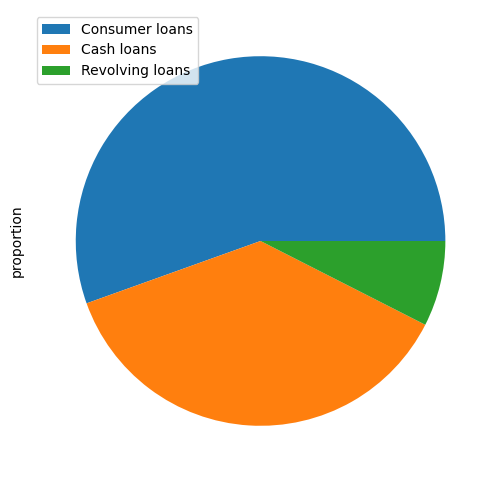



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64


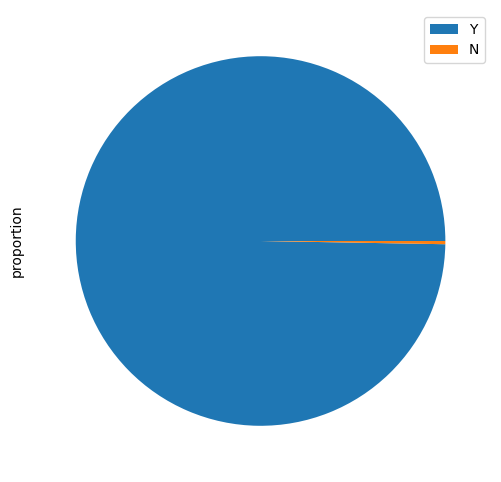



NAME_CONTRACT_STATUS
Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: proportion, dtype: float64


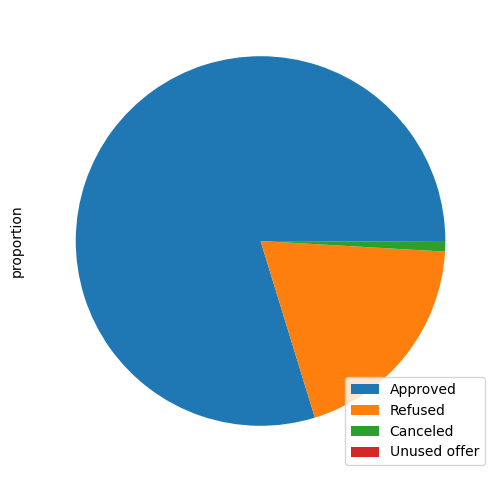



NAME_CLIENT_TYPE
Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: proportion, dtype: float64


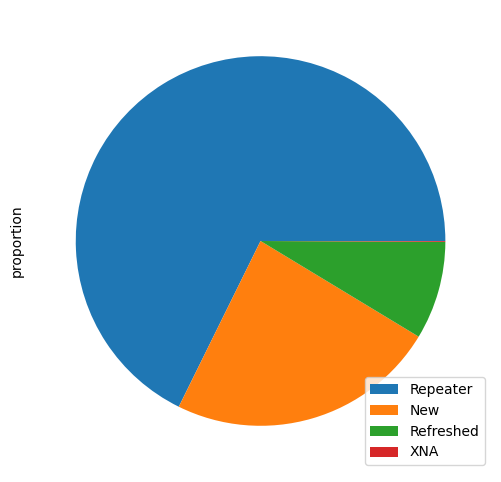



NAME_PORTFOLIO
POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: proportion, dtype: float64


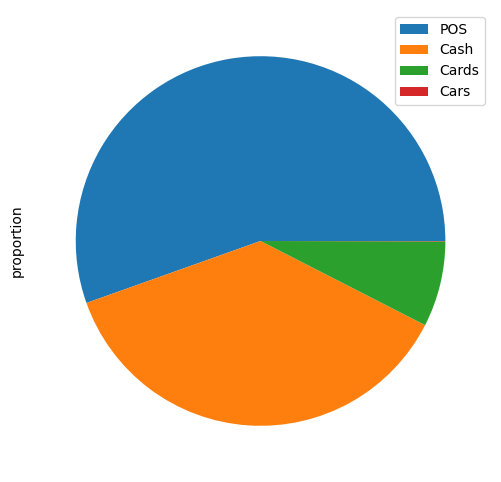



CHANNEL_TYPE
Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: proportion, dtype: float64


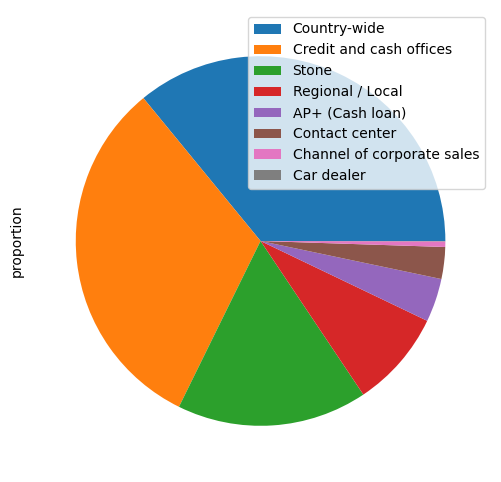



NAME_SELLER_INDUSTRY
XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: proportion, dtype: float64


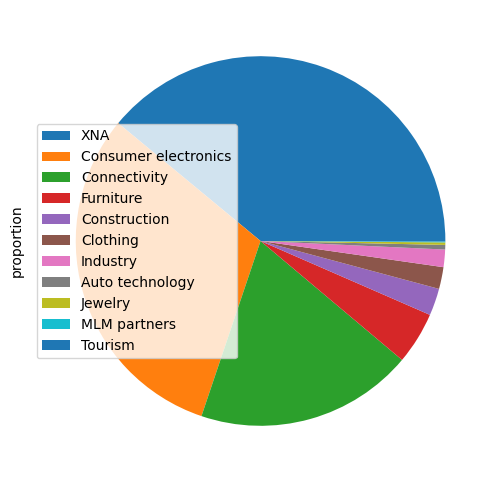



NAME_YIELD_GROUP
middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: proportion, dtype: float64


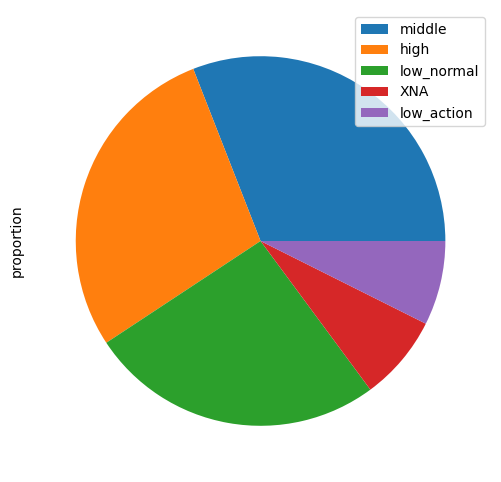



PRODUCT_COMBINATION
POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: proportion, dtype: float64


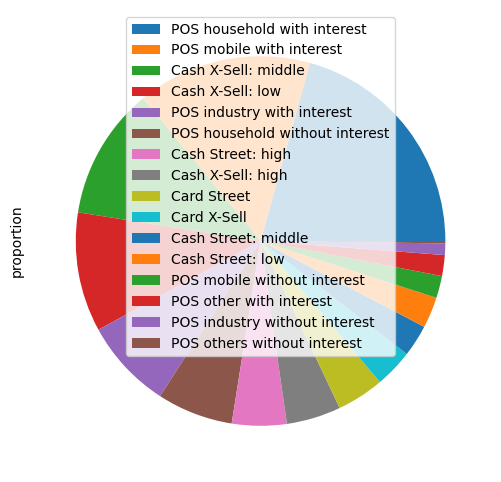

In [1029]:
#checking all object types variables and their values
for i in prev_df.columns:
    if prev_df[i].dtypes=="object":
        print(prev_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        prev_df[i].value_counts(normalize=True, dropna= False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print('\n')

### Few notable points

1. This dataframe has a different type of loan called Consumer Loan, which was not there      in Application dataframe. 55% of loans are consumer loans. 37% cash loans and rest         revolving.
2. Approved loans are 79% and refused, cancelled, unused - rest. **IMALANCE IN DATA**
3. 67% are repeaters. NAME_CLIENT_TYPE also has some null values showing as XNA
4. 55% of the applicants have taken loan for POS purchase.
5. Name seller industry has 37% XNA values, Consumer electronics is next highest category     at 30%                                   

### Numerical Variable

In [1033]:
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  
count  1.246320e+06     1.246320e+06  1.246320e+06  
mean   2.492727e+05     2.326240e+05  1.671954e+01  
std    3.465843e+05     3.186729e+05  1.448712e+01  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    5.157450e+04     5.220000e+04  6.000000e+00  
50%    1.161675e+05     1.125000e+05  1.200000e+01  
75%    2.700000e+05     2.475000e+05  2.400000e+01  
max    4.509688e+06     5.850000e+06  8.400000e+01

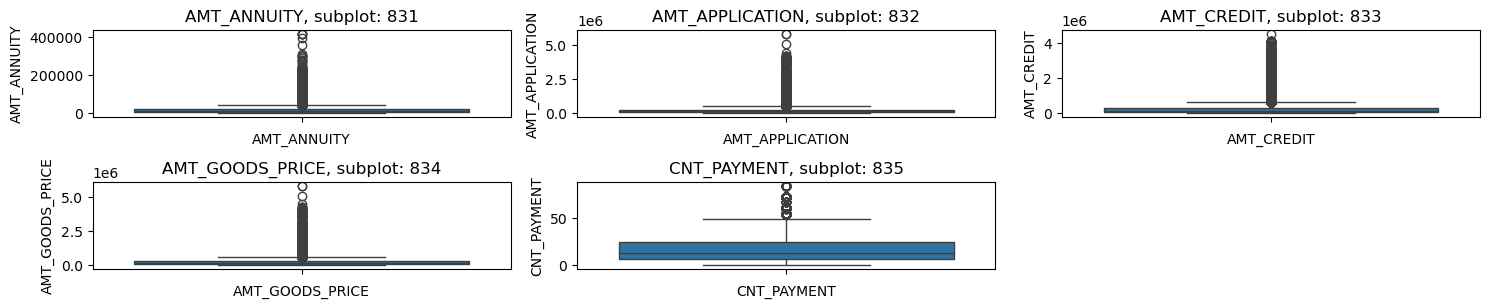

In [1034]:
# float data
a = 8 #number of rows
b = 3 #number of columns
c = 1 #initialize plot counter

fig = plt.figure(figsize=(15, 12))

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32":
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(prev_df[i])
        c = c + 1

fig.tight_layout()
plt.show()
    

Continuous Variables seem to have high percentage of outliers. Checking distribution

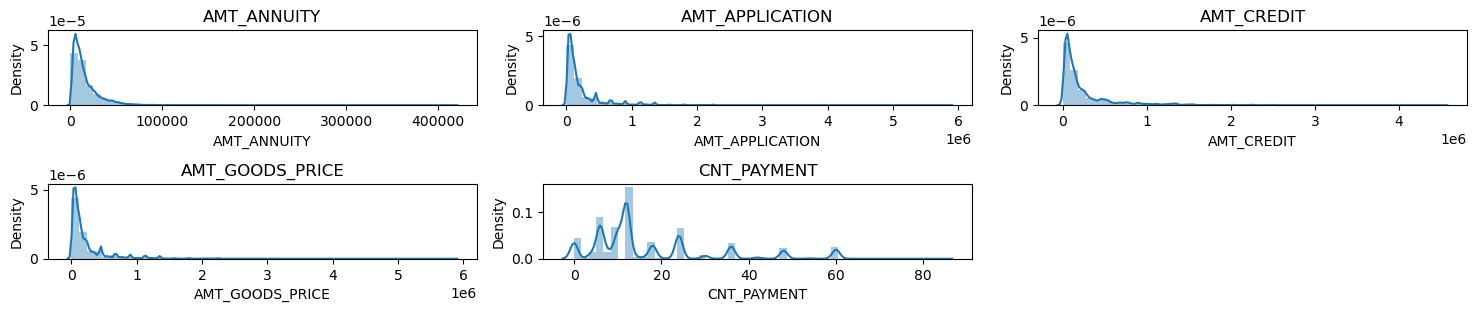

In [1036]:
# float data
a = 8 #number of rows
b = 3 #number of columns
c = 1 #initialize plot counter

fig = plt.figure(figsize=(15, 12))

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32":
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=prev_df[i])
        c = c + 1

fig.tight_layout()
plt.show()
    

### Few notable points

Continuous Variables seem to have high percentage of outliers. Box plot and distribution both signify the same.

### Outlier & Possible Treatment

In [1041]:
#using zscore to find out Outliers(>97%)

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32":
        print(i, ":", end=" ")
        print(prev_df.iloc[np.where(np.abs(ss.zscore(prev_df[i])>2))].shape, end=" ")
        print("percentage of outlier rows:", round((prev_df.iloc[np.where(np.abs(ss.zscore(prev_df[i])>2))].shape[0]/prev_df.shape[0]*100),2))

AMT_ANNUITY : (61959, 16) percentage of outlier rows: 4.97
AMT_APPLICATION : (75698, 16) percentage of outlier rows: 6.07
AMT_CREDIT : (69957, 16) percentage of outlier rows: 5.61
AMT_GOODS_PRICE : (75714, 16) percentage of outlier rows: 6.08
CNT_PAYMENT : (103224, 16) percentage of outlier rows: 8.28


These rows can be deleted considering the size of DF. Not doing so,as it is not in scope of the project

### Bivariate Analysis

#### Categorical and Categorical Variable

In [1045]:
#checking the dataframe
prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0          17145.0                           Y   
1    679671.0         607500.0                           Y   
2    136444.5         112500.0                           Y   
3    470790.0         450000.0                           Y   
4    404055.0         337500.0                           Y   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved         Repeater            POS   
1             Approved         Repeater           Cash   
2             Approved         Repeater           Cash   
3             Approved         Repeater           Cash   
4              Refused         Repeater           Cash   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide         Connectivity         12.0           middle   
1           Contact center                  XNA         36.0       low_action   
2  Credit and cash offices                  XNA         12.0             high   
3  Credit and cash offices                  XNA         12.0           middle   
4  Credit and cash offices                  XNA         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

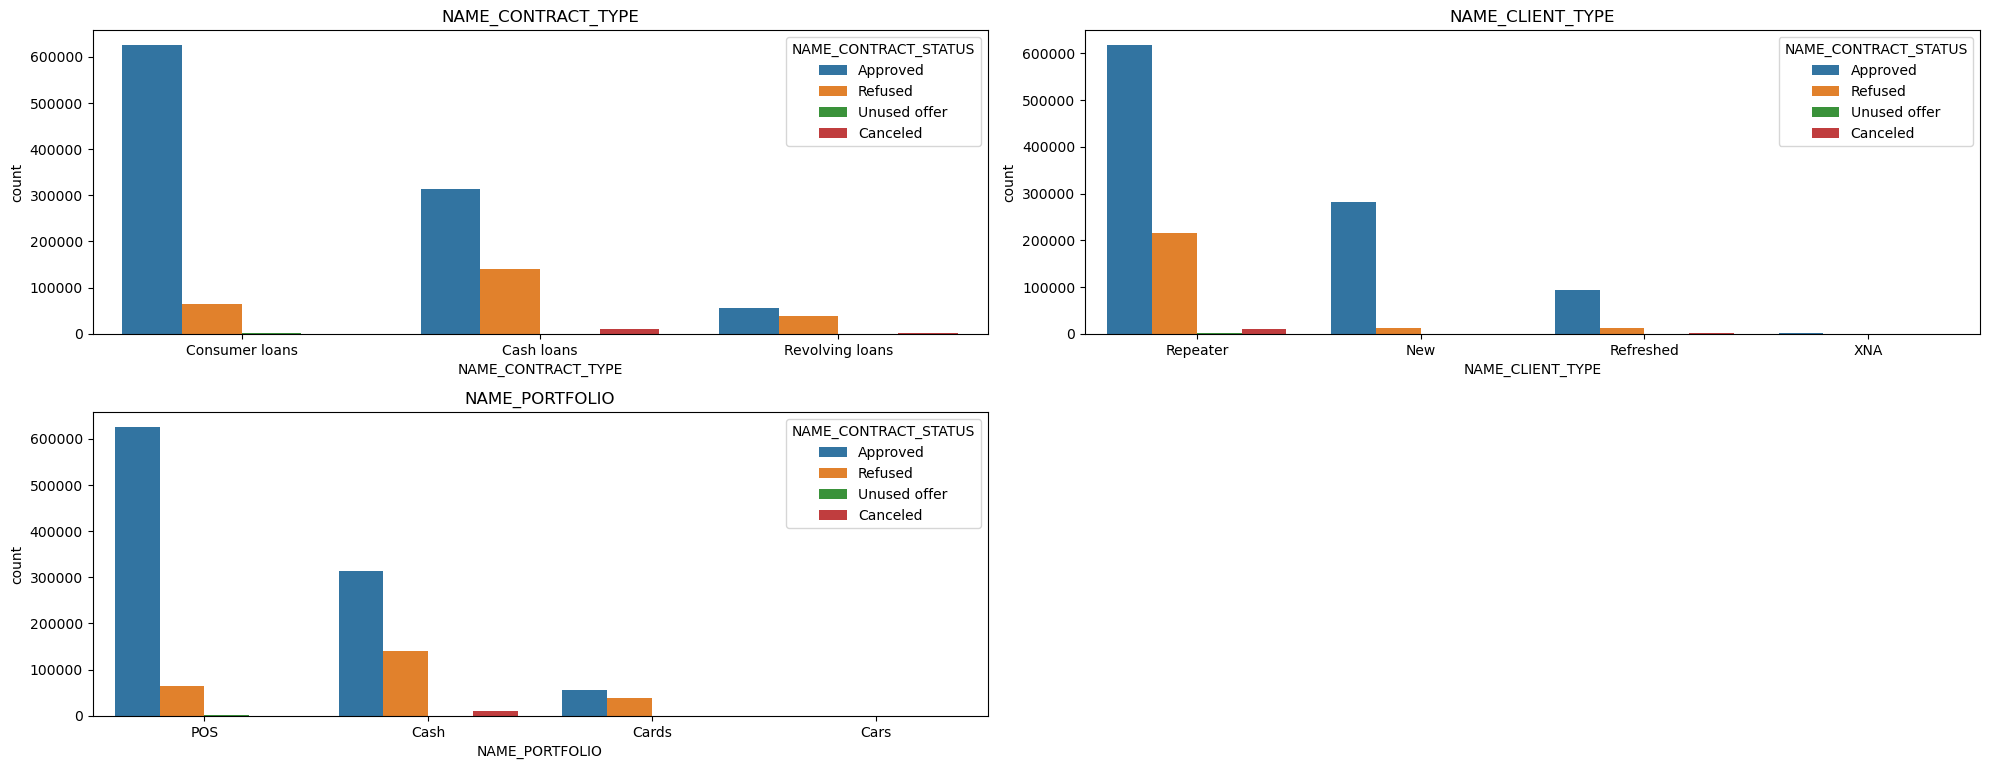

In [1046]:
cols= ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']

a = 4 # number of rows
b = 2 # number of columns
c = 1 # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=prev_df, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()

### Few notable points

1. In approved category, consumer loan has largest no of applicants.
2. There seem to be no cancelled loans in cash loan category than consumer loan.
3. More cash loans have been refused than consumer loans.
4. The bank has morerepeaters in all approved, refused, unused, cancelled categories.
5. POS transactions seem to be consumer loans and similar to point 2 - more cash loans       have been refused than POS.

## Top Correlations

In [1053]:
df_corr_prev=prev_df.drop(axis=1, columns=['SK_ID_CURR','SK_ID_PREV'] )
numeric_df = df_corr_prev.select_dtypes(include=[np.number])
correlation = numeric_df.corr().abs()

In [1054]:

corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'], inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev


Column1          Column2  Correlation
16  AMT_GOODS_PRICE  AMT_APPLICATION     0.999883
17  AMT_GOODS_PRICE       AMT_CREDIT     0.993028
11       AMT_CREDIT  AMT_APPLICATION     0.992965
15  AMT_GOODS_PRICE      AMT_ANNUITY     0.820895
5   AMT_APPLICATION      AMT_ANNUITY     0.820831
10       AMT_CREDIT      AMT_ANNUITY     0.814884
22      CNT_PAYMENT       AMT_CREDIT     0.700323
21      CNT_PAYMENT  AMT_APPLICATION     0.672276
23      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129
20      CNT_PAYMENT      AMT_ANNUITY     0.401020

<Figure size 2000x800 with 0 Axes>

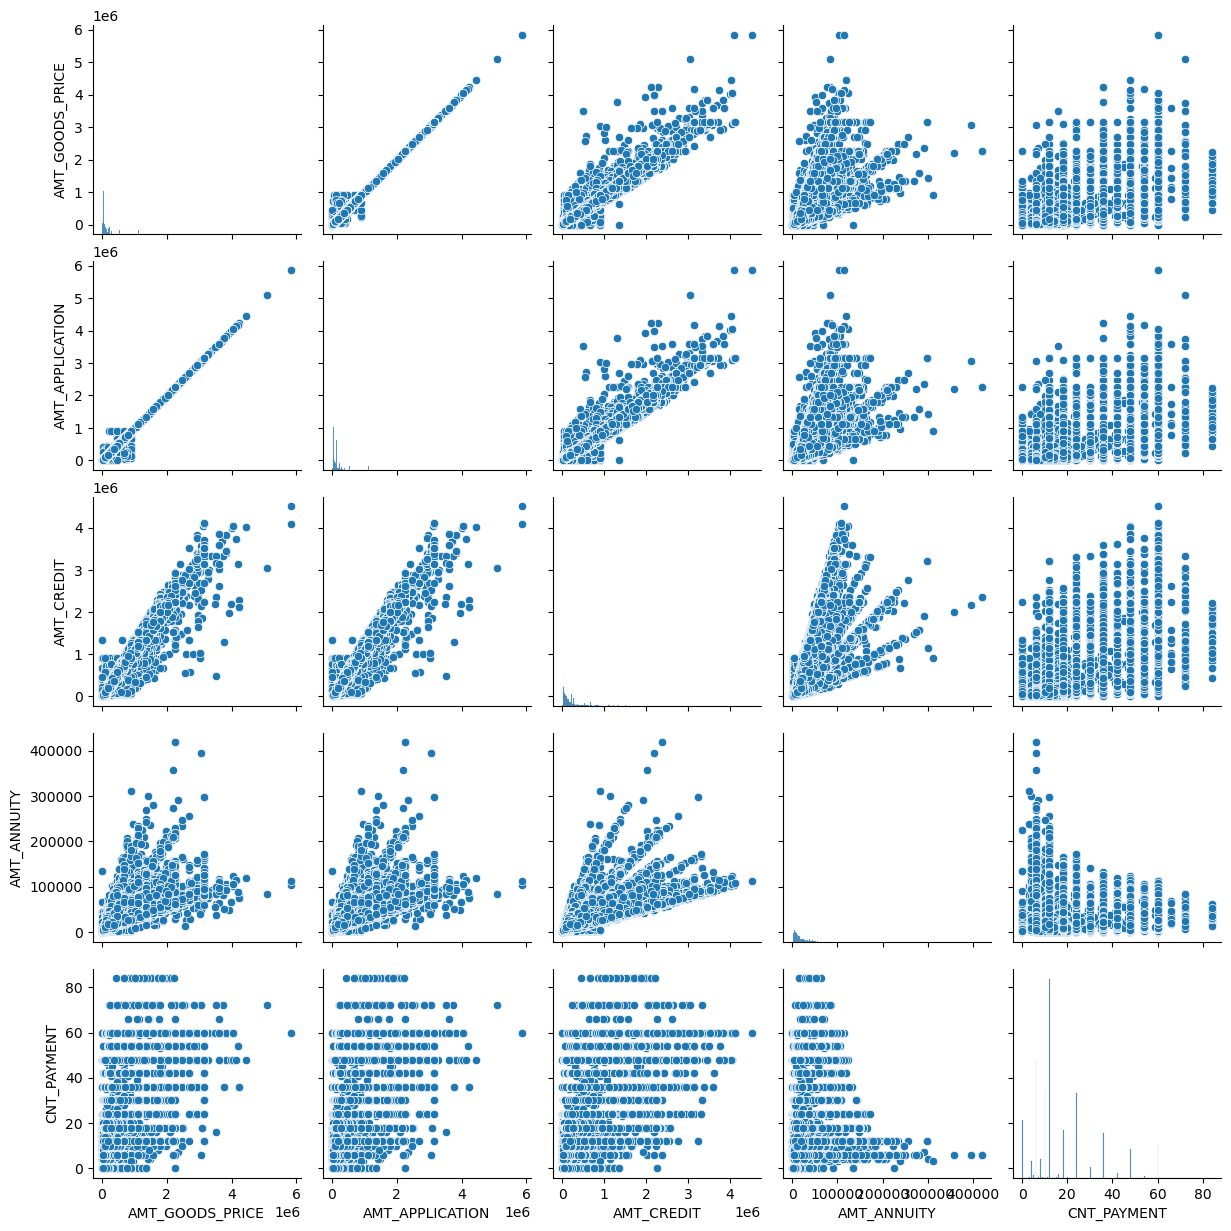

In [1055]:
plt.figure(figsize=[20,8])
sns.pairplot(prev_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()

### Few notable points 

1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation.        Higher the value of good purchased more there will be need of loan and surely all         these will correlate.
2. Simlarly, AMT_CREDIT to AMT_GOOD_PRICE also has correlation is high.
3. Columns CNT_Payment ideally should have had a high correlation with AMT_CREDIT, ie        higher credit, more the term of loan. But nosuch correlation can be seen.

## Multivariate Analysis

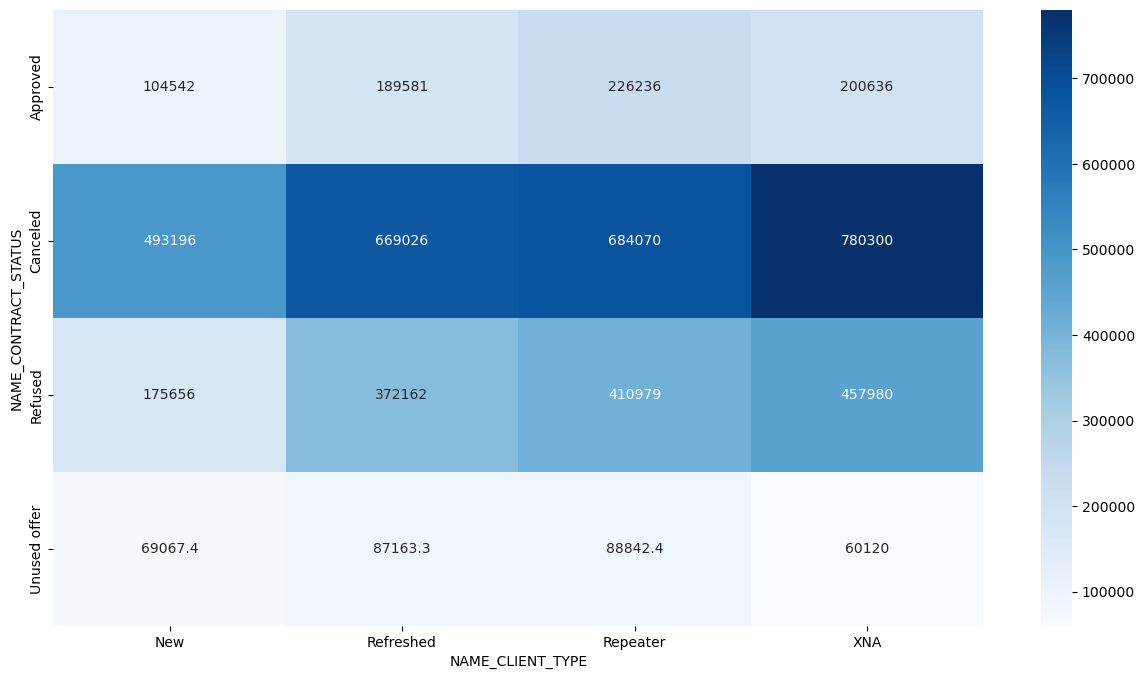

In [1059]:
#checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=prev_df, index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE', values='AMT_APPLICATION') 
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")
plt.show()

### Few notable points 

1. Unused offer application amount is low.
2. Cancelled application amount is high. The bank may be refusing these possibly as the debt liability ratio of consumer must be going high due to the high amount and thus credit default risk.
3. Repreater's application amount is highest than the New customrts. This may indicate that the back has more condusive policies/rate of interest etc for repeat applicants

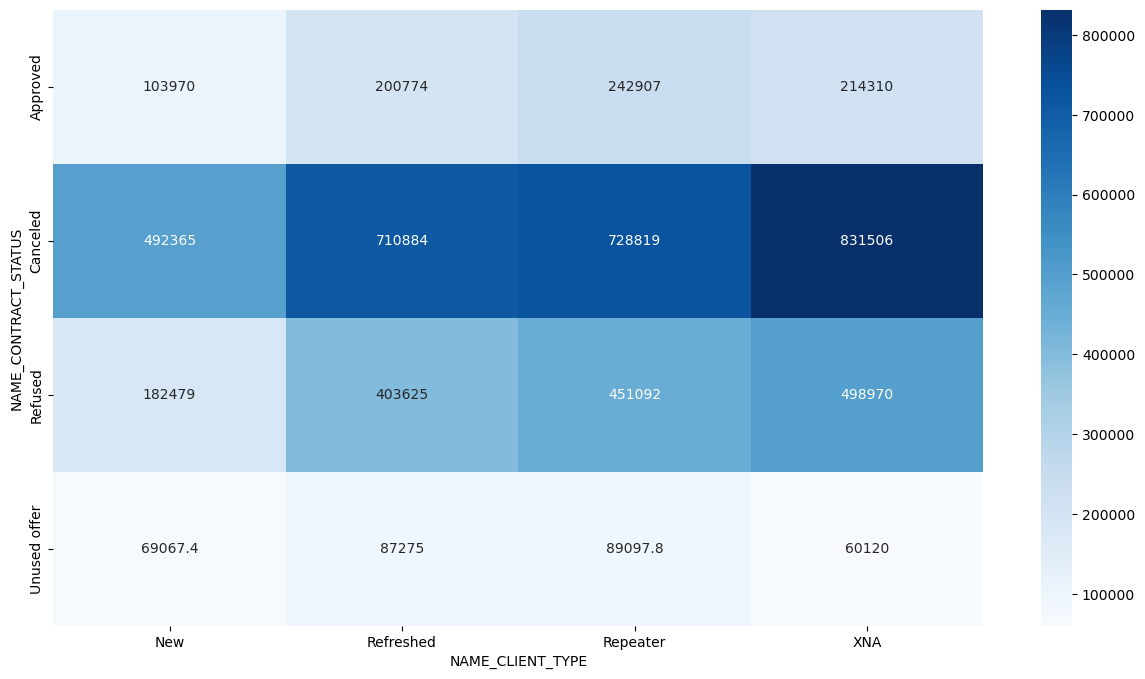

In [1062]:
#checking contract status vs name client type aggregating over AMT_CREDIT

res=pd.pivot_table(data=prev_df, index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE', values='AMT_CREDIT') 
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")
plt.show()

### Few notable points

1. Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using.
2. Unable to understand why cancelled and refused there should be any credit amount?

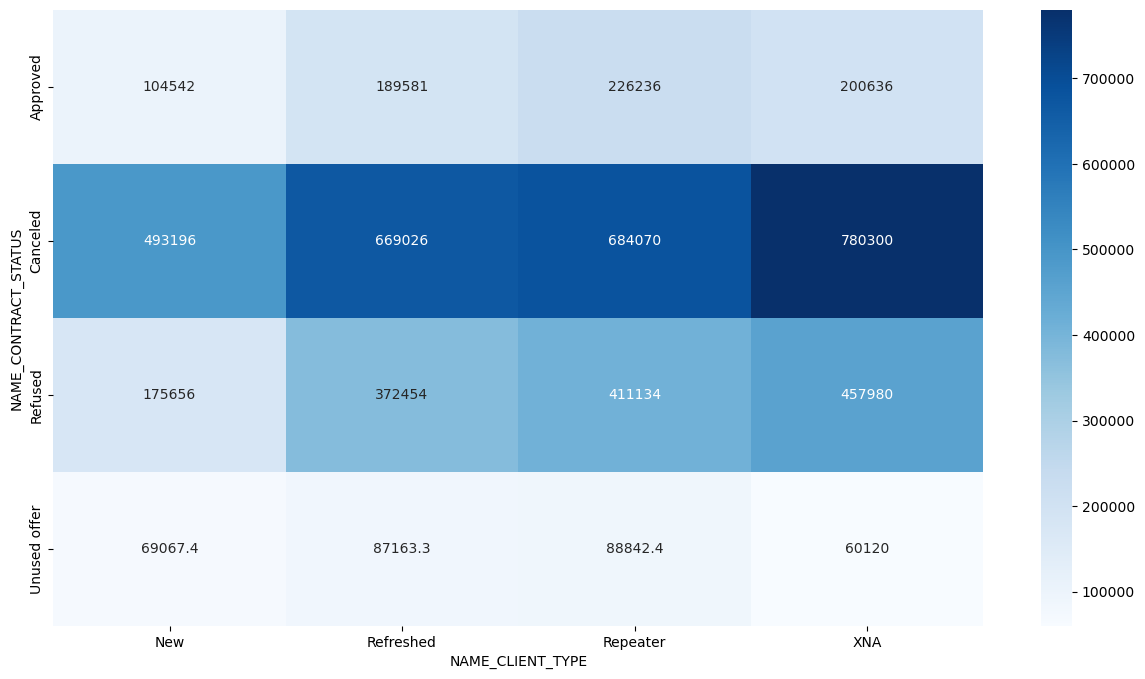

In [1065]:
#checking contract status vs name client type aggregating over AMOUNT GOOD PRICE
res=pd.pivot_table(data=prev_df, index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE', values='AMT_GOODS_PRICE') 
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")
plt.show()

### Few notable points

1. All cancelled and refused cases have higher value of goods than other categories

## Merged Data frames Analysis

In [1069]:
#checking if any duplicate values in SK_ID_PREV
duplicate = prev_df[prev_df.duplicated(subset='SK_ID_CURR')]
duplicate.shape

(908809, 16)

SK_ID_CURR has duplicates in prev_df. Indicating that app_df and prev_df willhave a one to many realtionship.

## Merging two dataframes, Data Loading and Inspection

In [1072]:
df = pd.merge(app_df,prev_df, how='left', on="SK_ID_CURR")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0          26.0             2.0                10.0               6.0   
1          46.0             4.0                 4.0               1.0   
2          46.0             4.0                 4.0               1.0   
3          46.0             4.0                 4.0               1.0   
4          53.0             1.0                12.0               7.0   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          NaN        Laborers              1.0                     2   
1          NaN      Core staff              2.0                     1   
2          NaN      Core staff              2.0                     1   
3          NaN      Core staff              2.0                     1   
4         26.0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3   

In [1073]:
df.shape

(1078854, 64)

### Analysis 

In [1075]:
# plotting name contract status to check % of default, ie Target 0 and 1

contract = df['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target 0 and 1 for : Approved
TARGET
0    0.924108
1    0.075892
Name: proportion, dtype: float64


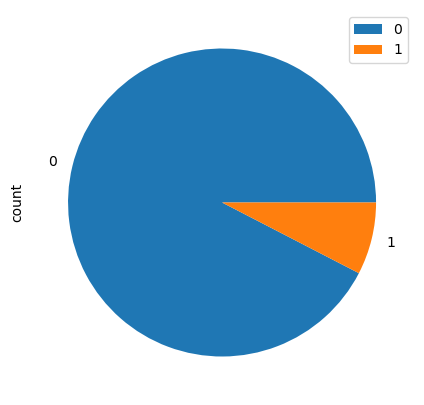

Target 0 and 1 for : Refused
TARGET
0    0.884182
1    0.115818
Name: proportion, dtype: float64


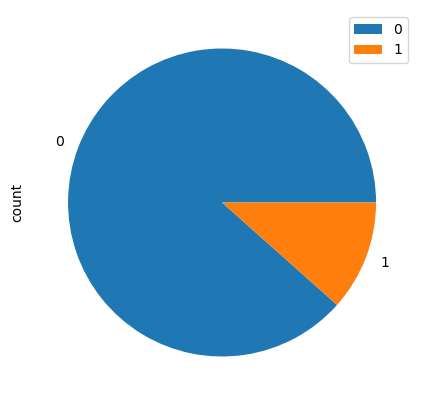

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Target 0 and 1 for : nan
Series([], Name: proportion, dtype: float64)


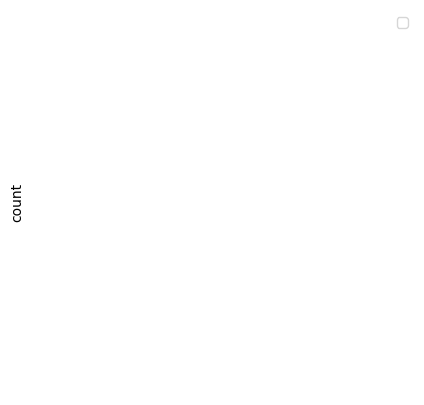

Target 0 and 1 for : Canceled
TARGET
0    0.917609
1    0.082391
Name: proportion, dtype: float64


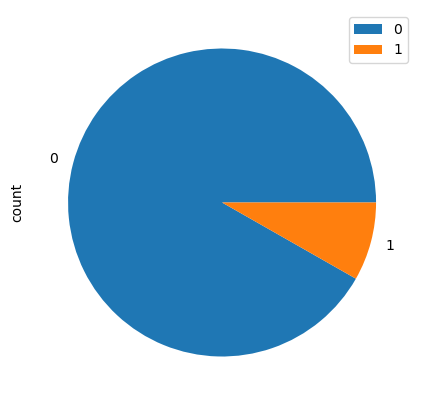

Target 0 and 1 for : Unused offer
TARGET
0    0.895141
1    0.104859
Name: proportion, dtype: float64


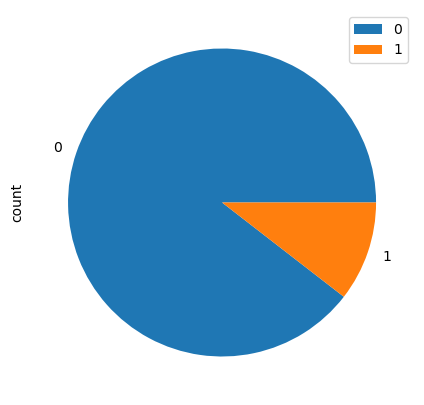

In [1076]:
for i in contract:
    print("Target 0 and 1 for :",i)
    plt.figure(figsize=[8,5])
    print(df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()

### Few notable points

1. 7.5% of Approved loans have defaults
2. Previous applications with Refused, Cancelled, Unused loans also have default which is matter of concern.
   This indicates that the financialcompany had Refused/cancelled previous application, but has approved the current and is facing default on these loans.

In [1079]:
# number of defaults in approved cases

approvedDefault=df[(df['NAME_CONTRACT_STATUS']=="Approved") & (df['TARGET']==1)]
approvedDefault.shape

(64400, 64)

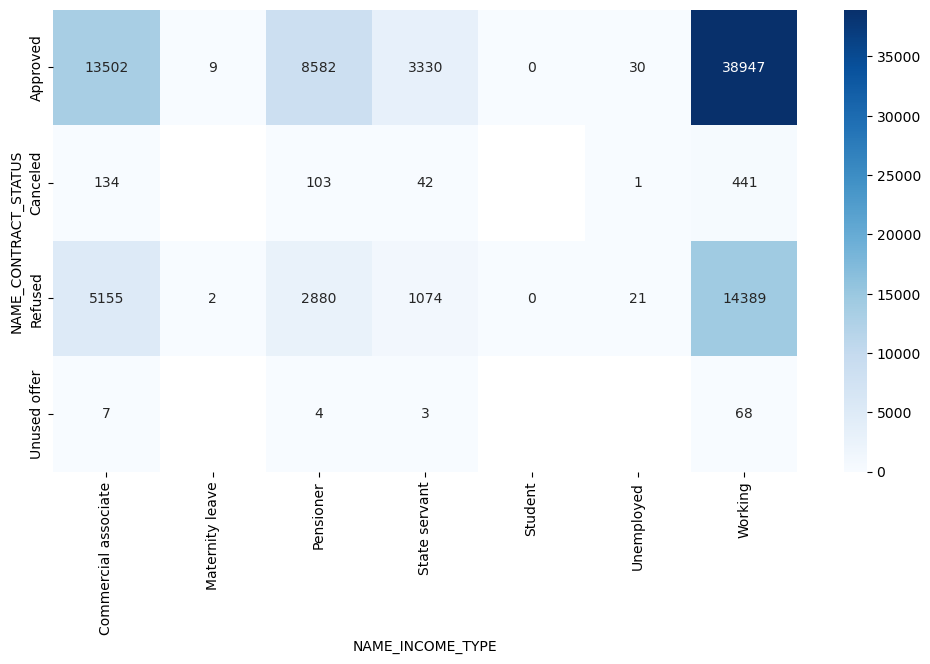

In [1080]:
# checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE", aggregating on Target

res=pd.pivot_table(data=df, index='NAME_CONTRACT_STATUS', columns='NAME_INCOME_TYPE', values='TARGET',aggfunc='sum') 
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")
plt.show()

### Few notable points

1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Working applicant with Approved status have defaulted in highest numbers.
3. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.
   This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.
4. 14,389 applicants of working class were REFUSED earlier and now have defaulted

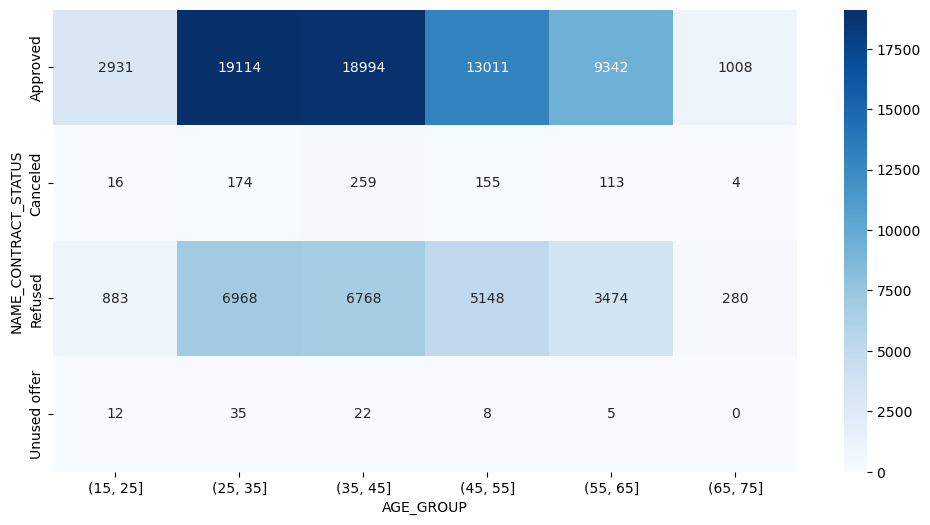

In [1083]:
# checking "NAME_CONTRACT_STATUS","AGE_GROUP", aggregating on Target

res=pd.pivot_table(data=df, index='NAME_CONTRACT_STATUS', columns='AGE_GROUP', values ='TARGET', aggfunc="sum") 
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")
plt.show()

### Few notable points

1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Approved loans of age group 25-35 and 35-45 have higher defaults.
3. Refused, cancelled, loans in previous application have defaulted in current.

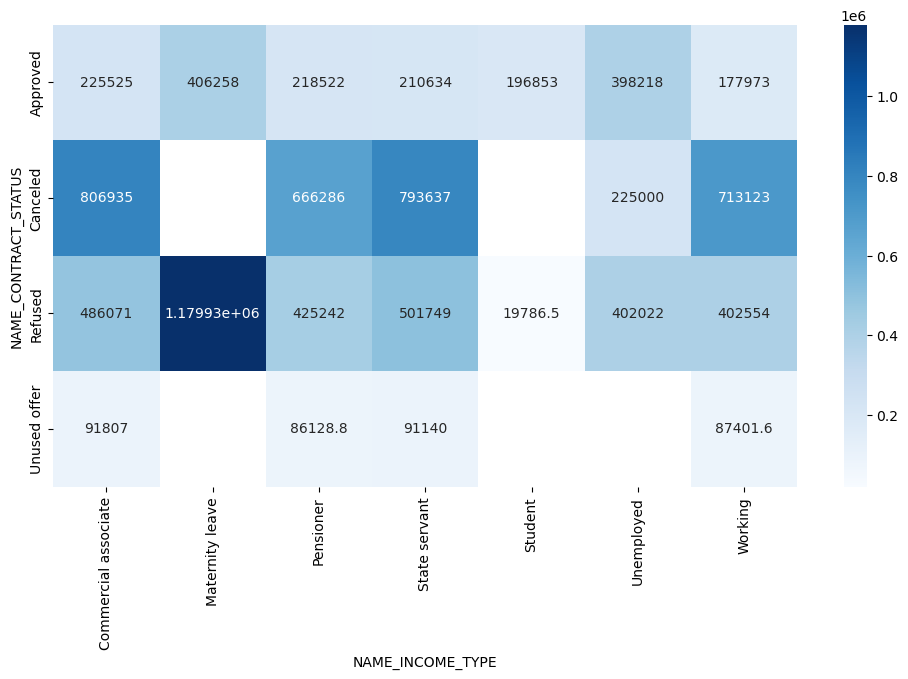

In [1089]:
# checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=df, index='NAME_CONTRACT_STATUS', columns='NAME_INCOME_TYPE', values='AMT_CREDIT_y') 
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True, cmap='Blues', fmt="g")
plt.show()

### Few notable points

1. Higher credot offered to unemployed, maternity leave is a notable factor.
2. Unused offers have smaller credit values and possibly the reason why applicant is not using them.

In [1097]:
cols=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE','OWN_CAR_flag','OWN_REALTY_flag']

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')

INCOME_GROUP
Medium      0.291770
High        0.261304
Low         0.214581
VeryHigh    0.137997
VeryLow     0.094348
Name: proportion, dtype: float64


AGE_GROUP
(25, 35]    0.296801
(35, 45]    0.294938
(45, 55]    0.202034
(55, 65]    0.145062
(15, 25]    0.045512
(65, 75]    0.015652
Name: proportion, dtype: float64


CODE_GENDER
F    0.59222
M    0.40778
Name: proportion, dtype: float64


NAME_INCOME_TYPE
Working                 0.604767
Commercial associate    0.209658
Pensioner               0.133261
State servant           0.051708
Unemployed              0.000466
Maternity leave         0.000140
Name: proportion, dtype: float64


OCCUPATION_TYPE
Laborers                 0.314332
Sales staff              0.168312
Drivers                  0.111941
Core staff               0.090577
Managers                 0.070796
Security staff           0.038783
High skill tech staff    0.038361
Cooking staff            0.034270
Medicine staff           0.032667
Accountants              0.0265

## Default cases in Approved Applications

All the below variables were established in analysis of Application dataframe as leading to default.
Checked these against the approved application and default cases and it proves to be correct.

#### Default High

'INCOME_GROUP' - Medium income

'AGE_GROUP - 25-35, followed by 35-45

'NAME_INCOME_TYPE' - Working

'OCCUPATION_TYPE' - Labourers 31%

'ORGANIZATION_TYPE' - Business type 3

'OWN_CAR_flag' - 31% dont have car

'OWN_REALTY_flag' - 70% dont have own home

## Case Summary

### Defaulters demography

 -->All the below variables were established in analysis of Application dataframe as leading to default. 
    Checked these against the Approved loans which have defaults, and it proves to be correct
    -Medium income
    -25-35 years olds , followed by 35-45 years age group
    -Male
    -Unemployed
    -Labourers, Salesman, Drivers
    -Business type 3
    -Own House - No
    Other IMPORTANT Factors to be considered
    -Days last phone number changed - Lower figure points at concern
    -No of Bureau Hits in last week. Month etc – zero hits is good
    -Amount income not correspondingly equivalent to Good Bought – Income low and good value high is a concern
    -Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial          company had Refused/Cancelled previous application but has approved the current and is  facing default on these. 

### Credible Applications refused

-Unused applications have lower loan amount. Is this the reason for no usage?
-Female applicants should be given extra weightage as defaults are lesser.
-60% of defaulters are Working applicants. This does not mean working applicants must be refused. Proper scrutiny of other parameters needed
-Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.